#### This notebook is specifically made for imputation process for the CPI and Unemployment feature column of the clean.features table in the PostgreSQL database

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sqlalchemy import create_engine
import pandas as pd
from dotenv import load_dotenv
import os
load_dotenv()

# Replace with your credentials
db_config = {
    "username": os.getenv("DB_USERNAME"),
    "password": os.getenv("DB_PASSWORD"),
    "host": os.getenv("DB_HOST"),
    "port": "5432",
    "database": os.getenv("DB_NAME")
}

# SQLAlchemy connection string
conn_str = f"postgresql+psycopg2://{db_config['username']}:{db_config['password']}@" \
           f"{db_config['host']}:{db_config['port']}/{db_config['database']}"


In [3]:
# Create SQLAlchemy engine
engine = create_engine(conn_str)

# Test connection
test_df = pd.read_sql("SELECT * FROM clean.features LIMIT 5;", engine)
print(test_df.head())


   store        date  temperature  fuel_price  markdown1  markdown2  \
0      1  2010-02-05        42.31       2.572        0.0        0.0   
1      1  2010-02-12        38.51       2.548        0.0        0.0   
2      1  2010-02-19        39.93       2.514        0.0        0.0   
3      1  2010-02-26        46.63       2.561        0.0        0.0   
4      1  2010-03-05        46.50       2.625        0.0        0.0   

   markdown3  markdown4  markdown5  total_markdown         cpi  unemployment  \
0        0.0        0.0        0.0             0.0  211.096358         8.106   
1        0.0        0.0        0.0             0.0  211.242170         8.106   
2        0.0        0.0        0.0             0.0  211.289143         8.106   
3        0.0        0.0        0.0             0.0  211.319643         8.106   
4        0.0        0.0        0.0             0.0  211.350143         8.106   

   isholiday  
0      False  
1       True  
2      False  
3      False  
4      False  


In [4]:
df= pd.read_sql("SELECT * FROM clean.features", engine).sort_values(['store','date'])
df.shape

(8190, 13)

In [5]:
df.columns

Index(['store', 'date', 'temperature', 'fuel_price', 'markdown1', 'markdown2',
       'markdown3', 'markdown4', 'markdown5', 'total_markdown', 'cpi',
       'unemployment', 'isholiday'],
      dtype='object')

In [6]:
df.describe()

store  temperature   fuel_price      markdown1      markdown2  \
count  8190.000000  8190.000000  8190.000000    8190.000000    8190.000000   
mean     23.000000    59.356198     3.405992    3462.090725    1206.981664   
std      12.987966    18.678607     0.431337    7388.916286    5495.556015   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000       0.000000       0.000000   
50%      23.000000    60.710000     3.513000       0.000000       0.000000   
75%      34.000000    73.880000     3.743000    4639.585000      98.590000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           markdown3     markdown4      markdown5  total_markdown  \
count    8190.000000   8190.000000    8190.000000     8190.000000   
mean      776.464219   1392.763115    2043.403725     8881.703448   
std      7539.953758   4707.111488    9431.223215    19084.538888   
min      -179.260000      0.000000    -185.170000    -1692.480000   
25%         0.000000      0.000000       0.000000        0.000000   
50%         0.000000      0.000000       0.000000        0.000000   
75%        24.220000    774.692500    2680.295000    11819.642500   
max    149483.310000  67474.850000  771448.100000   783529.450000   

               cpi  unemployment  
count  7605.000000   7605.000000  
mean    172.460809      7.826821  
std      39.738346      1.877259  
min     126.064000      3.684000  
25%     132.364839      6.634000  
50%     182.764003      7.806000  
75%     213.932412      8.567000  
max     228.976456     14.313000

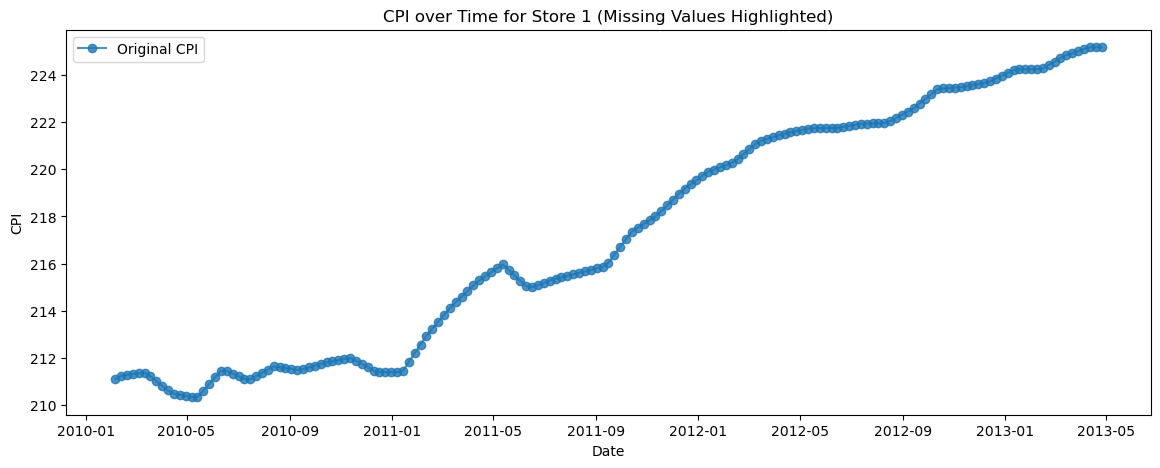

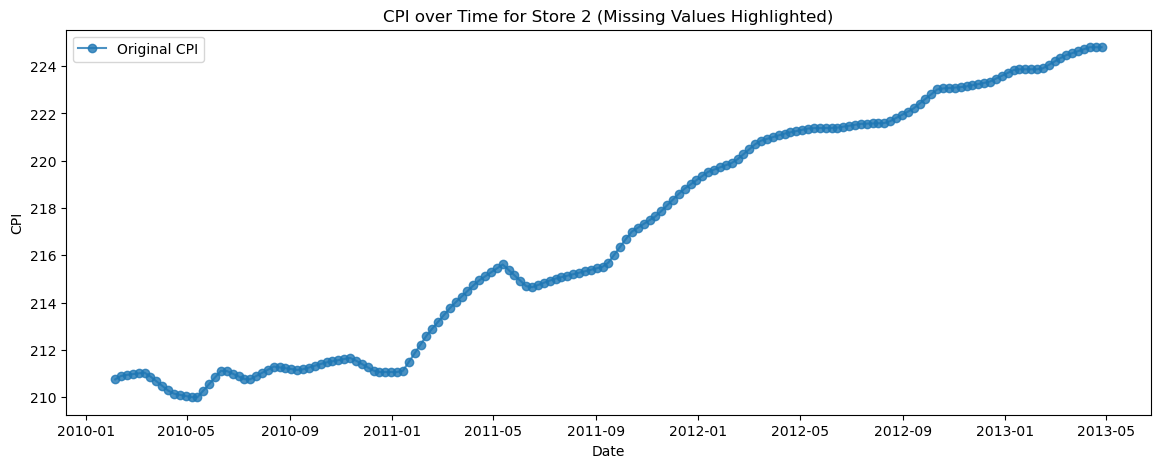

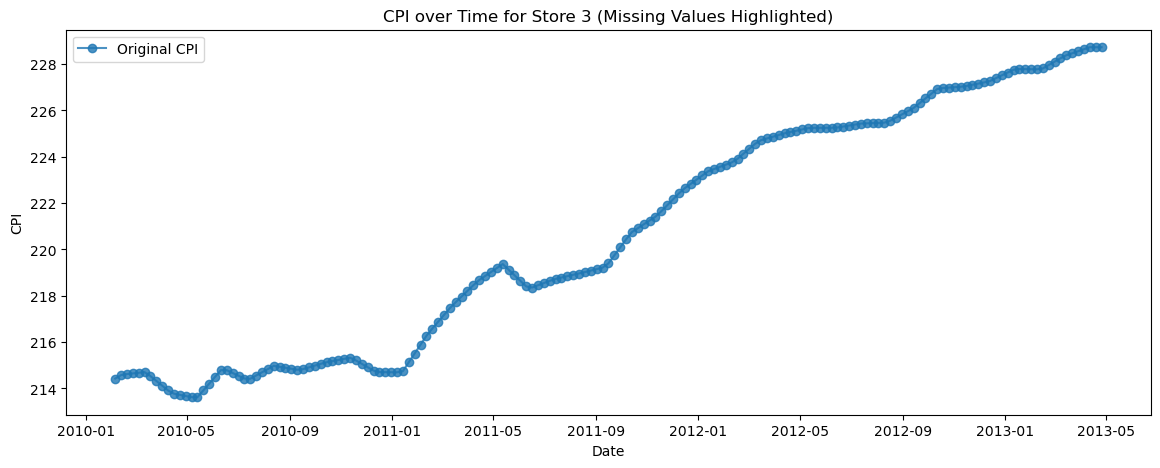

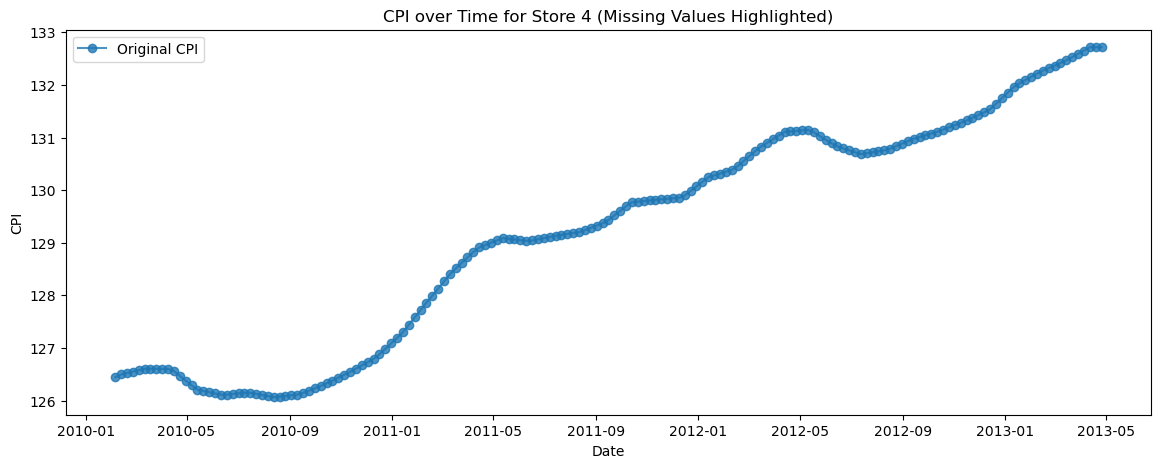

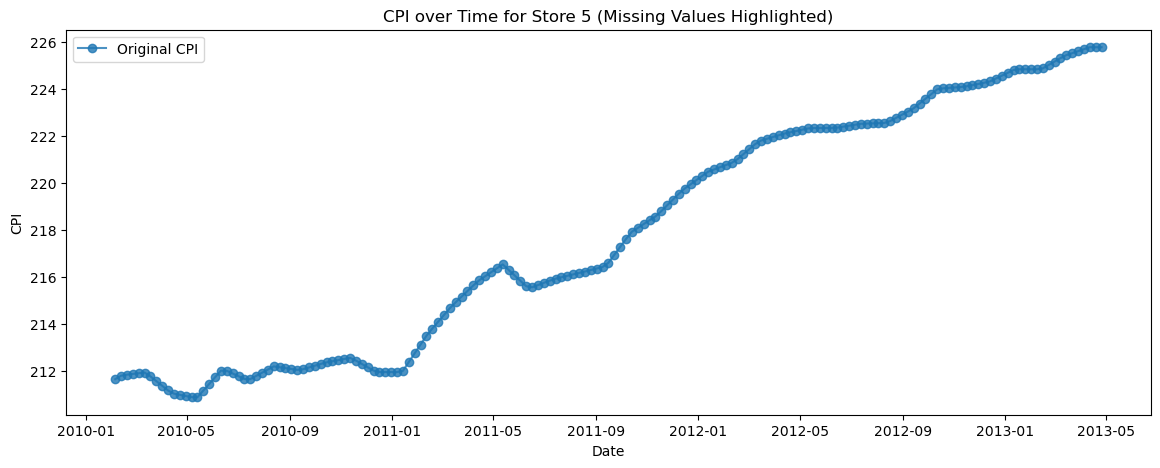

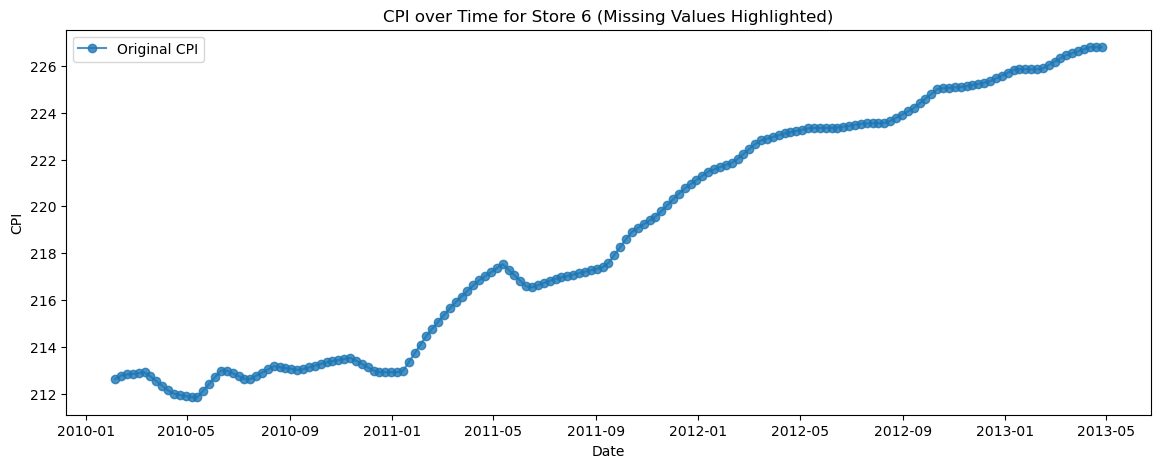

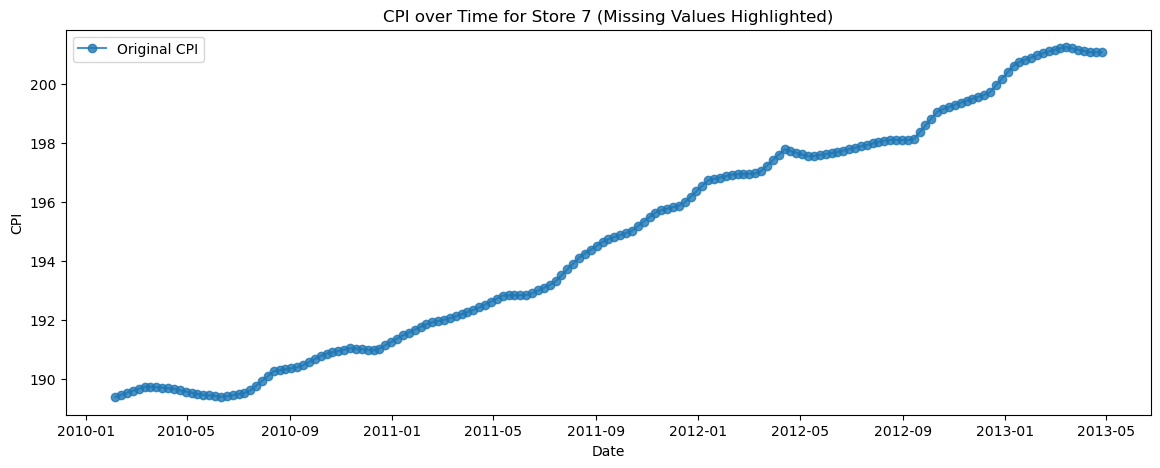

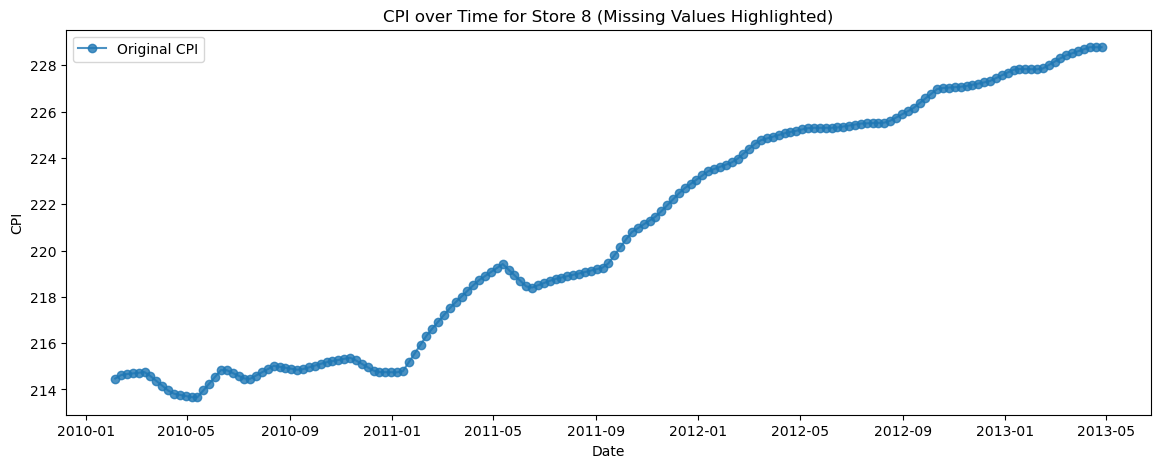

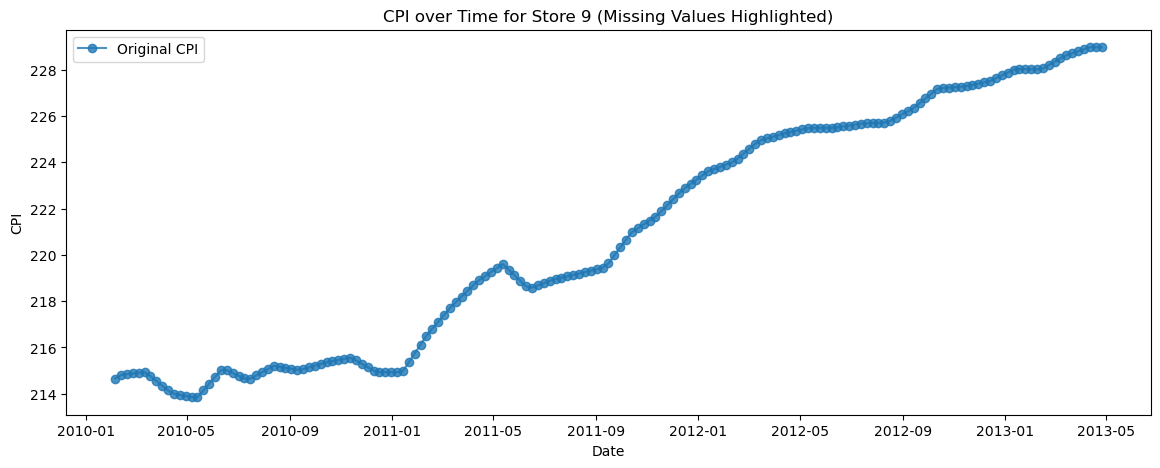

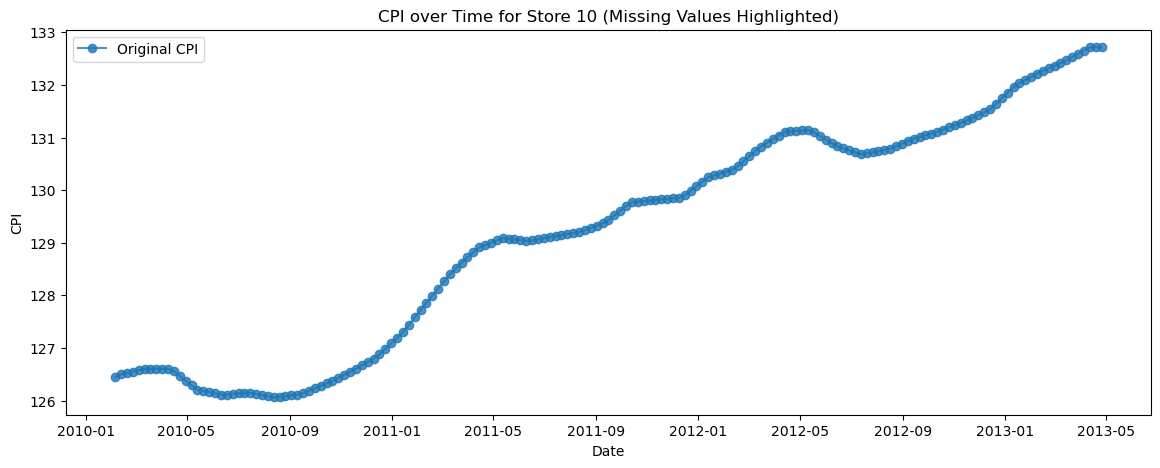

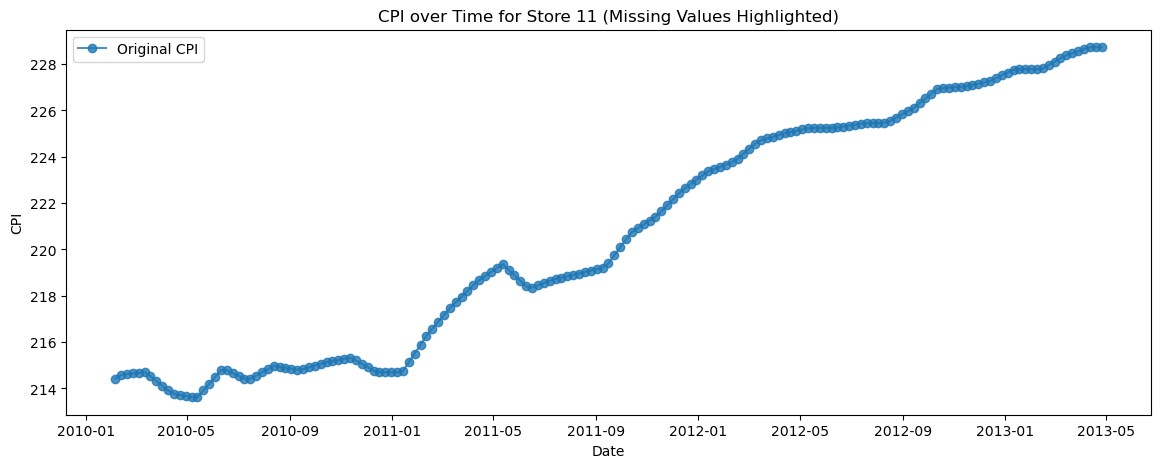

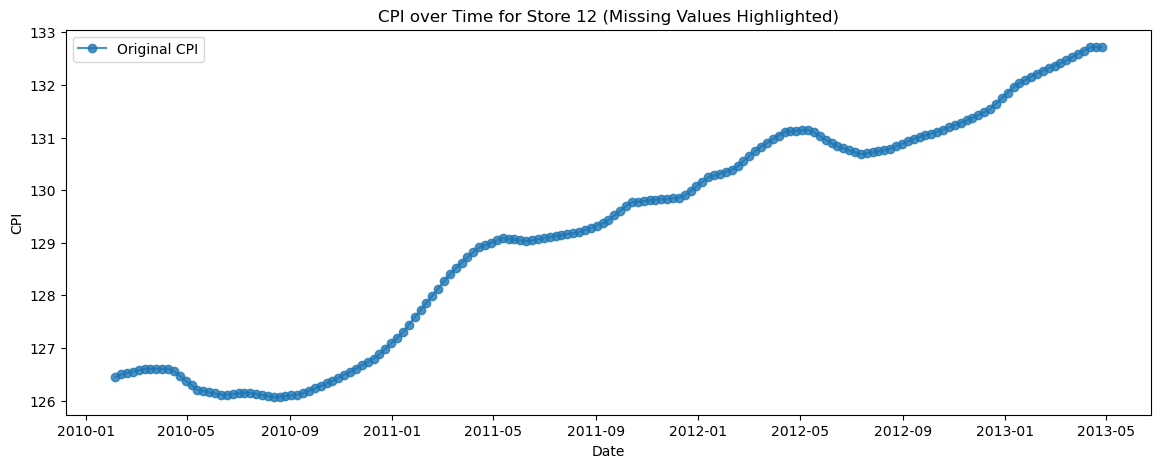

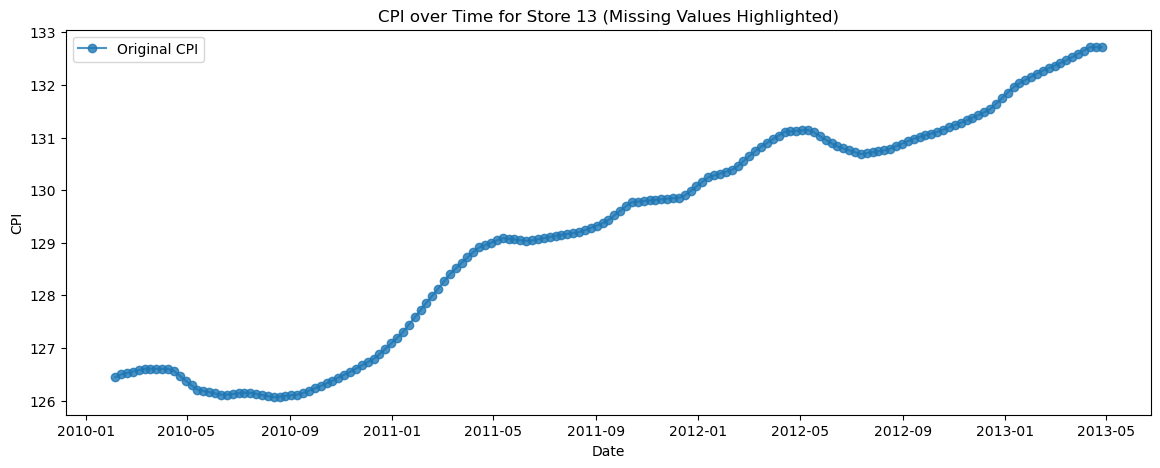

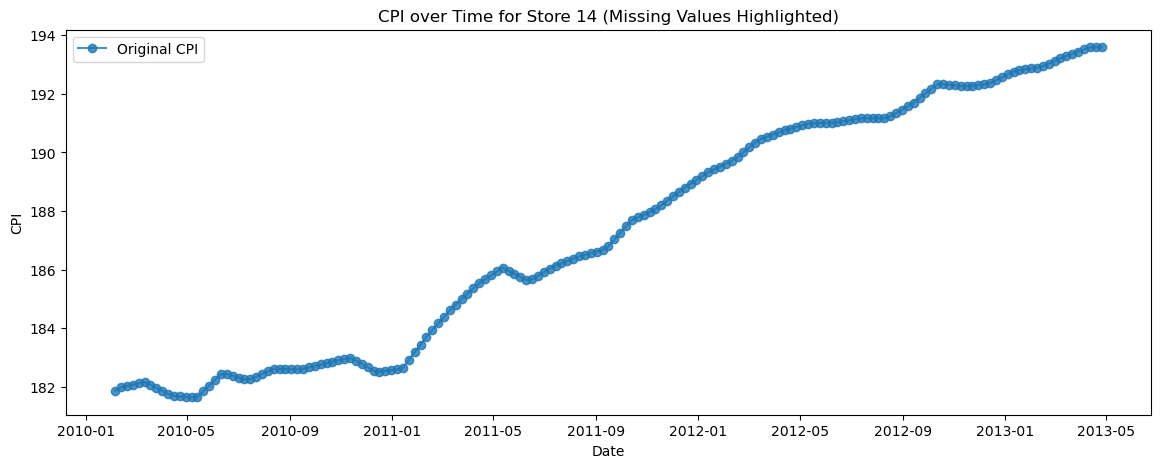

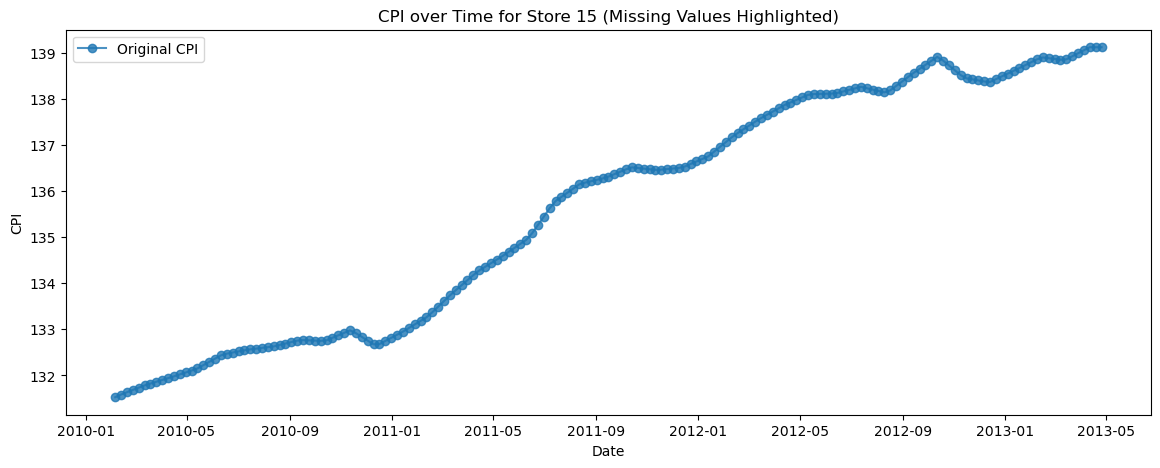

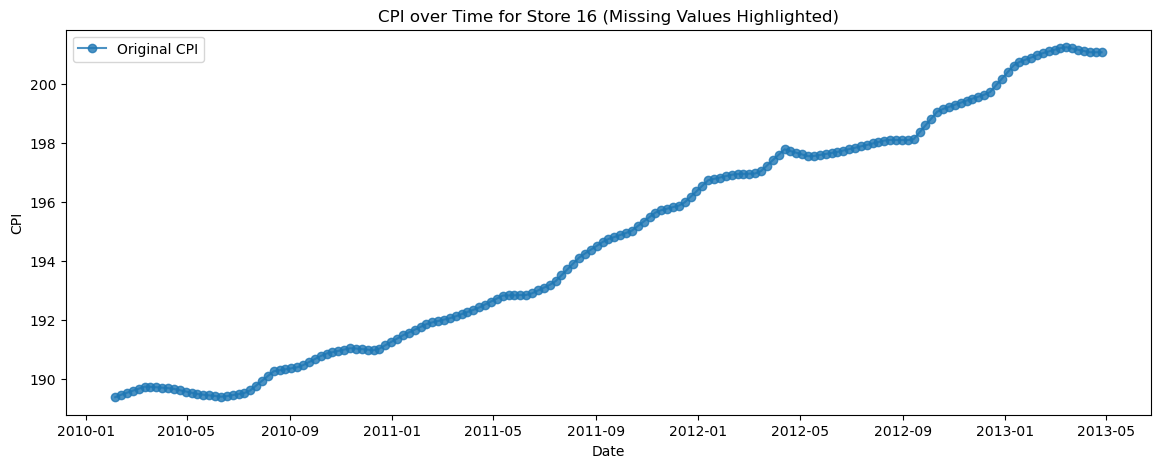

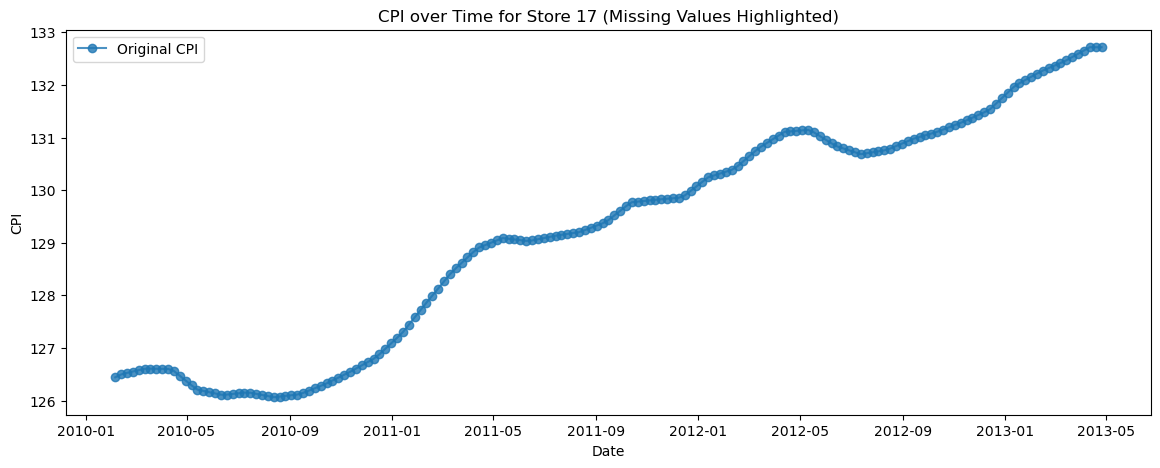

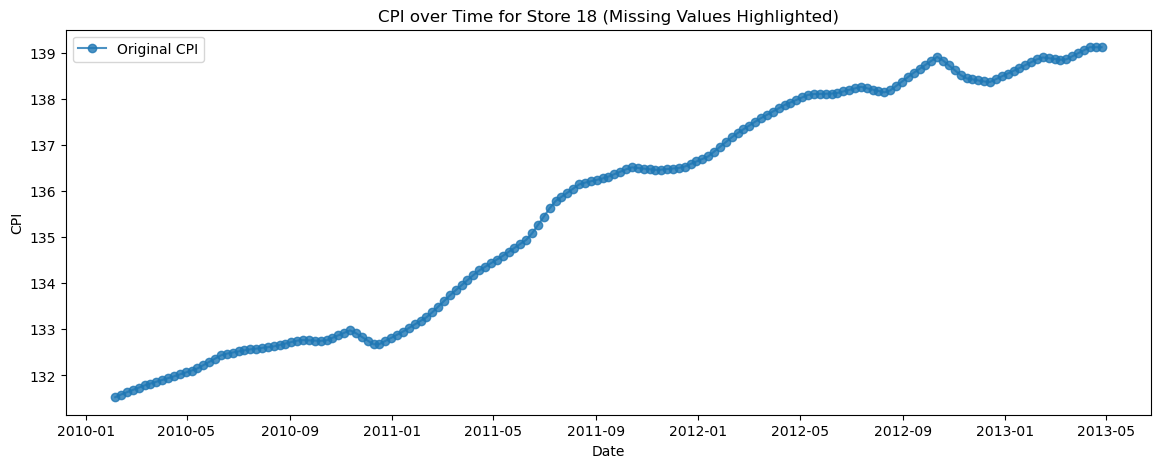

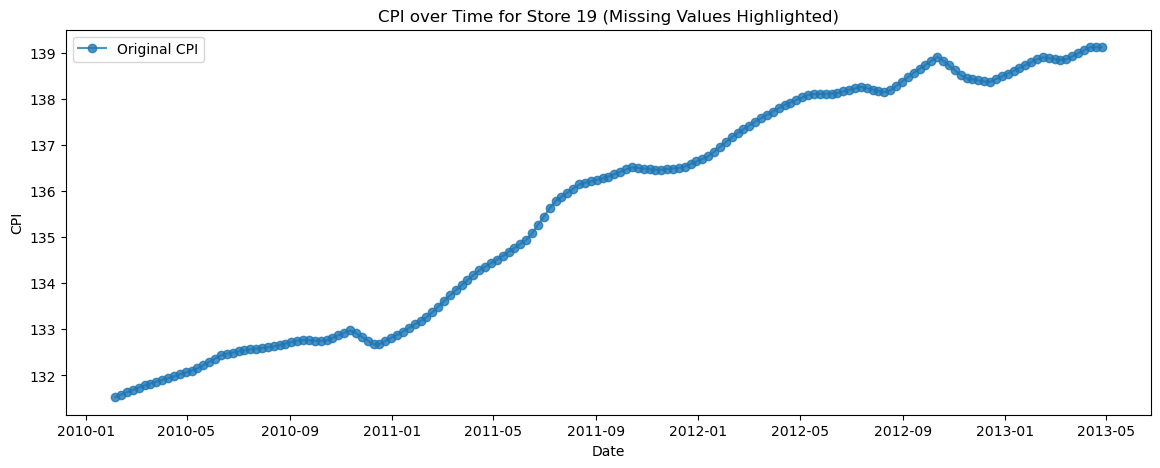

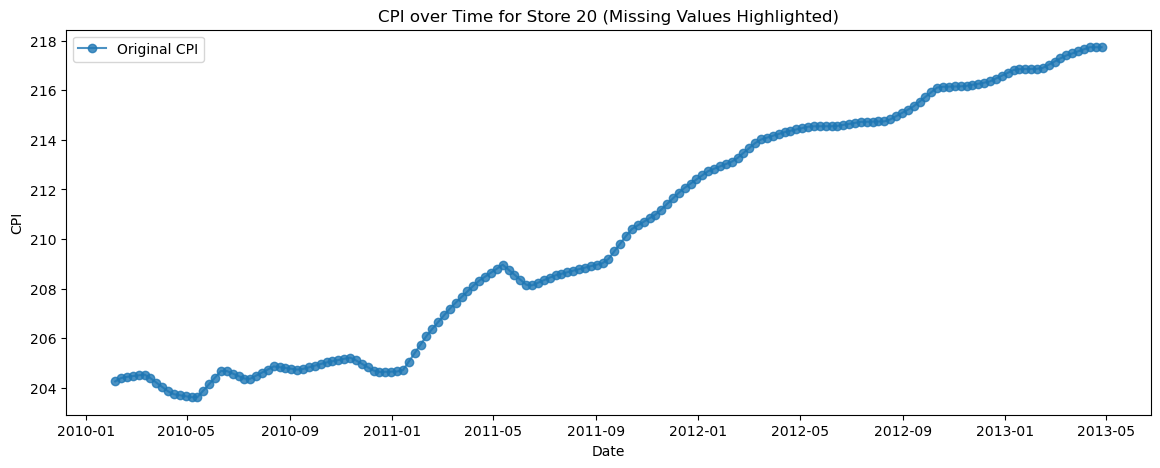

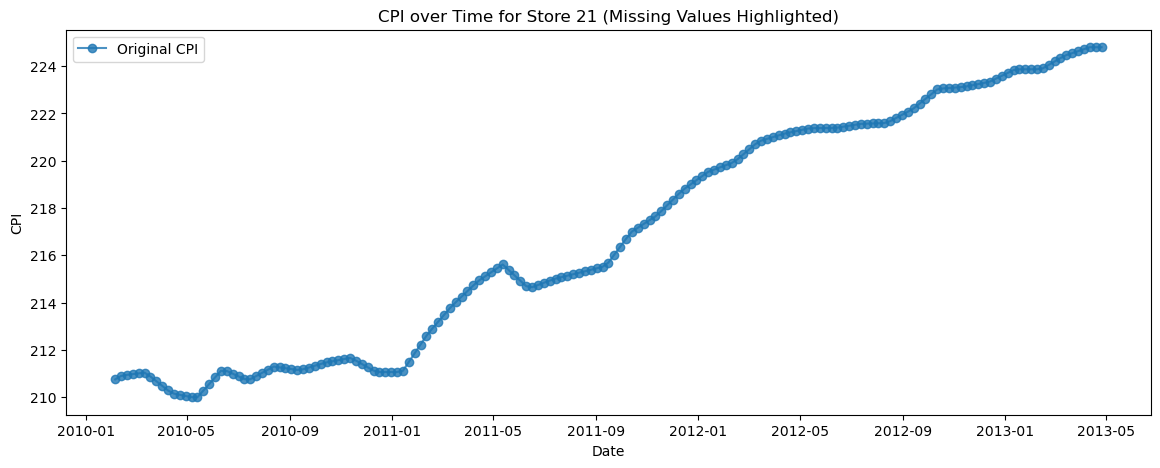

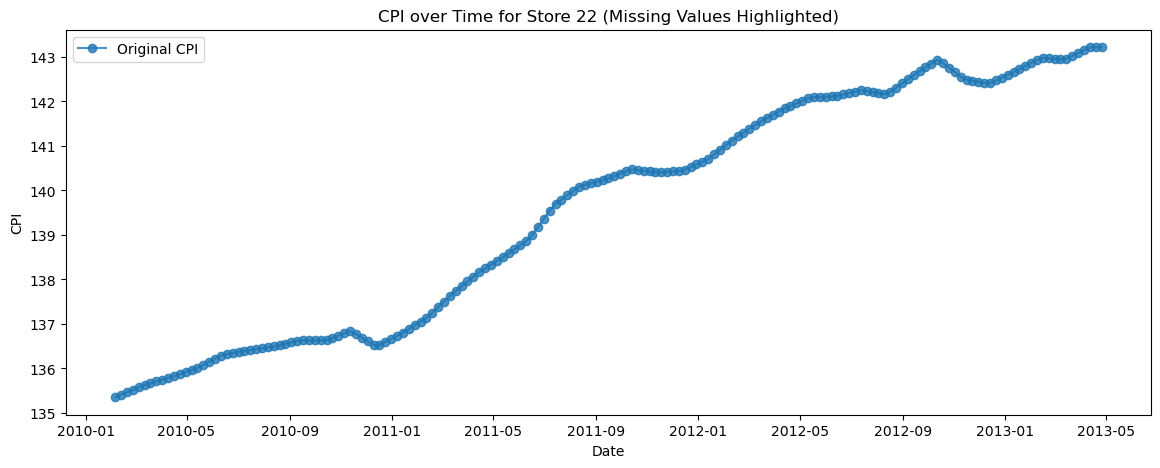

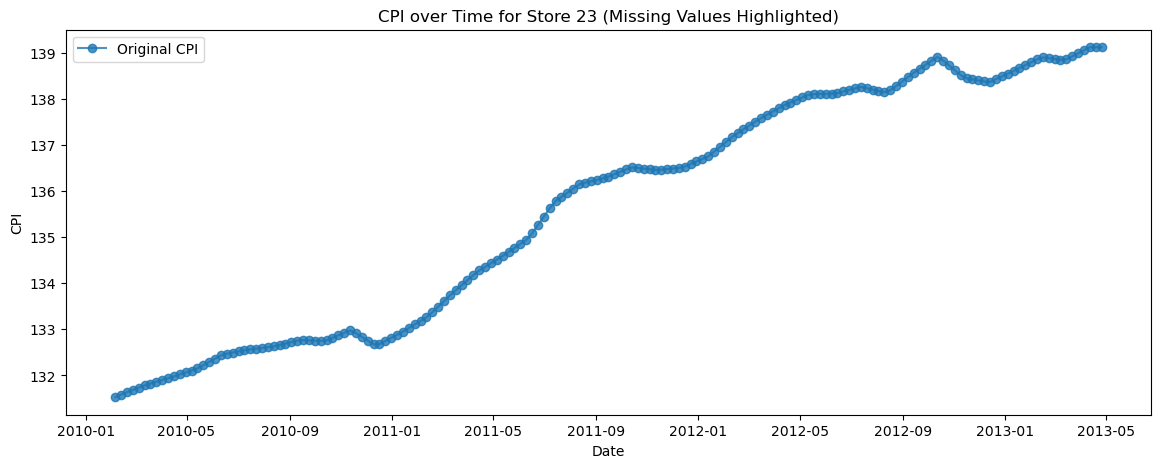

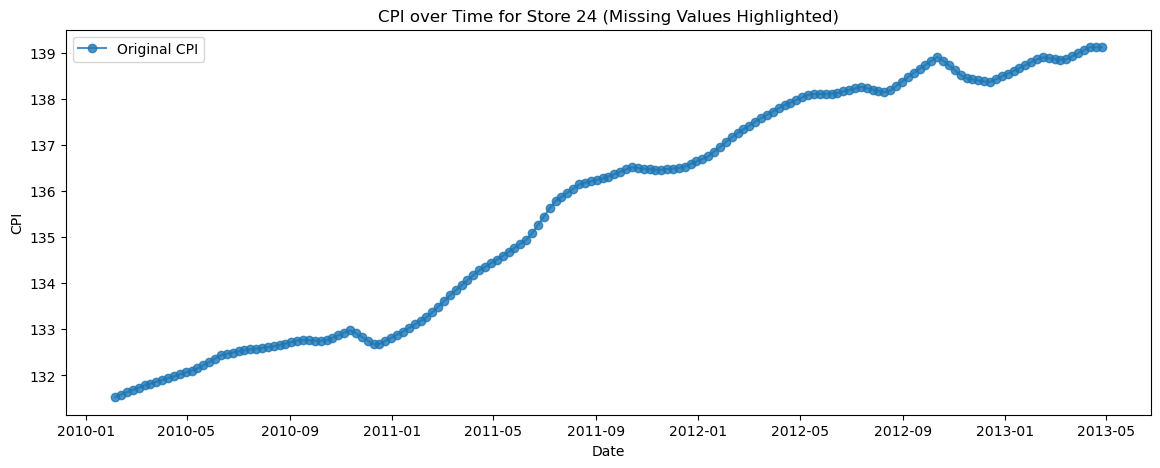

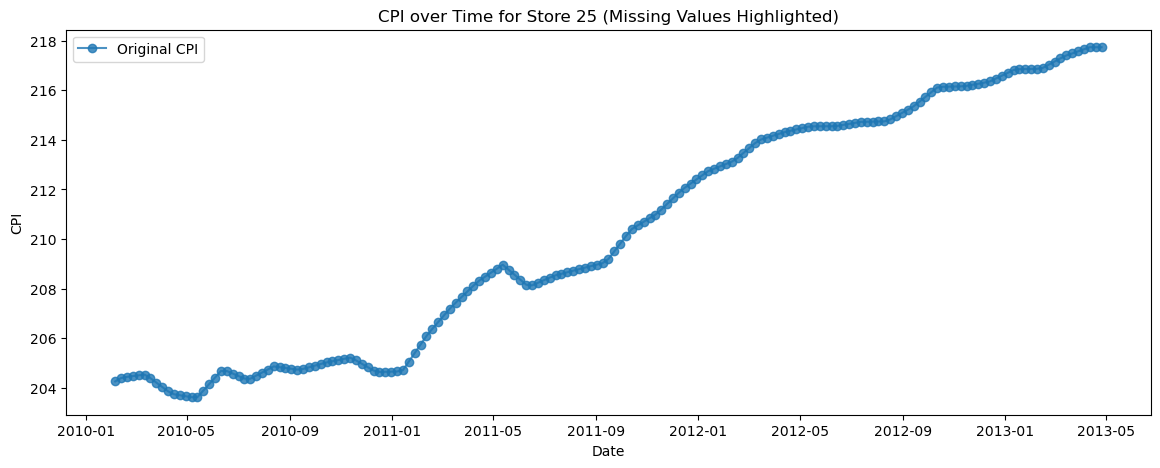

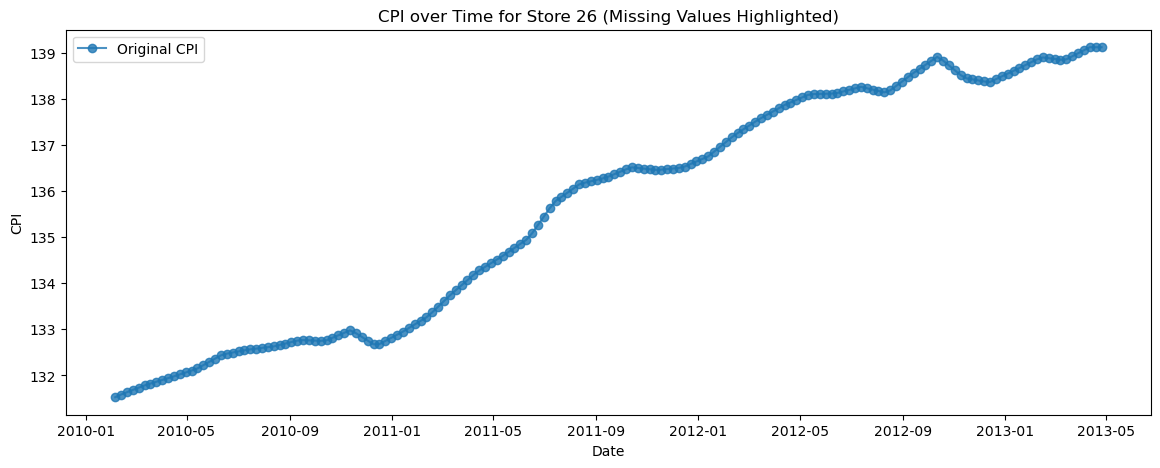

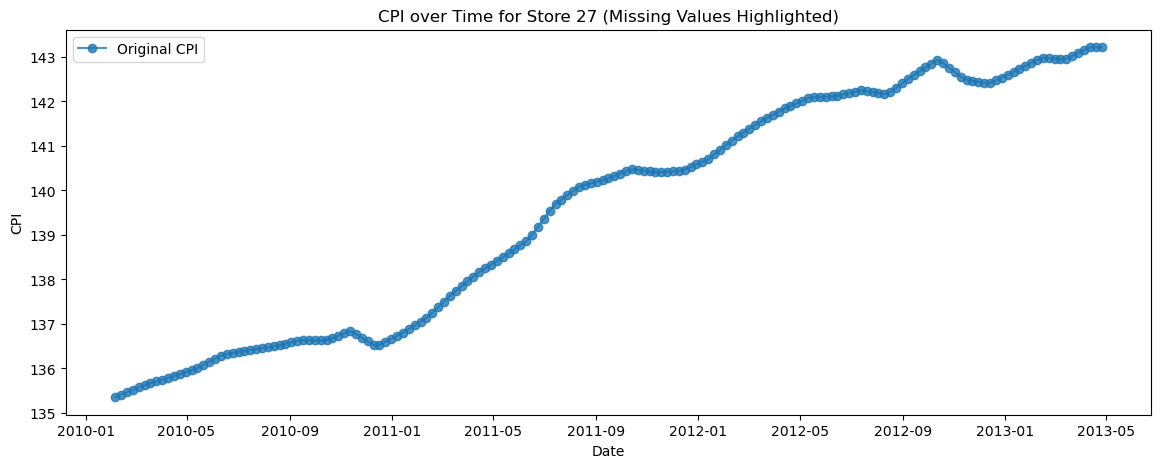

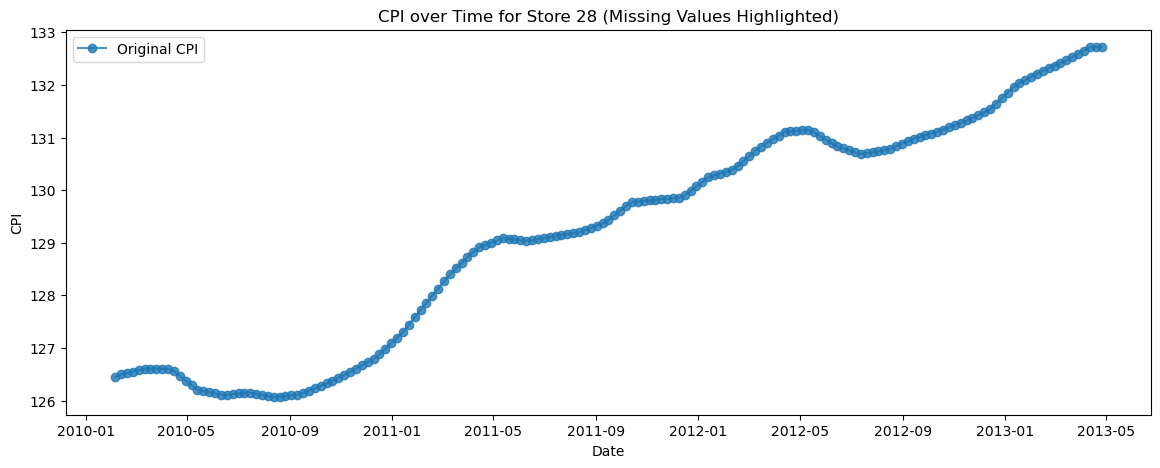

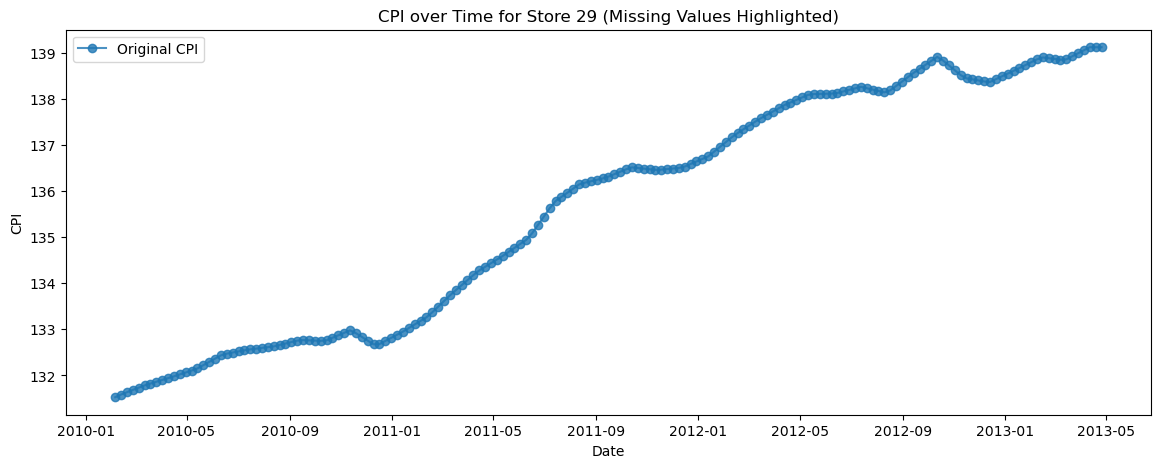

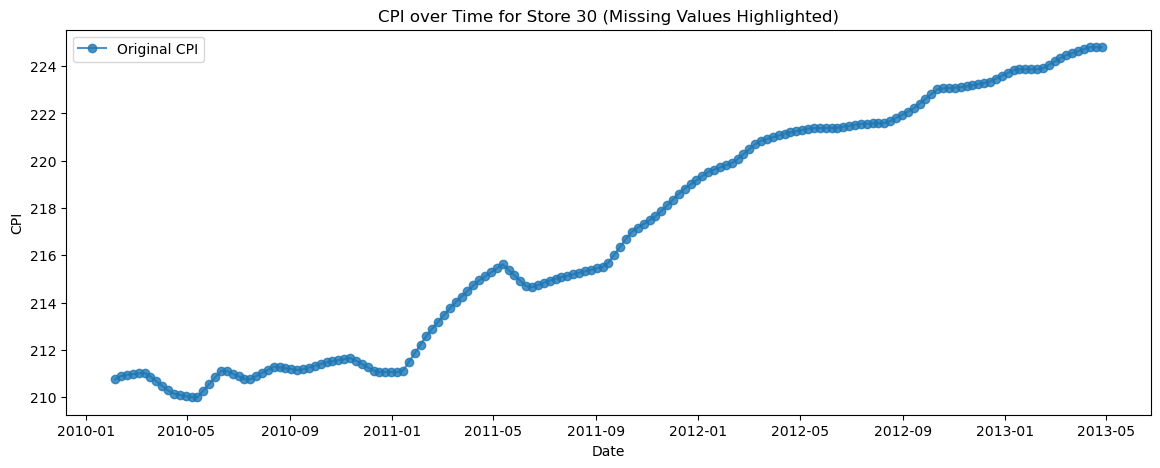

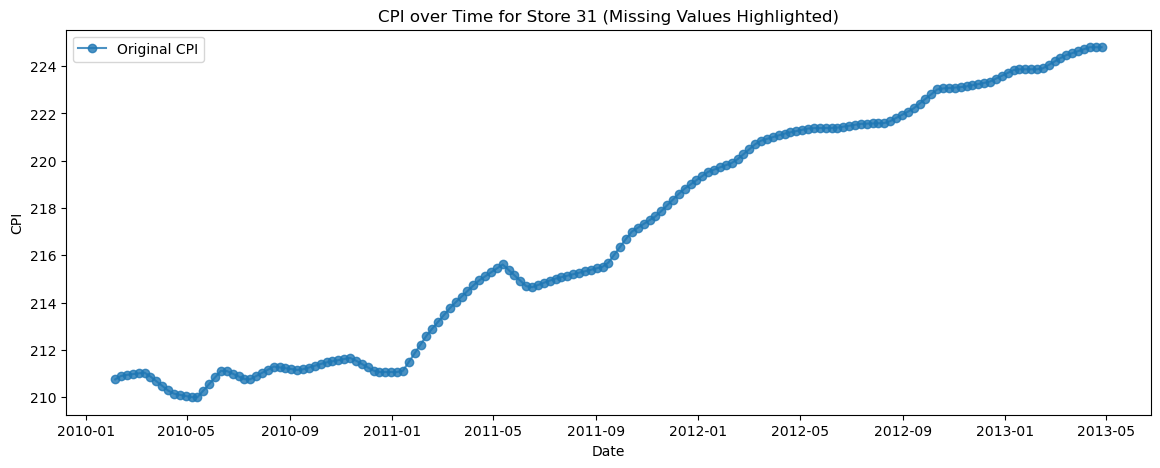

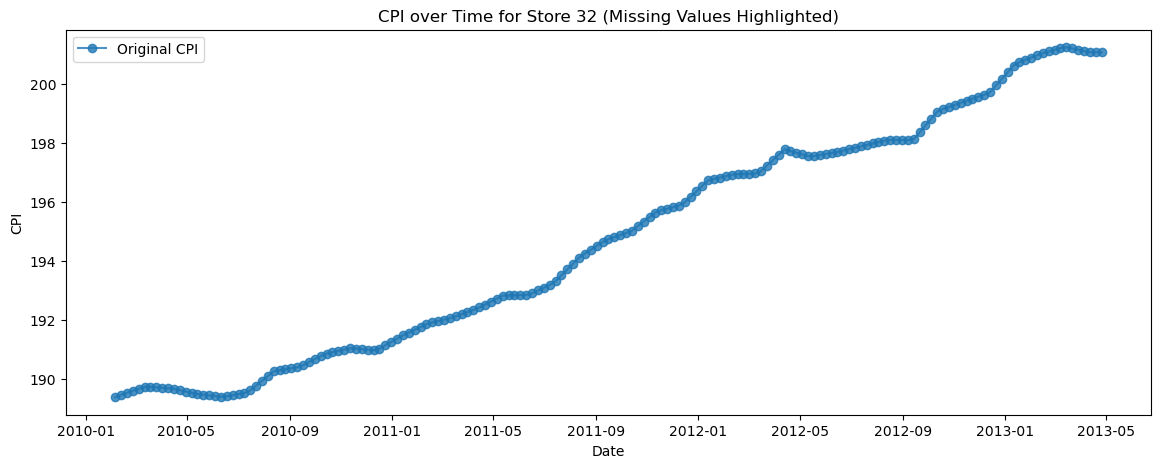

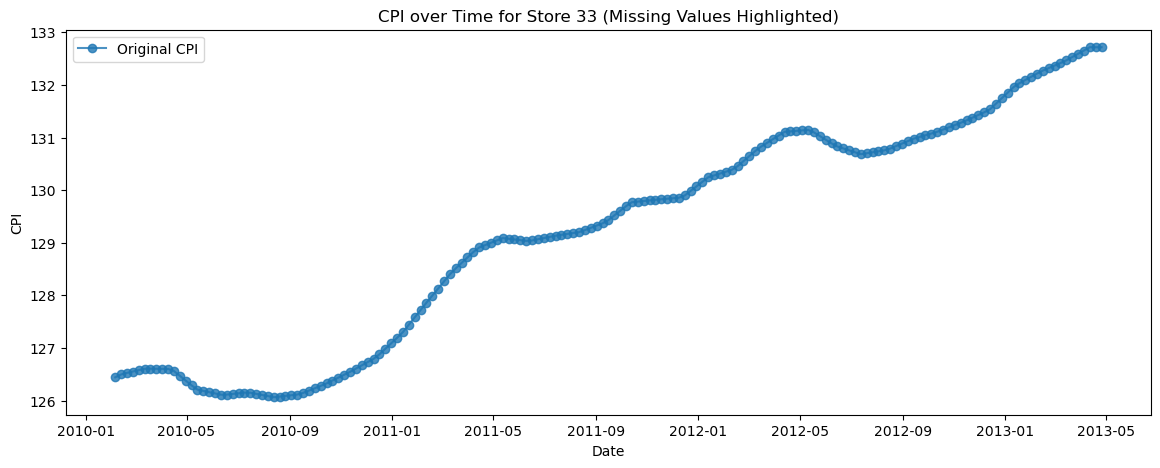

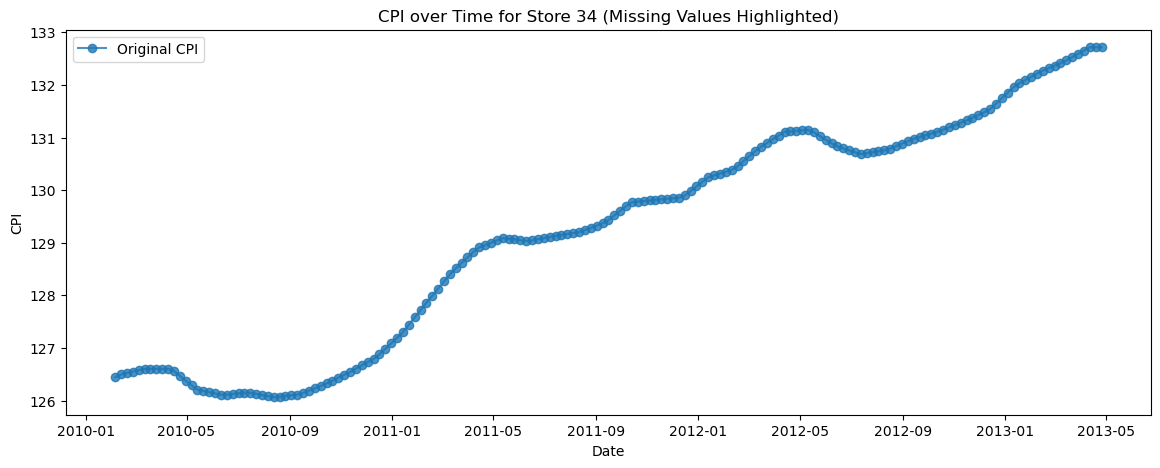

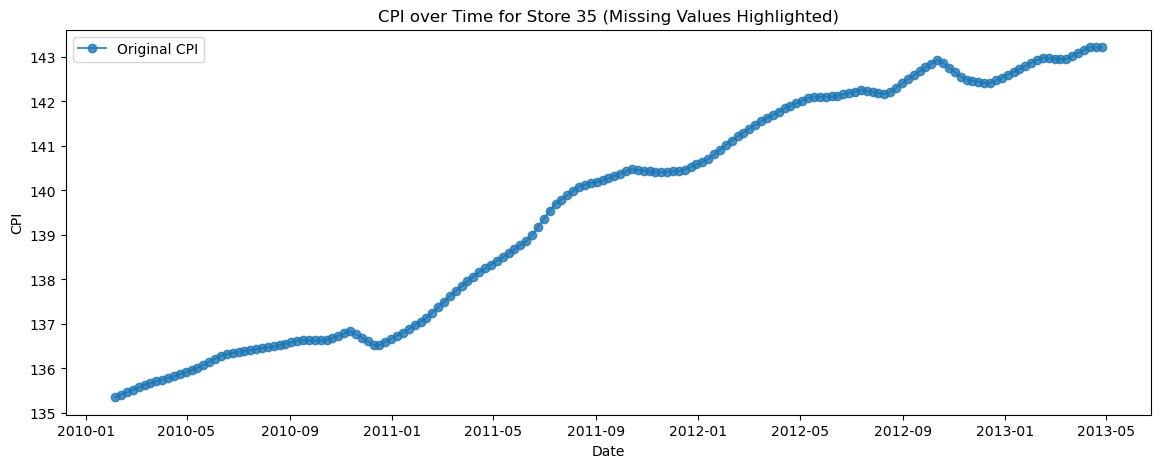

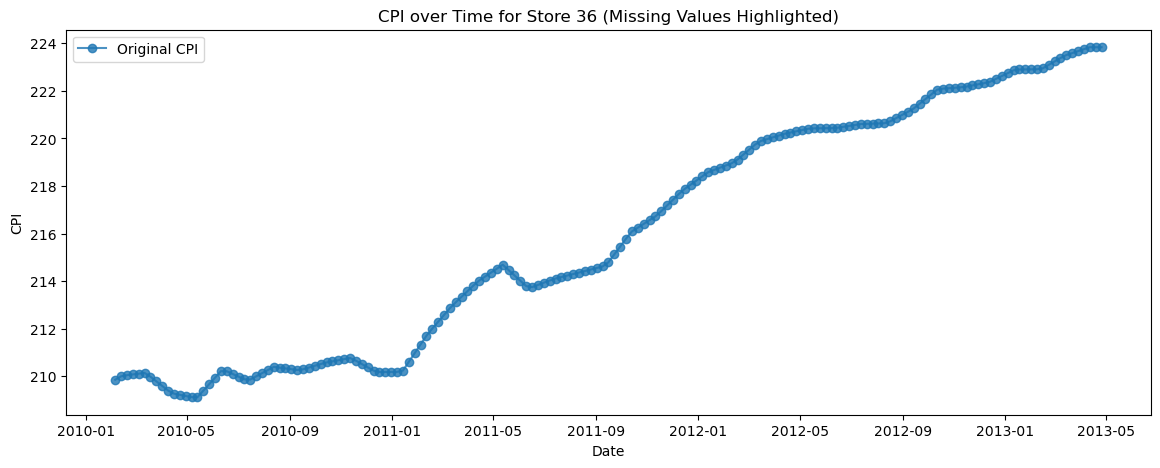

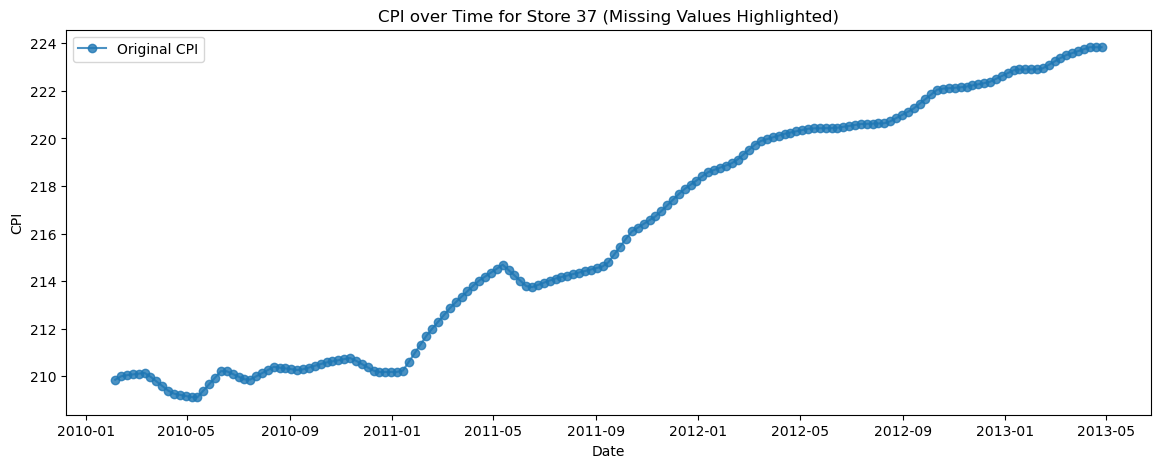

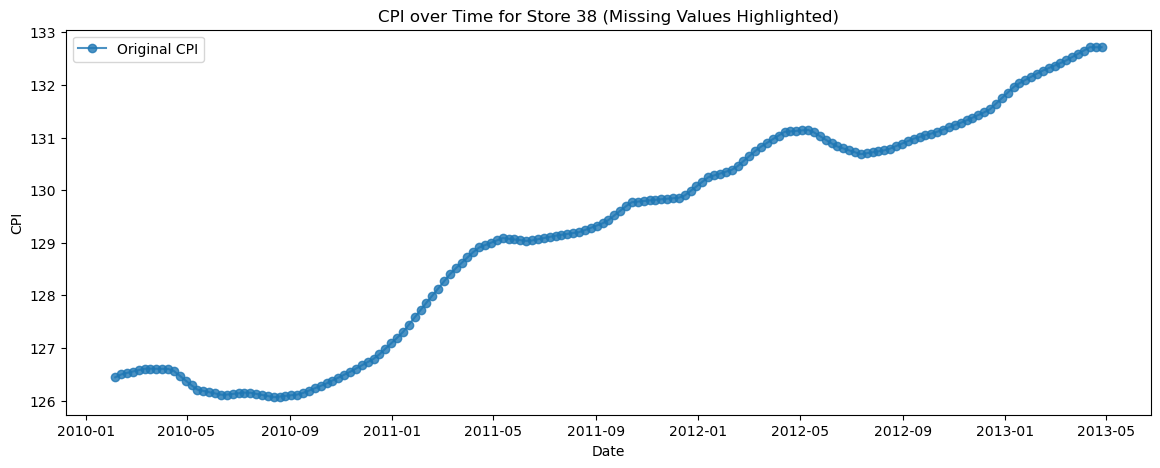

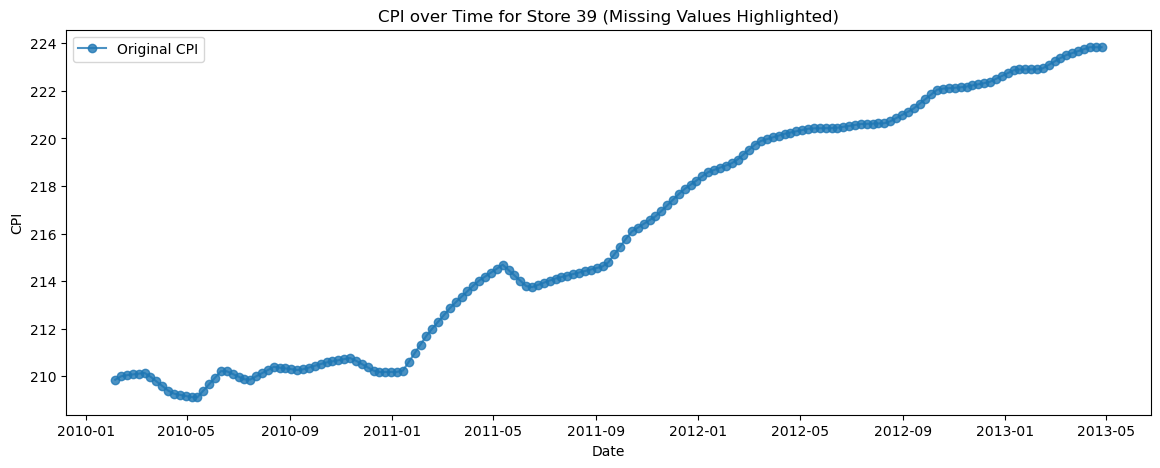

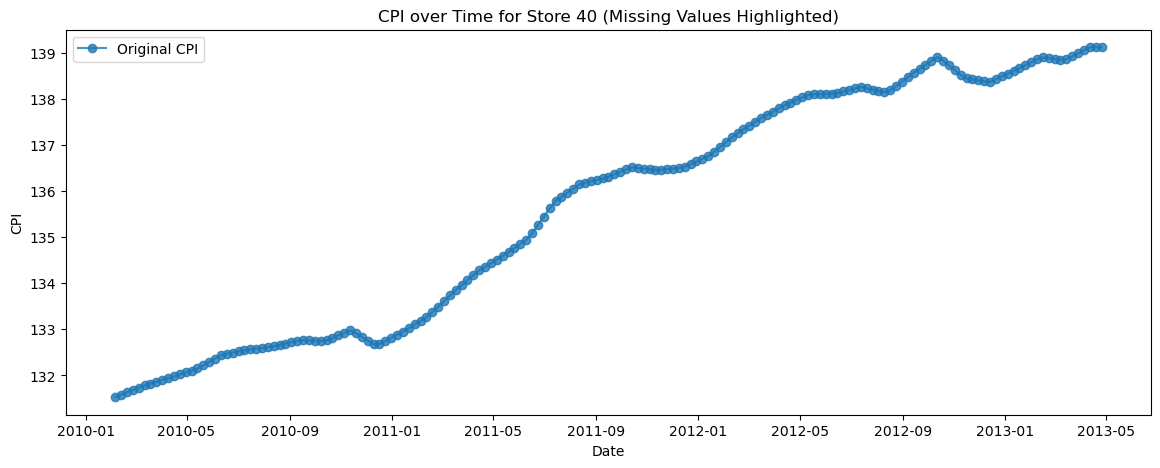

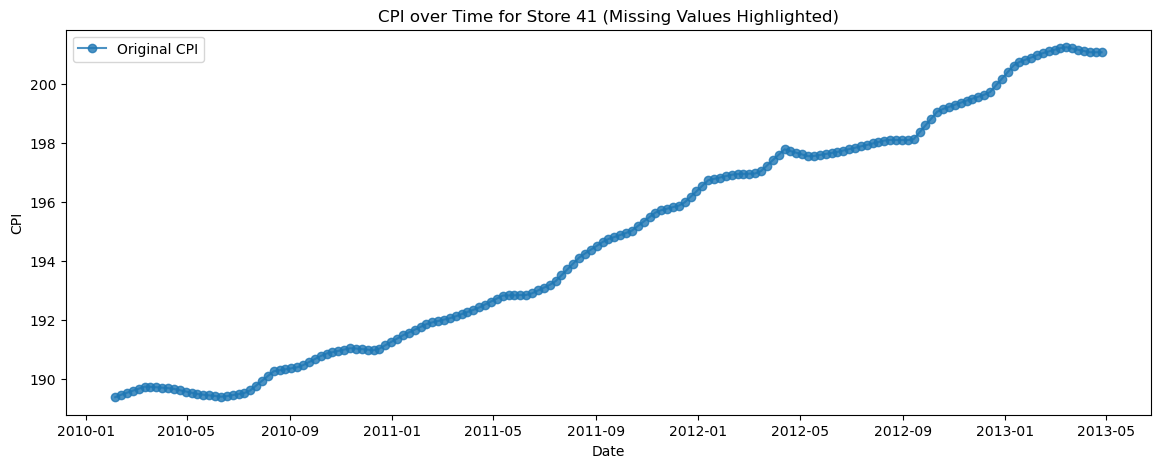

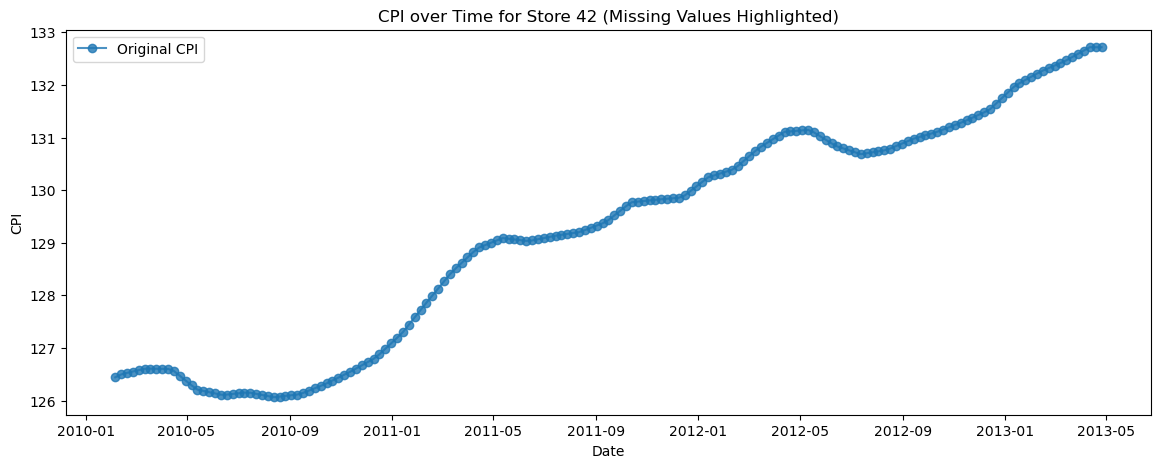

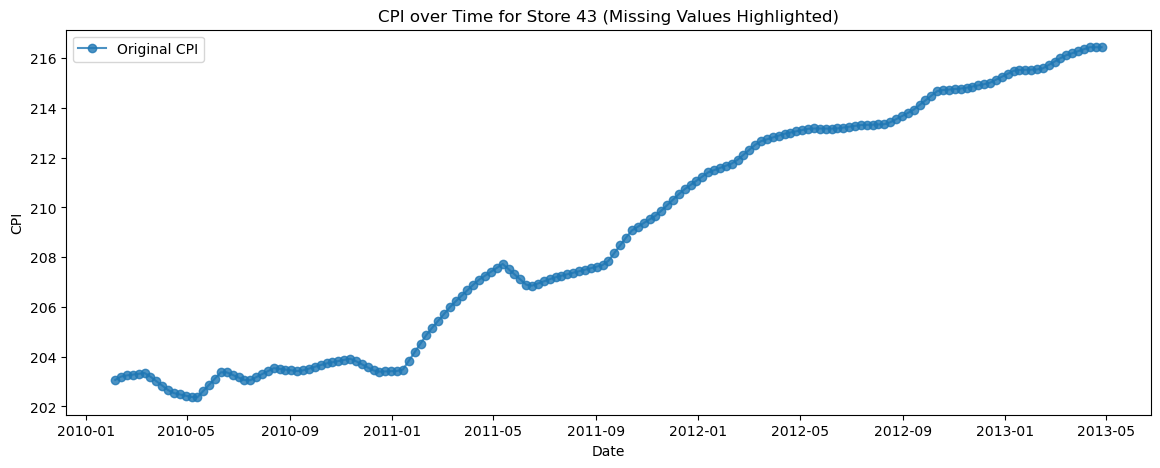

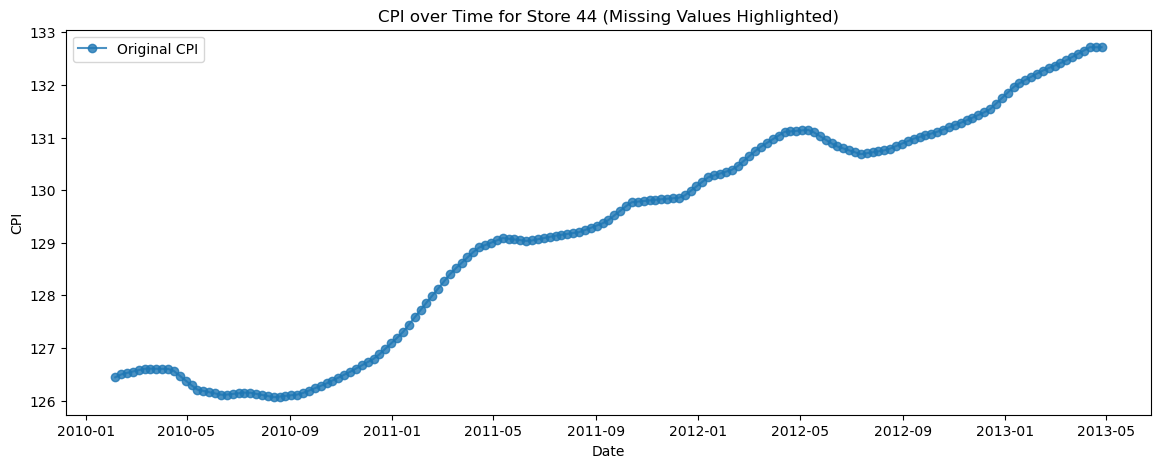

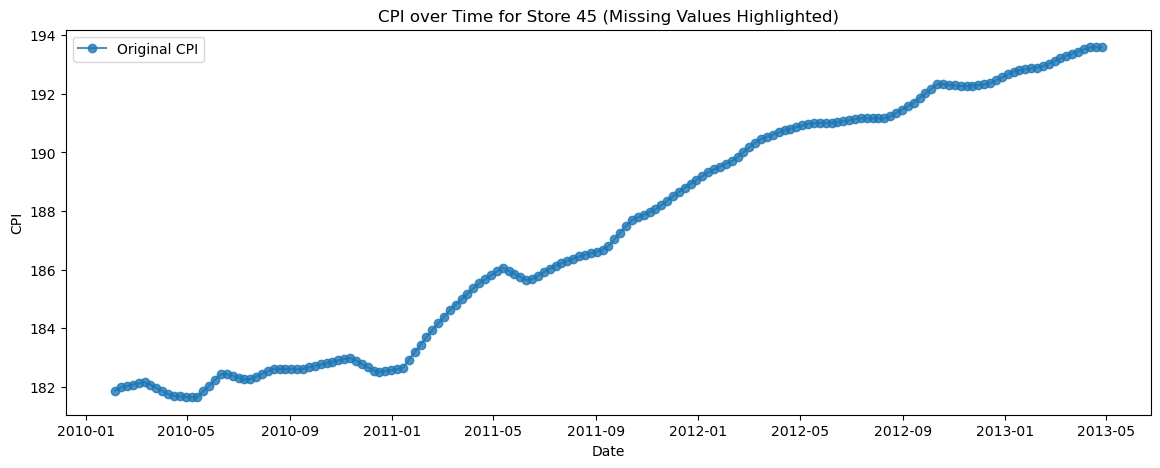

In [7]:
import matplotlib.pyplot as plt

store_nums = df['store'].unique()

for store in store_nums:
    store_data = df[df['store'] == store].sort_values('date')
    
    # Separate original vs missing points
    non_missing = store_data[store_data['cpi'].notna()]
    plt.figure(figsize=(14, 5))
    
    # Plot original non-missing CPI
    plt.plot(non_missing['date'], non_missing['cpi'], 
             label='Original CPI', marker='o', linestyle='-', alpha=0.8)
    
    
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.title(f'CPI over Time for Store {store} (Missing Values Highlighted)')
    plt.legend()
    plt.show()


In [8]:
df_plot = df.copy()

In [9]:
df_plot['cpi_filled'] = df_plot['cpi'].fillna(0)

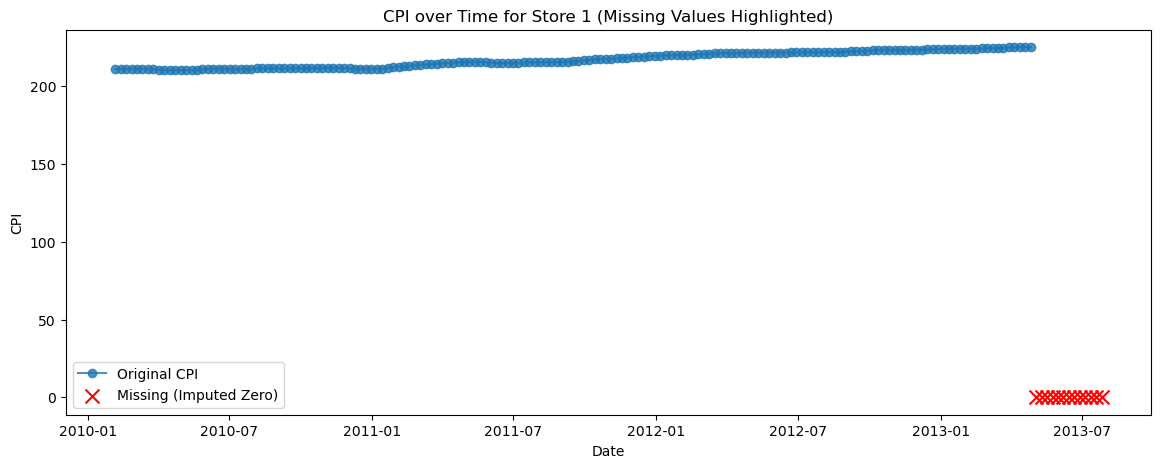

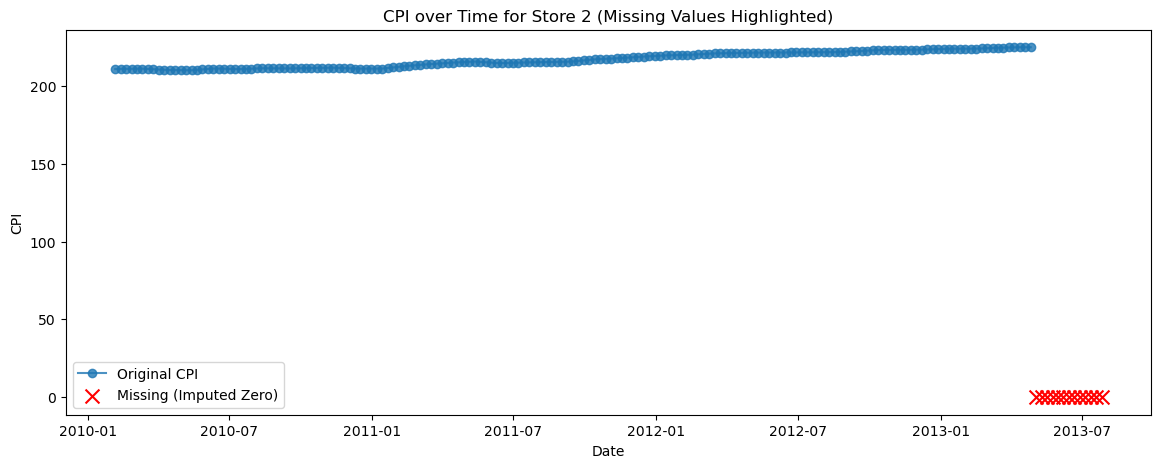

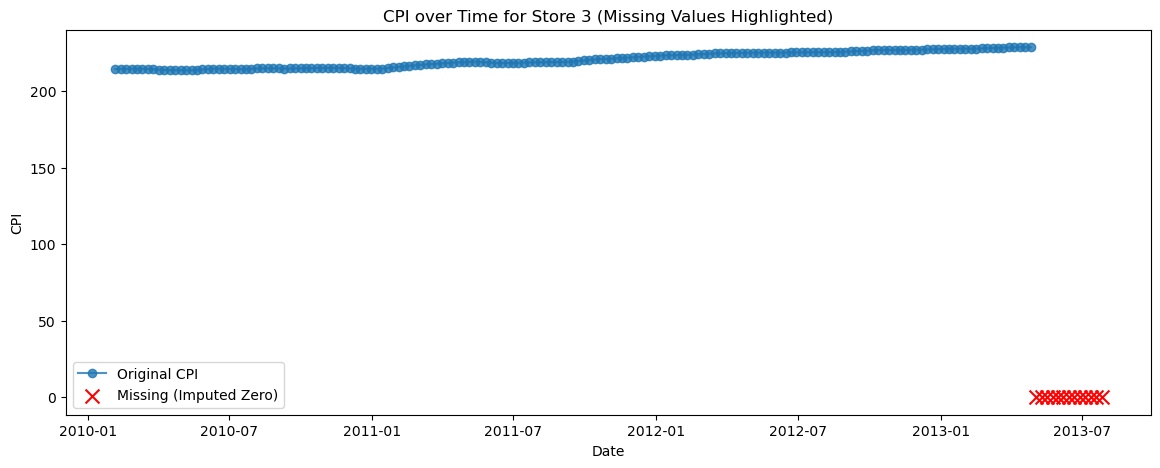

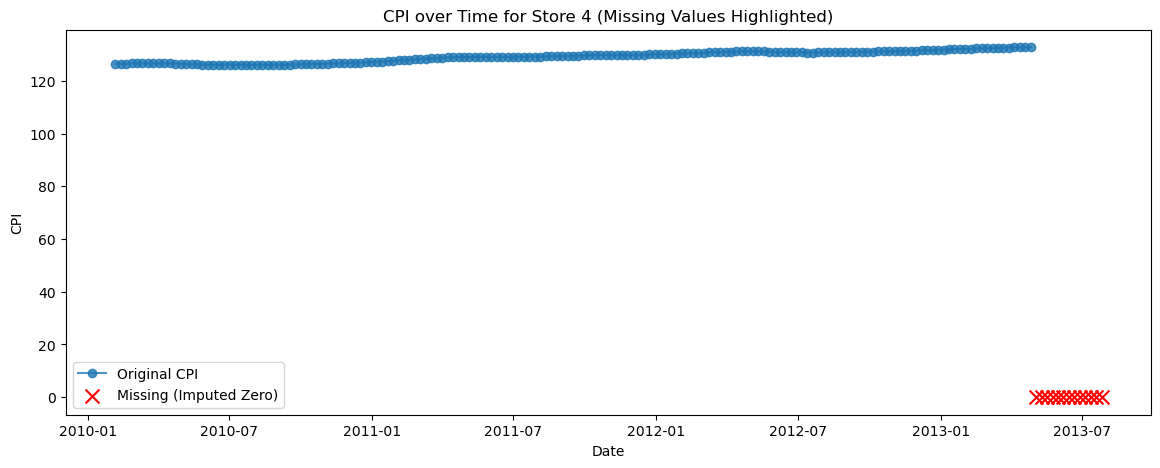

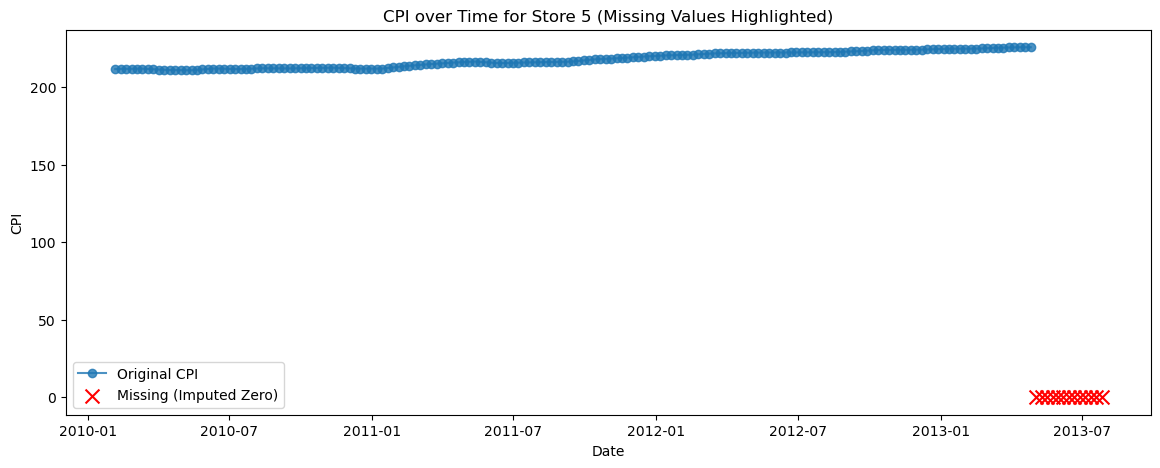

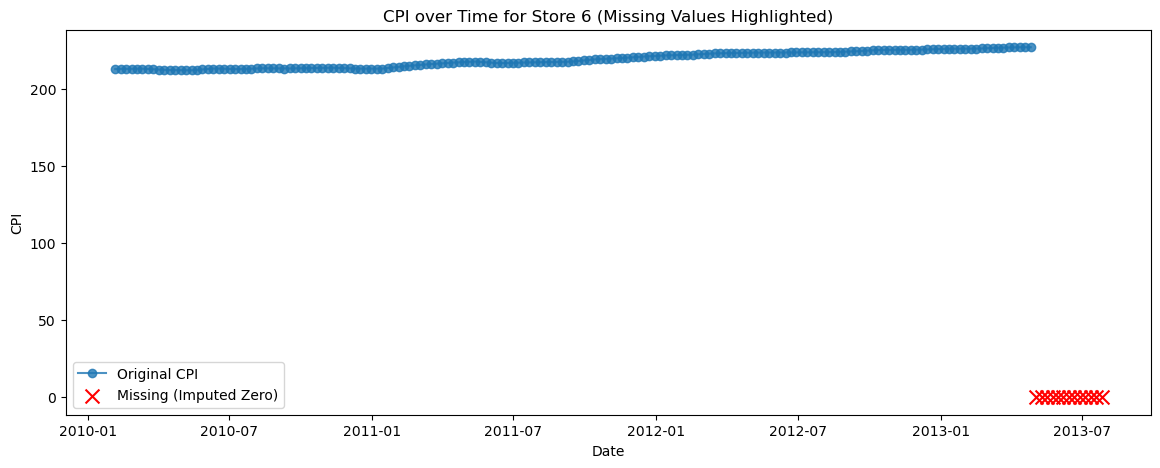

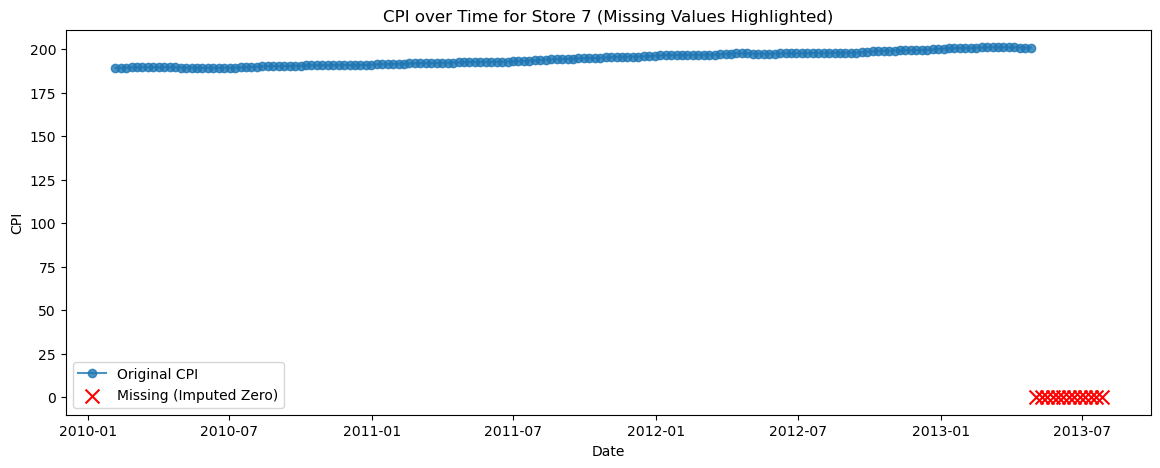

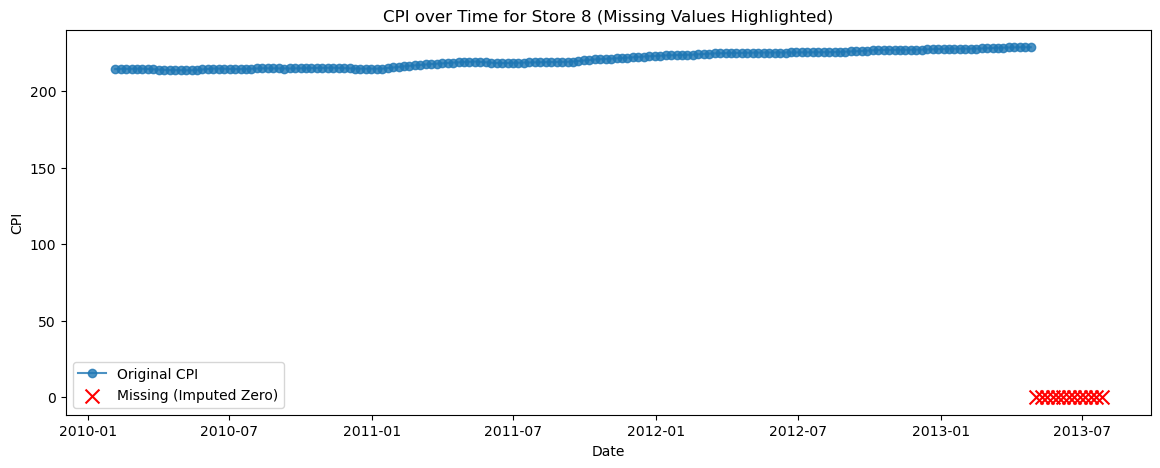

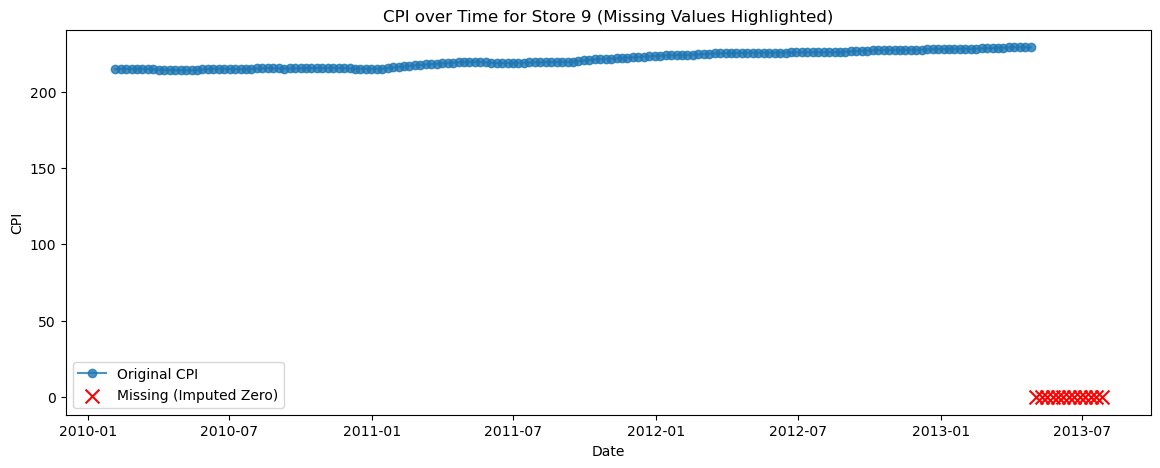

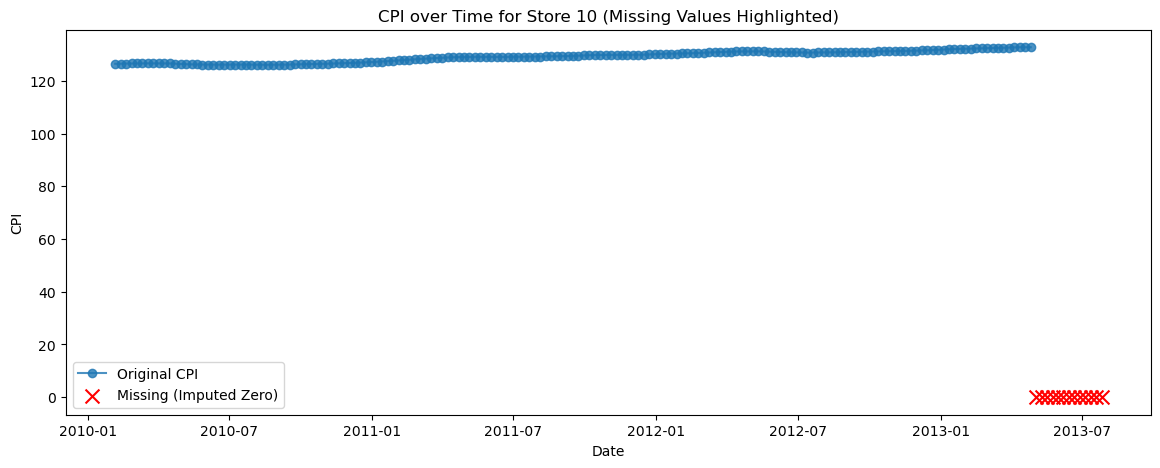

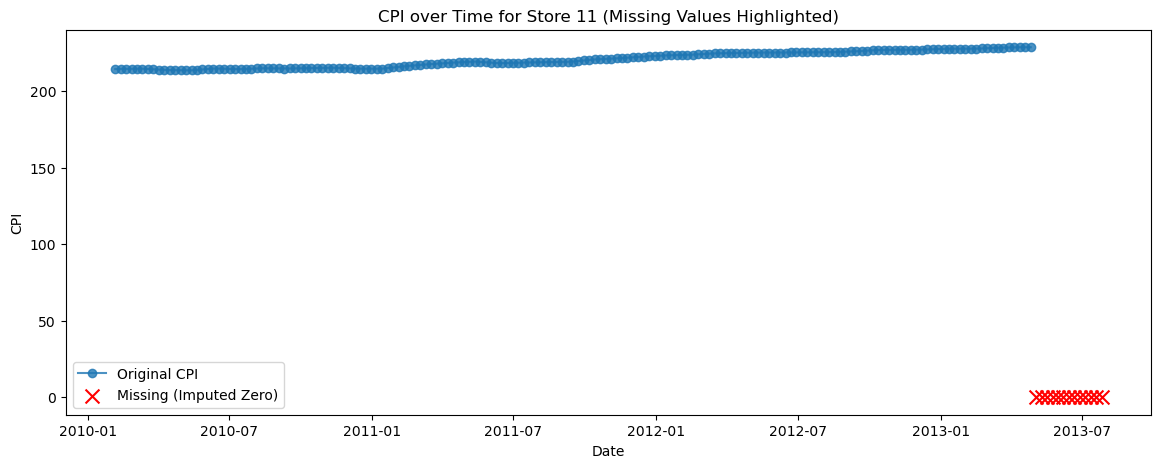

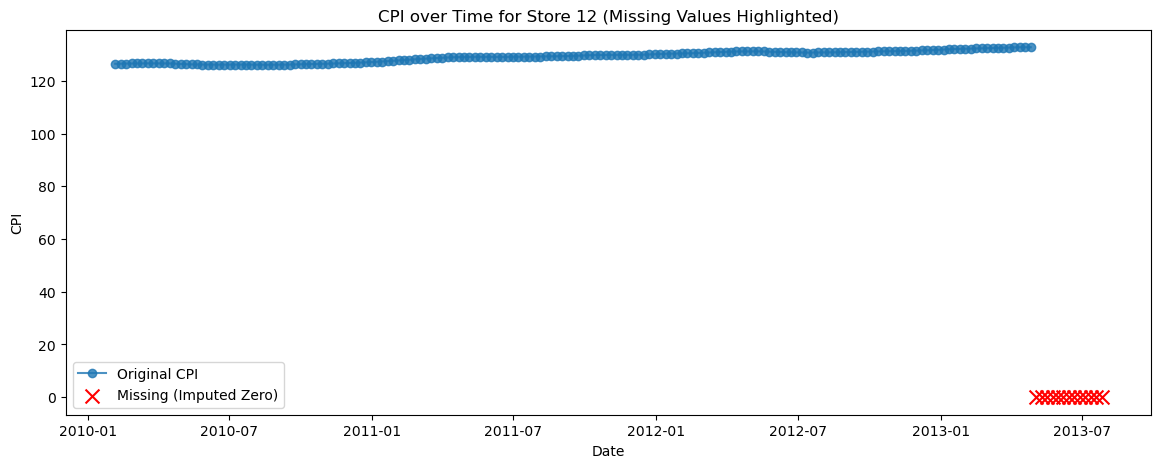

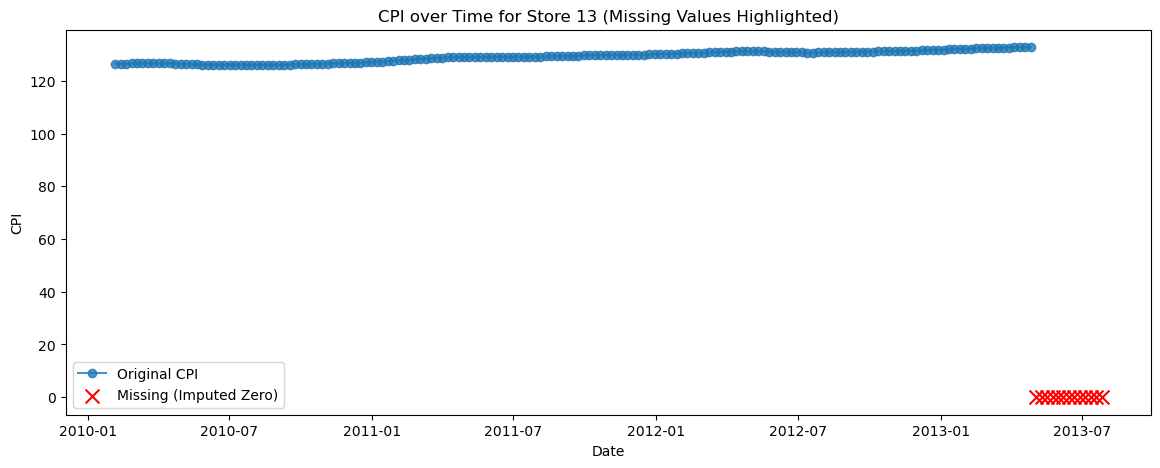

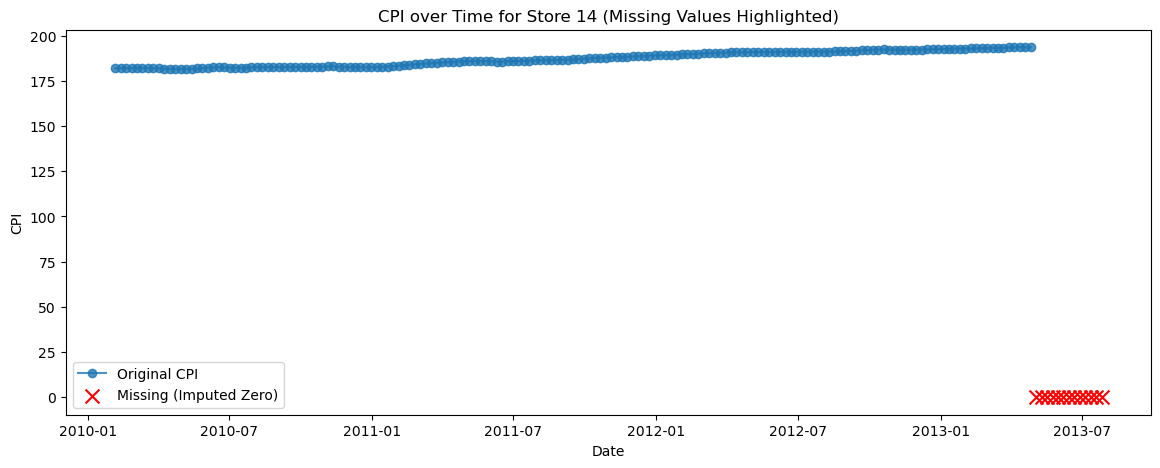

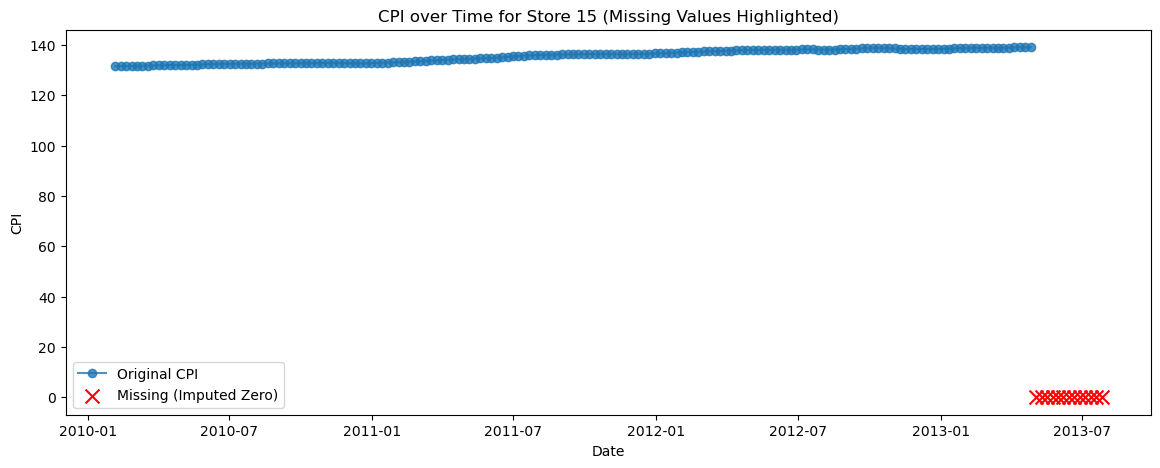

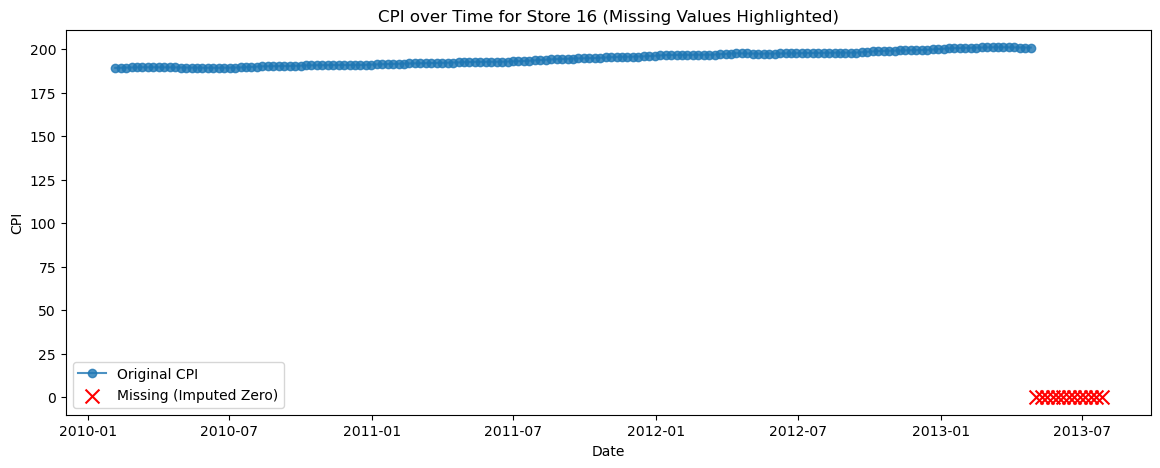

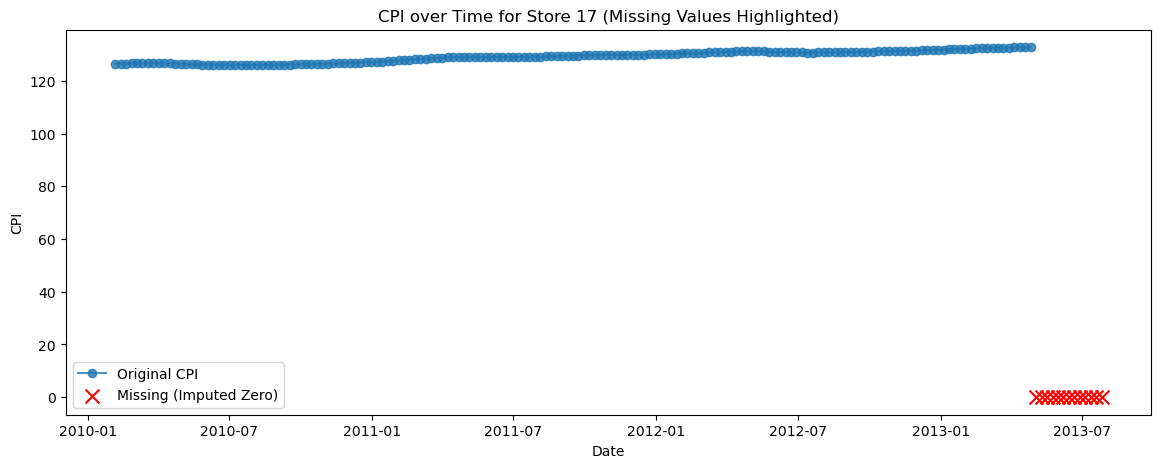

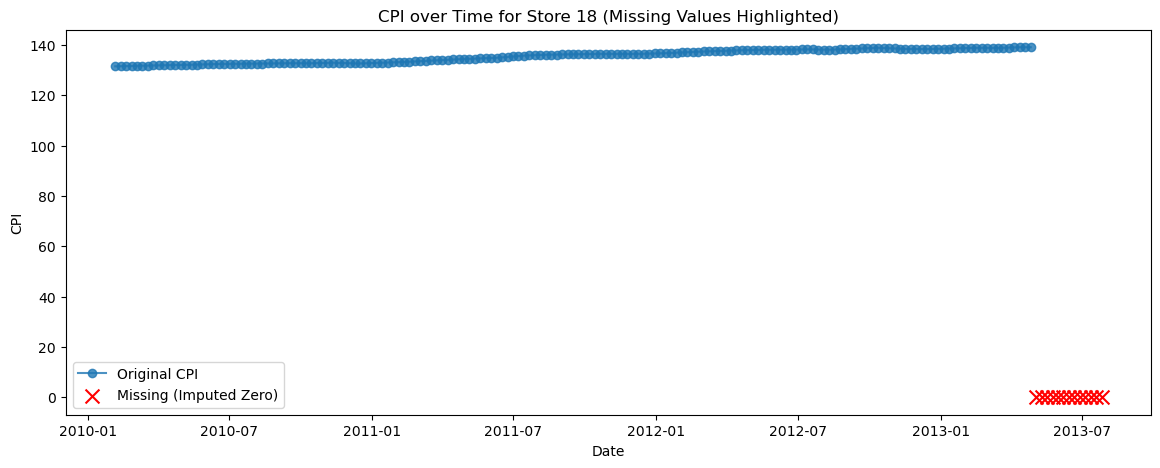

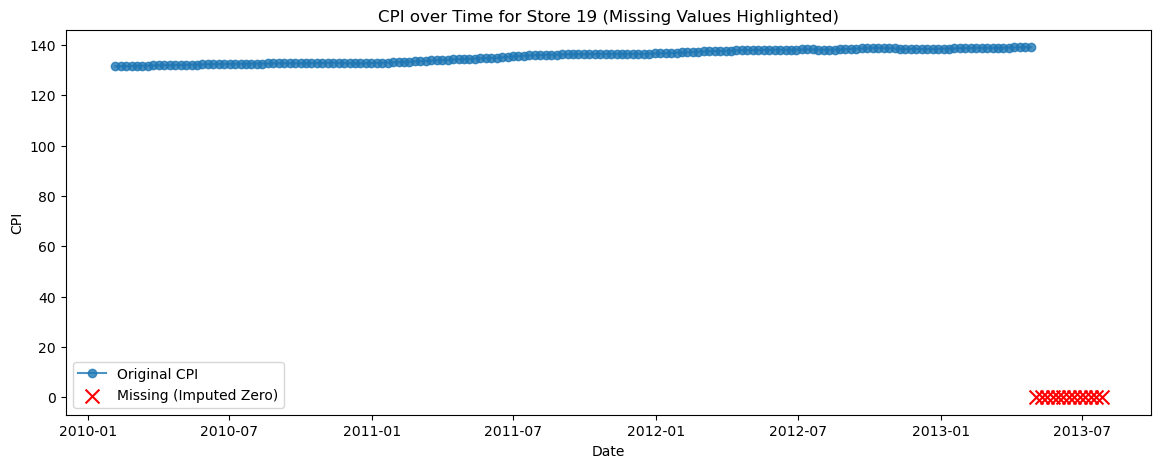

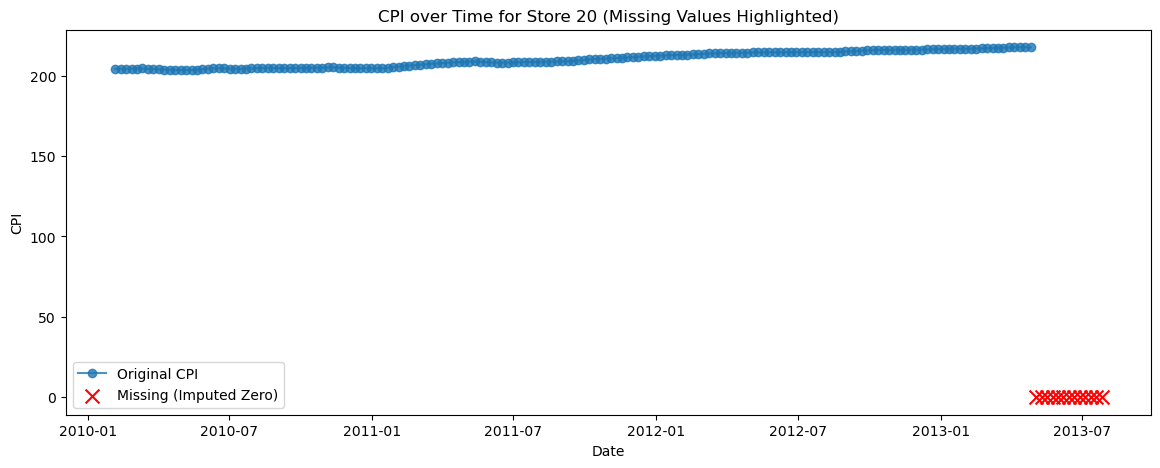

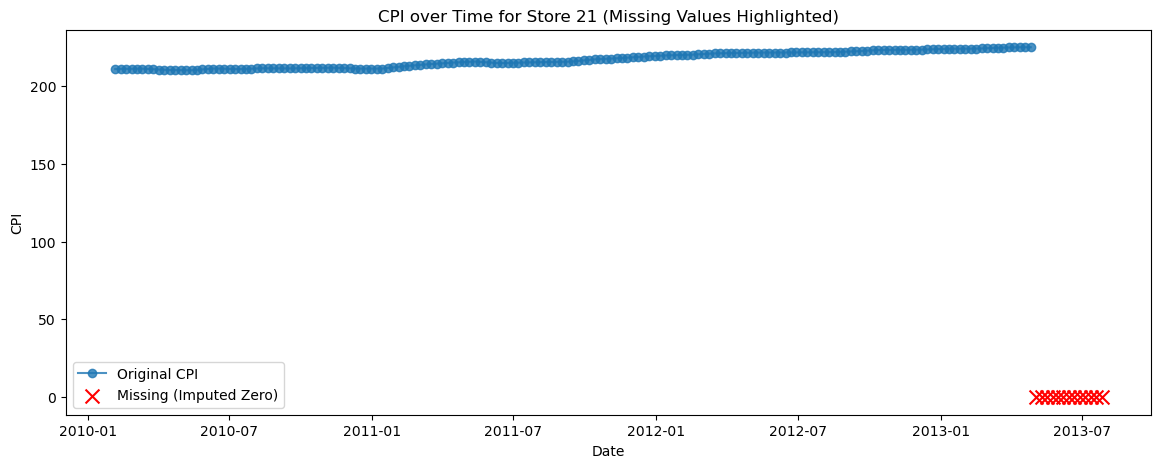

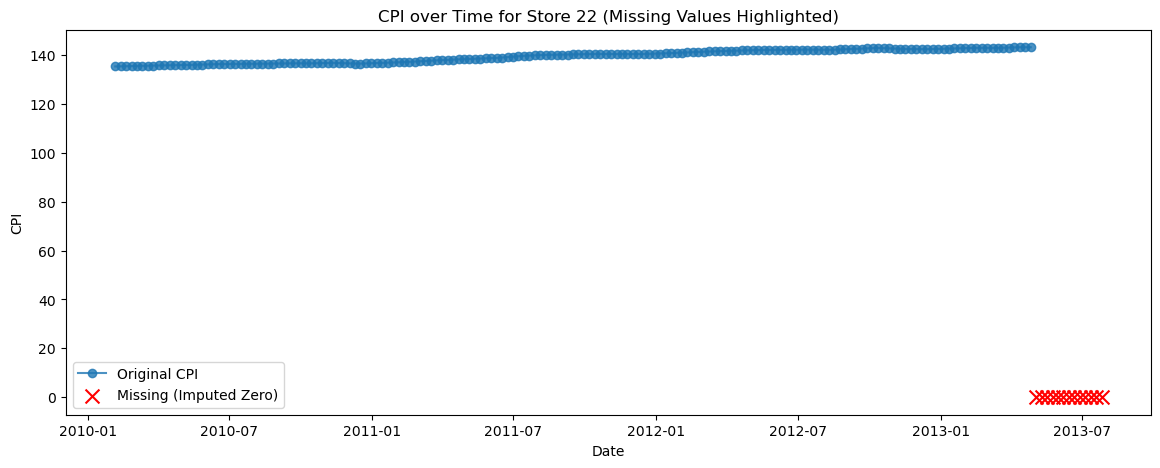

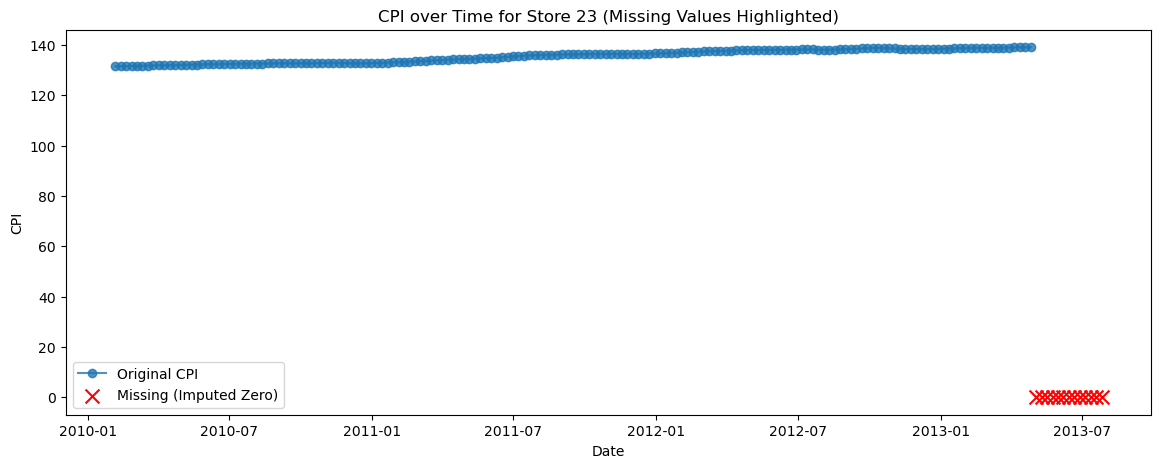

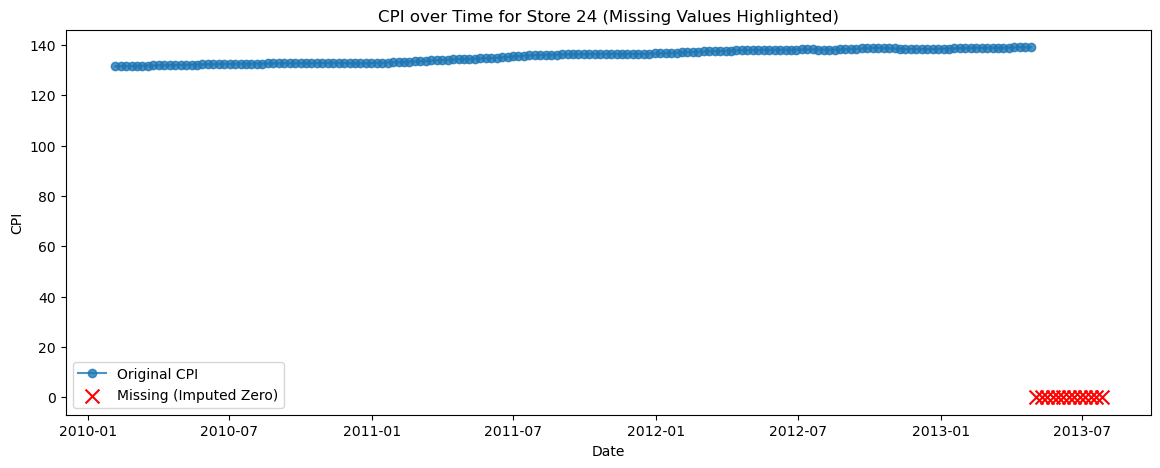

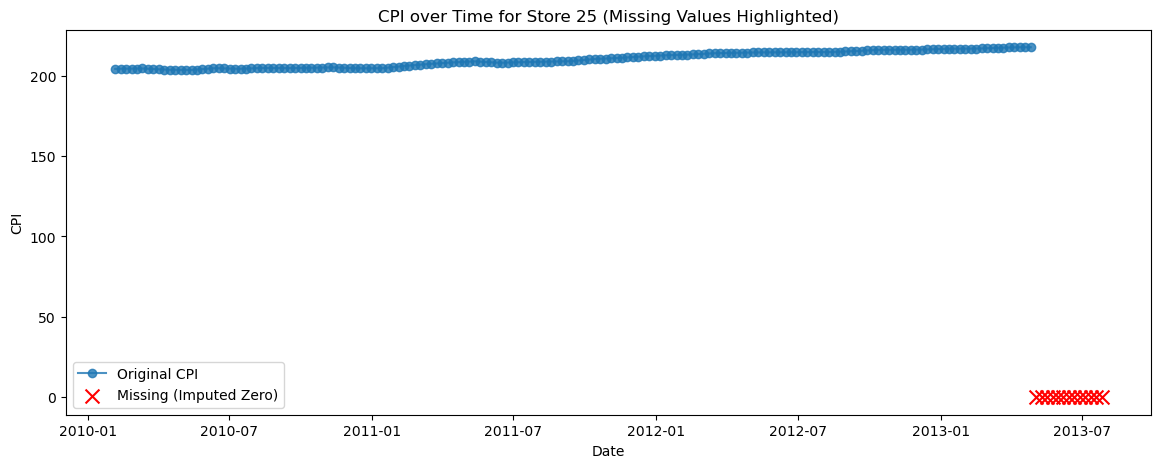

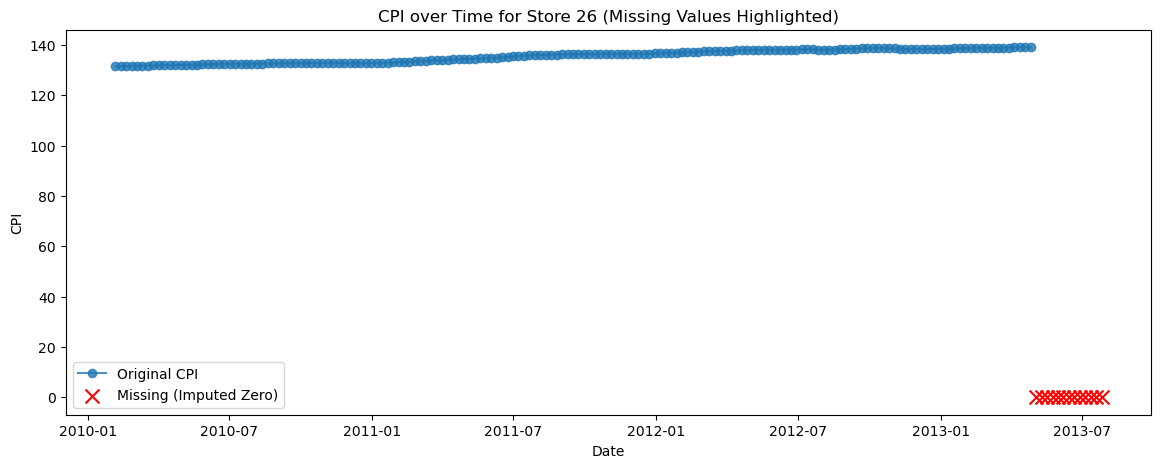

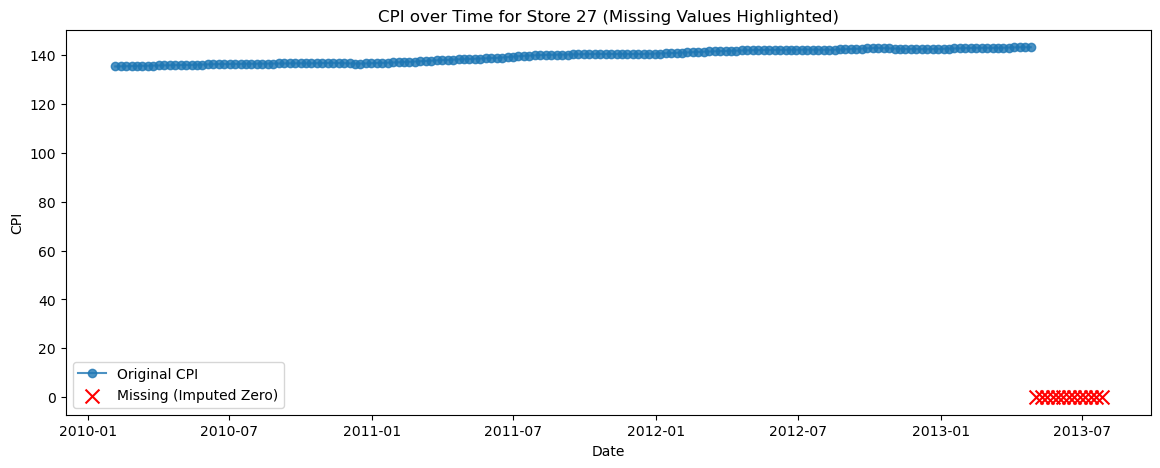

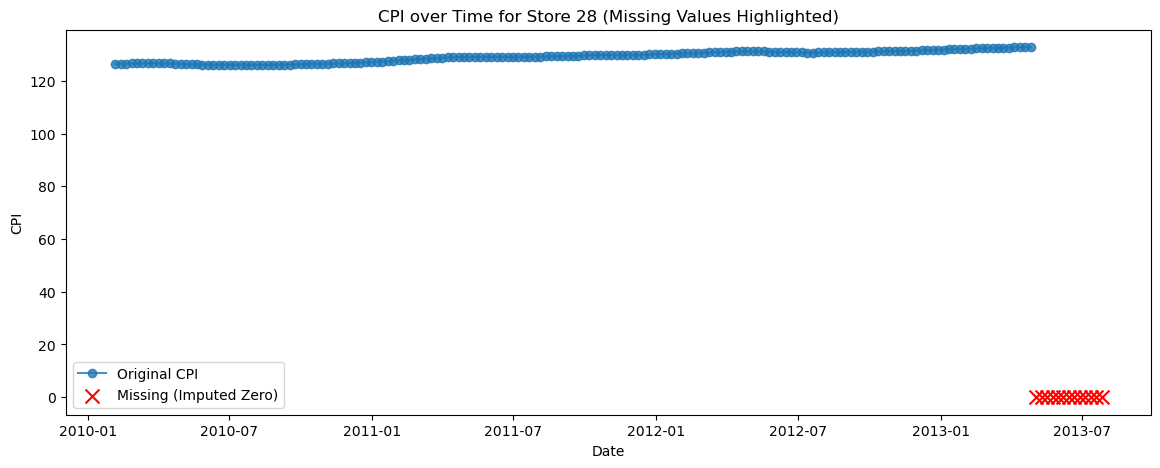

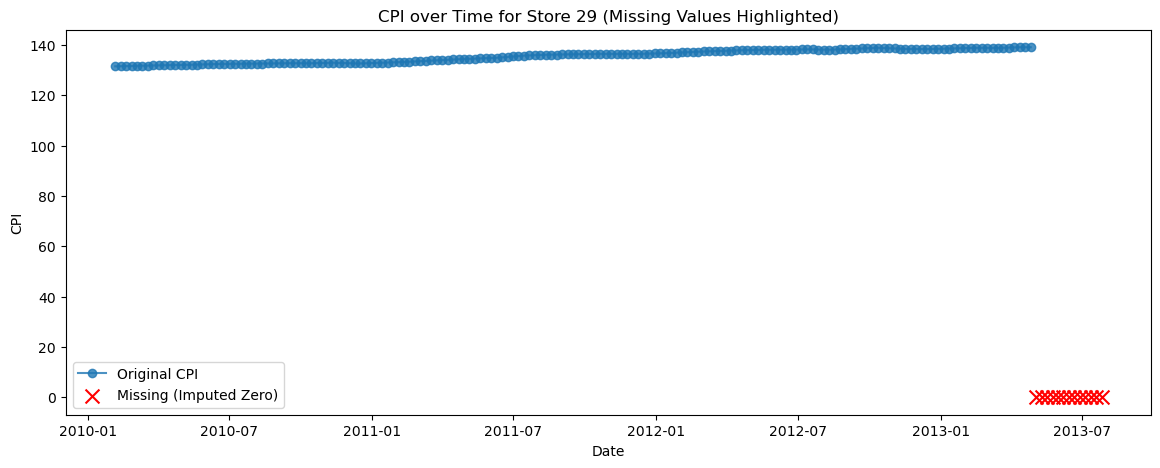

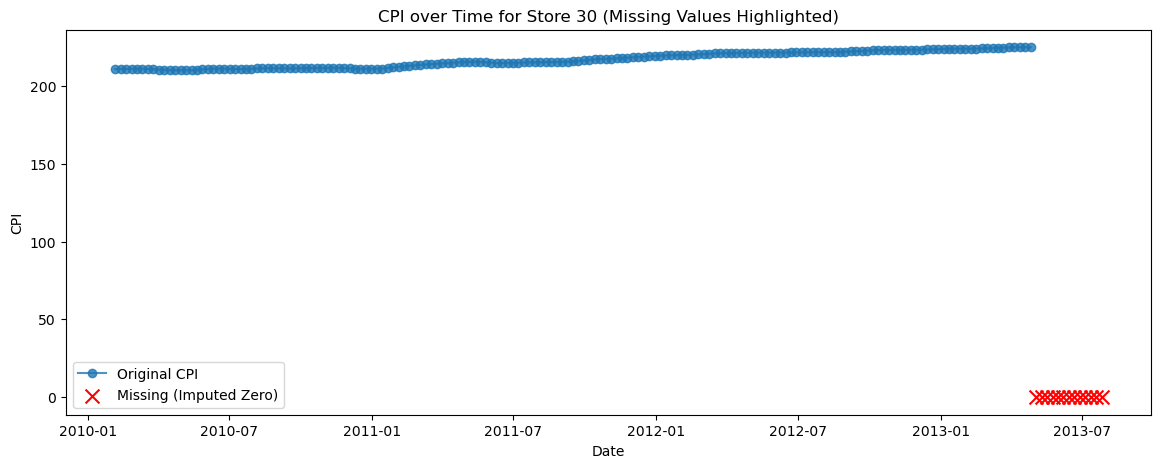

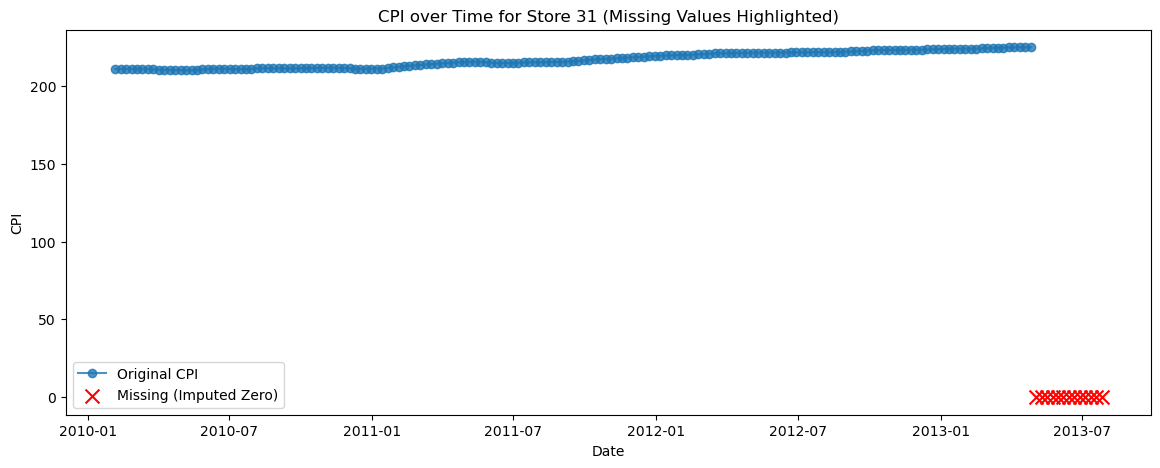

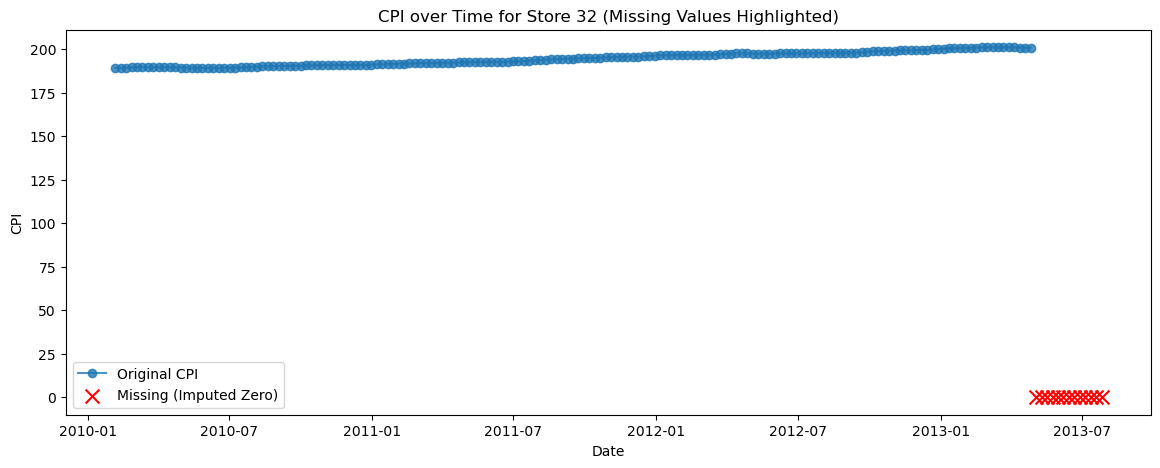

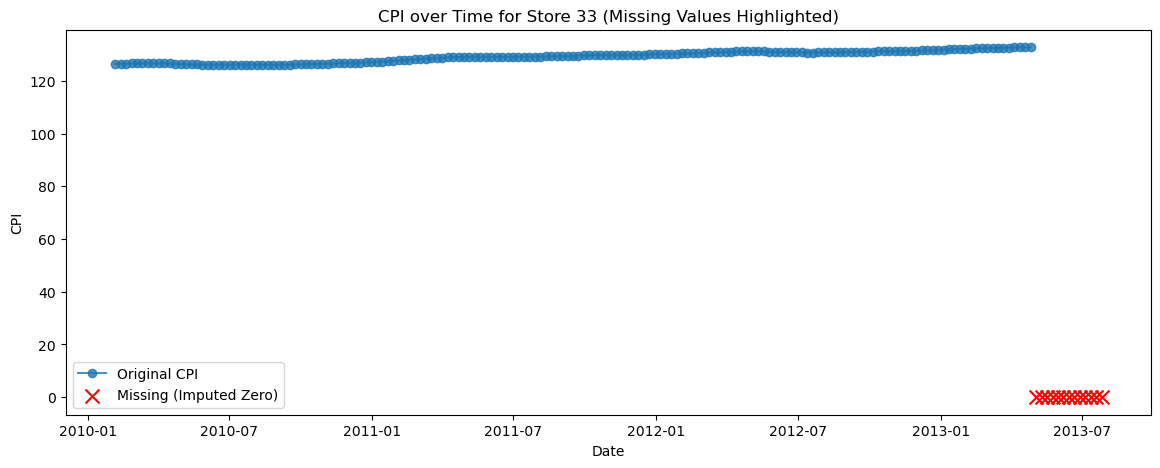

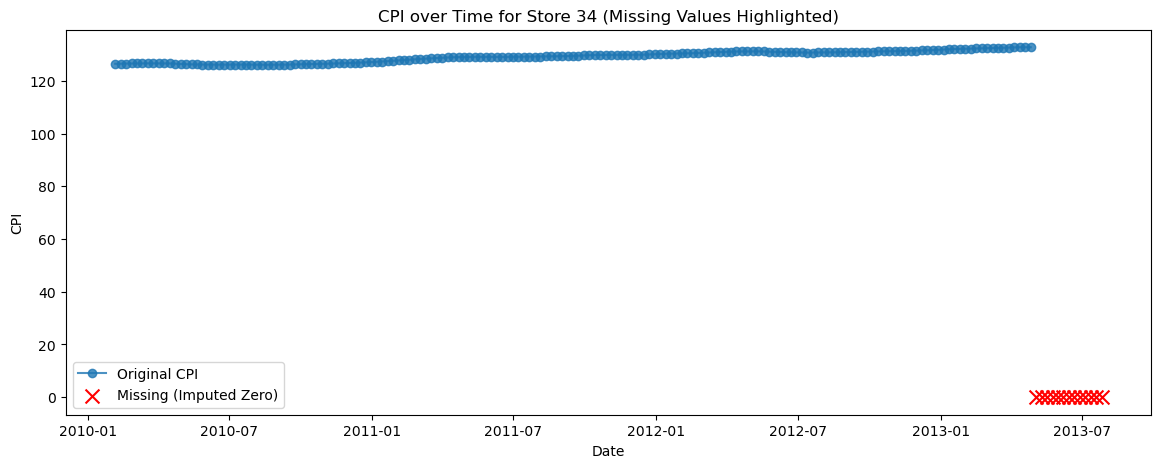

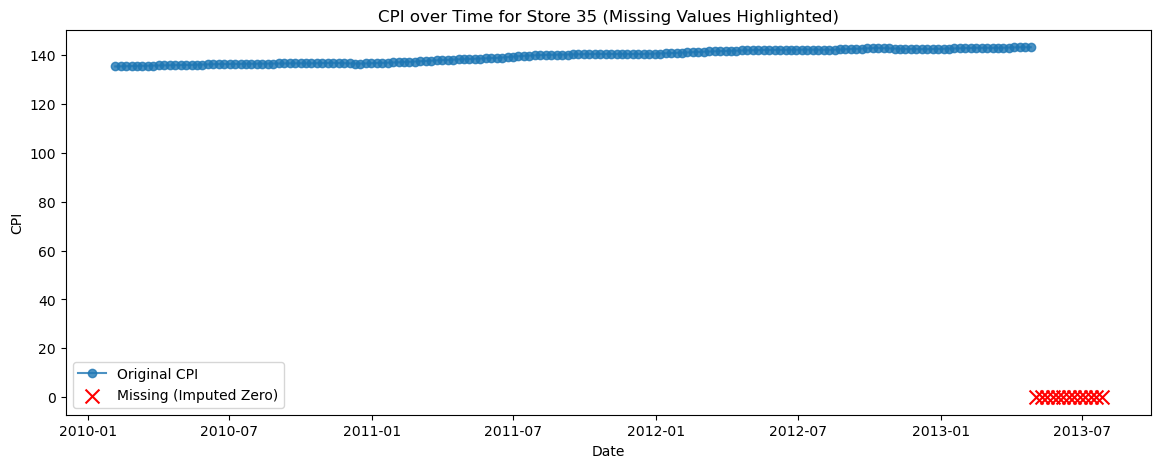

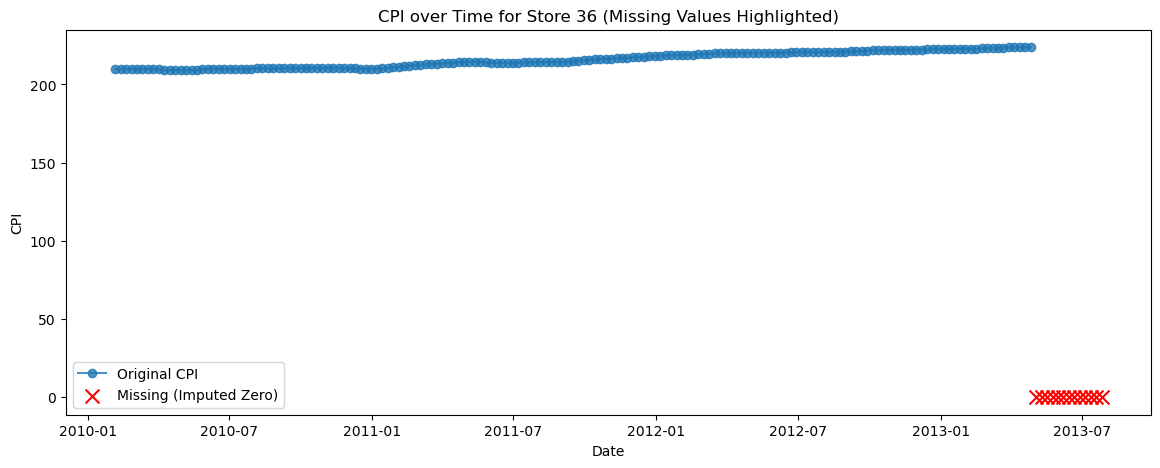

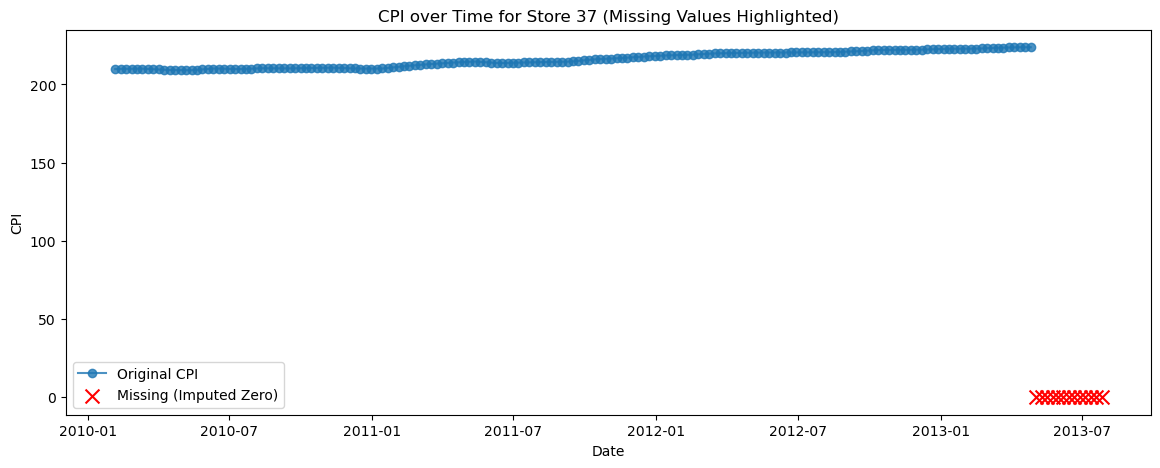

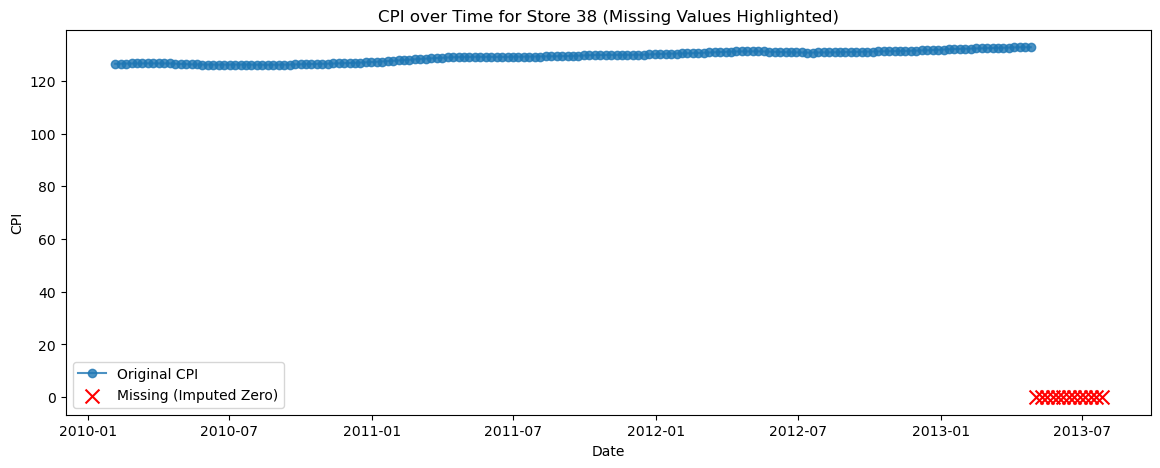

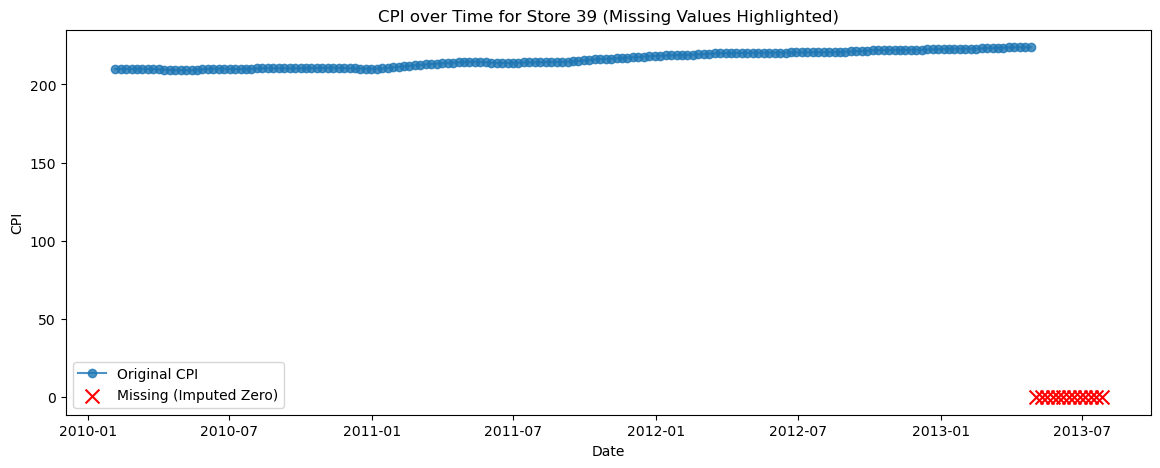

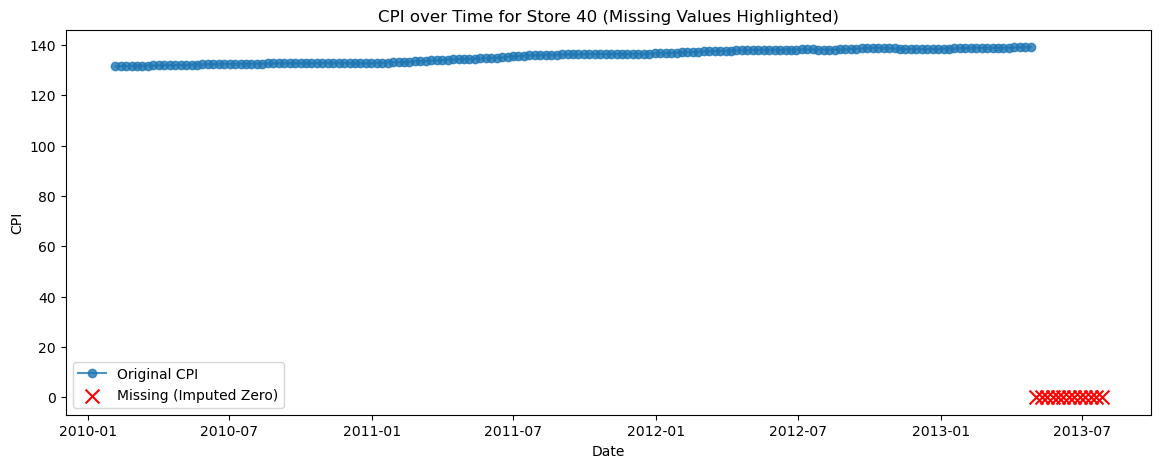

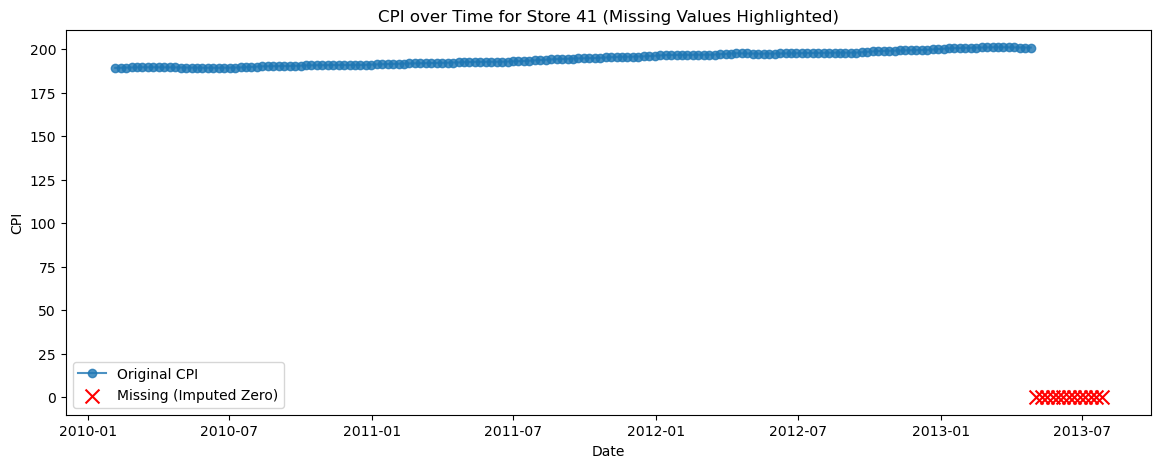

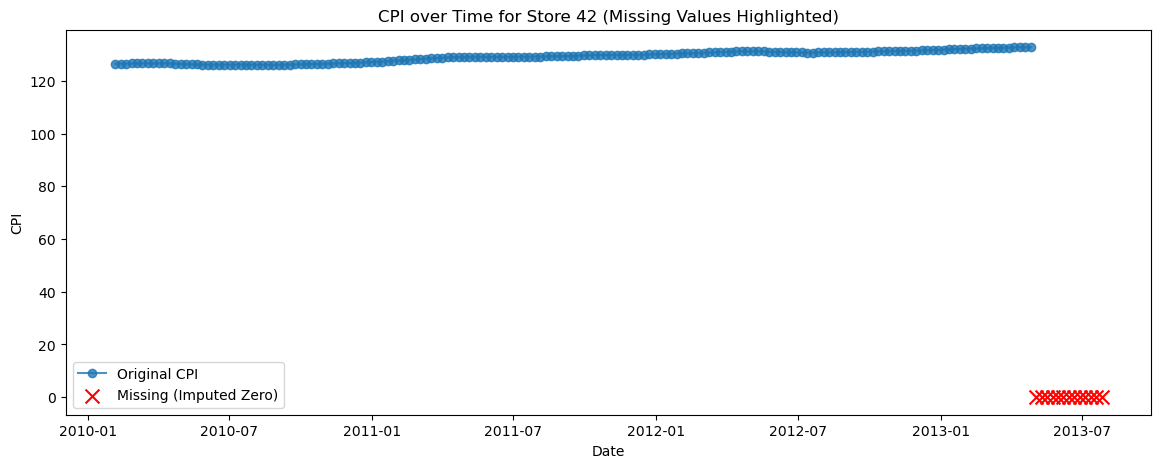

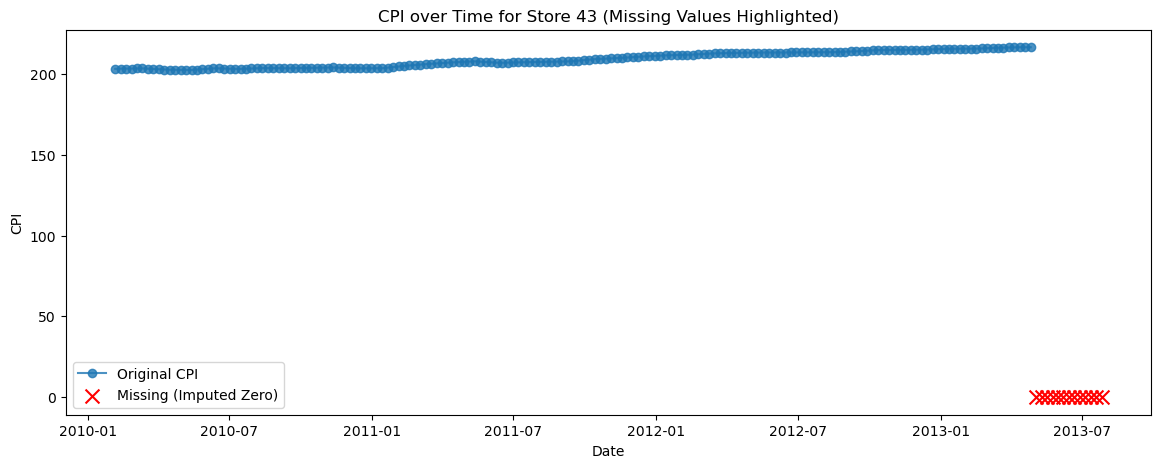

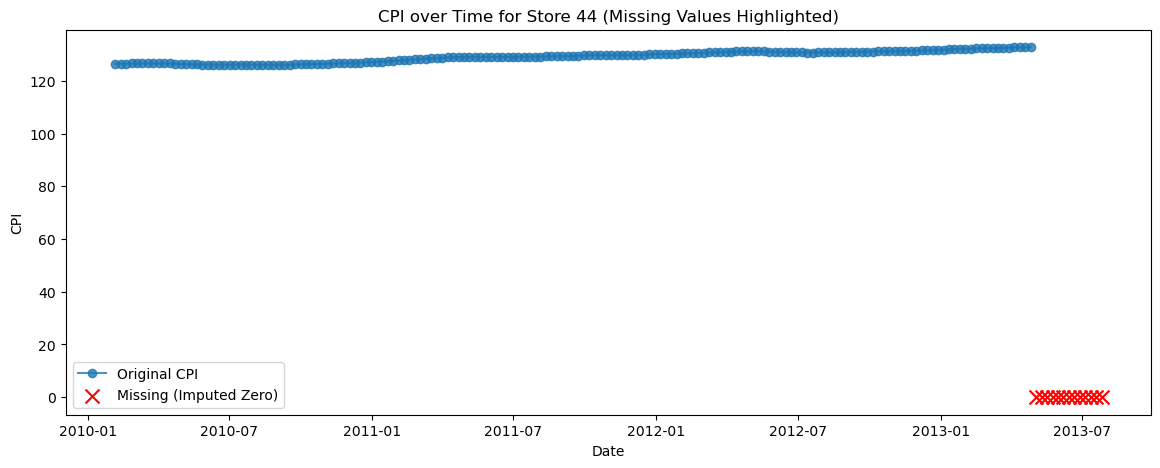

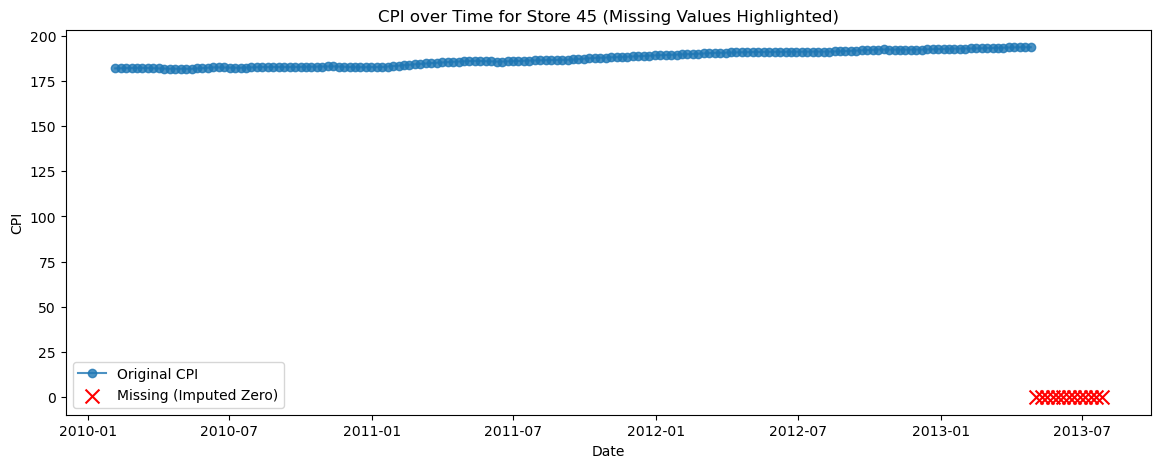

In [10]:
import matplotlib.pyplot as plt

store_nums = df_plot['store'].unique()

for store in store_nums:
    store_data = df_plot[df_plot['store'] == store].sort_values('date')
    
    # Separate original vs missing points
    non_missing = store_data[store_data['cpi'].notna()]
    missing = store_data[store_data['cpi'].isna()]
    
    plt.figure(figsize=(14, 5))
    
    # Plot original non-missing CPI
    plt.plot(non_missing['date'], non_missing['cpi'], 
             label='Original CPI', marker='o', linestyle='-', alpha=0.8)
    
    # Highlight missing values as zeros
    plt.scatter(missing['date'], missing['cpi_filled'], 
                color='red', marker='x', s=100, label='Missing (Imputed Zero)')
    
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.title(f'CPI over Time for Store {store} (Missing Values Highlighted)')
    plt.legend()
    plt.show()


In [11]:
df_plot.head()

store        date  temperature  fuel_price  markdown1  markdown2  \
0      1  2010-02-05        42.31       2.572        0.0        0.0   
1      1  2010-02-12        38.51       2.548        0.0        0.0   
2      1  2010-02-19        39.93       2.514        0.0        0.0   
3      1  2010-02-26        46.63       2.561        0.0        0.0   
4      1  2010-03-05        46.50       2.625        0.0        0.0   

   markdown3  markdown4  markdown5  total_markdown         cpi  unemployment  \
0        0.0        0.0        0.0             0.0  211.096358         8.106   
1        0.0        0.0        0.0             0.0  211.242170         8.106   
2        0.0        0.0        0.0             0.0  211.289143         8.106   
3        0.0        0.0        0.0             0.0  211.319643         8.106   
4        0.0        0.0        0.0             0.0  211.350143         8.106   

   isholiday  cpi_filled  
0      False  211.096358  
1       True  211.242170  
2      False  211.289143  
3      False  211.319643  
4      False  211.350143

In [12]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_polynomial_degrees(store_data, column, degrees=[2,3,4,5,6], alpha=1.0):
    """
    Plot multiple polynomial fits of different degrees for a single store's time series,
    scaling only the time index to reduce numerical instability, while keeping the date column unchanged.
    
    Args:
        store_data (pd.DataFrame): Data for a single store
        column (str): Column to plot ('cpi' or 'unemployment')
        degrees (list): List of polynomial degrees to fit
        alpha (float): Ridge regularization strength
    """
    # Sort by date
    store_data = store_data.sort_values('date').copy()
    
    # Create time index for polynomial features (do NOT scale date itself)
    store_data['t'] = np.arange(len(store_data)).reshape(-1, 1)
    y = store_data[column].values
    missing_mask = np.isnan(y)
    
    # Scale the time index 't' only
    scaler = StandardScaler()
    t_scaled = scaler.fit_transform(store_data[['t']])
    
    plt.figure(figsize=(14,6))
    
    # Plot observed points
    plt.scatter(store_data.loc[~missing_mask, 'date'], y[~missing_mask], color='blue', marker='o', label='Observed')
    
    # Fit and plot each polynomial degree
    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)
        X_poly_train = poly.fit_transform(t_scaled[~missing_mask])
        
        model = Ridge(alpha=alpha)
        model.fit(X_poly_train, y[~missing_mask])
        
        # Predict for all points
        X_poly_all = poly.transform(t_scaled)
        y_all_pred = model.predict(X_poly_all)
        
        # Plot polynomial curve
        plt.plot(store_data['date'], y_all_pred, linewidth=2, label=f'Degree {degree} Ridge Fit')
    
    # Highlight missing points
    if missing_mask.any():
        plt.scatter(store_data.loc[missing_mask, 'date'], y[missing_mask], color='red', marker='x', s=100, label='Missing')
    
    plt.title(f'{column.upper()} Polynomial Fits - Store {store_data["store"].iloc[0]}')
    plt.xlabel('Date')
    plt.ylabel(column.upper())
    plt.legend()
    plt.show()


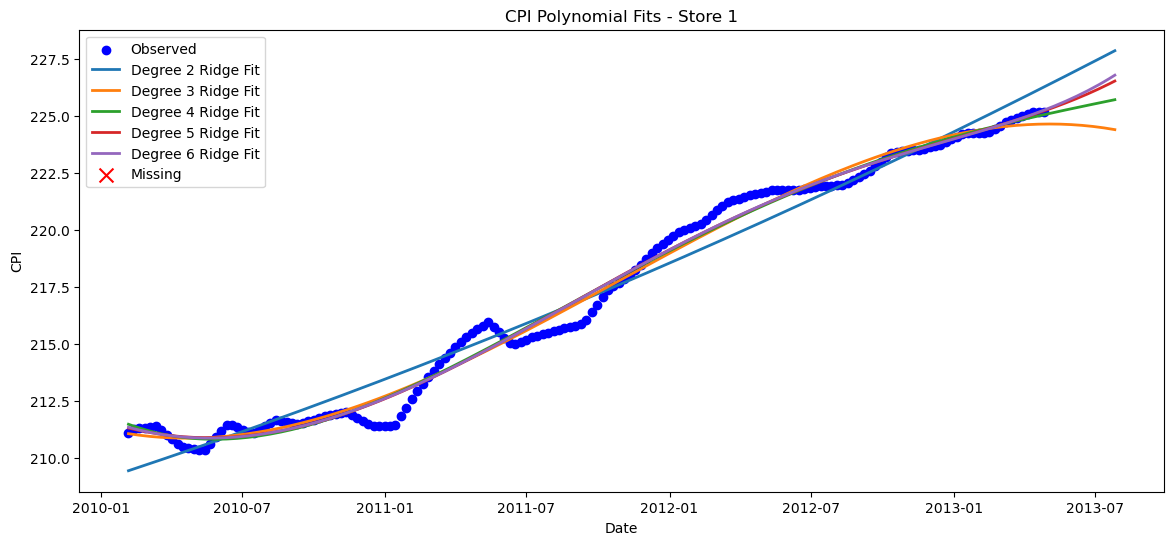

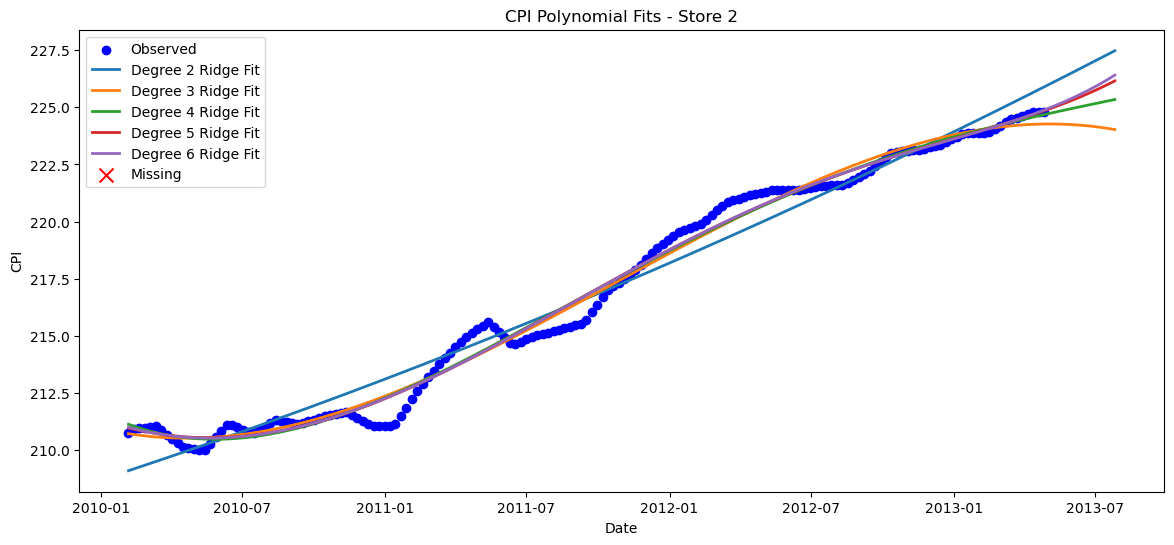

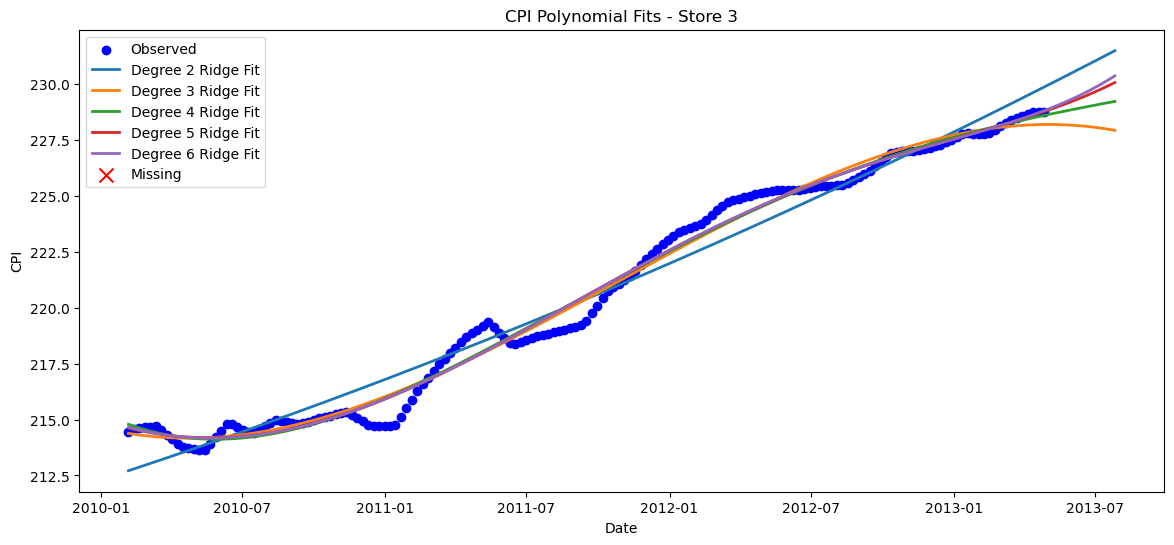

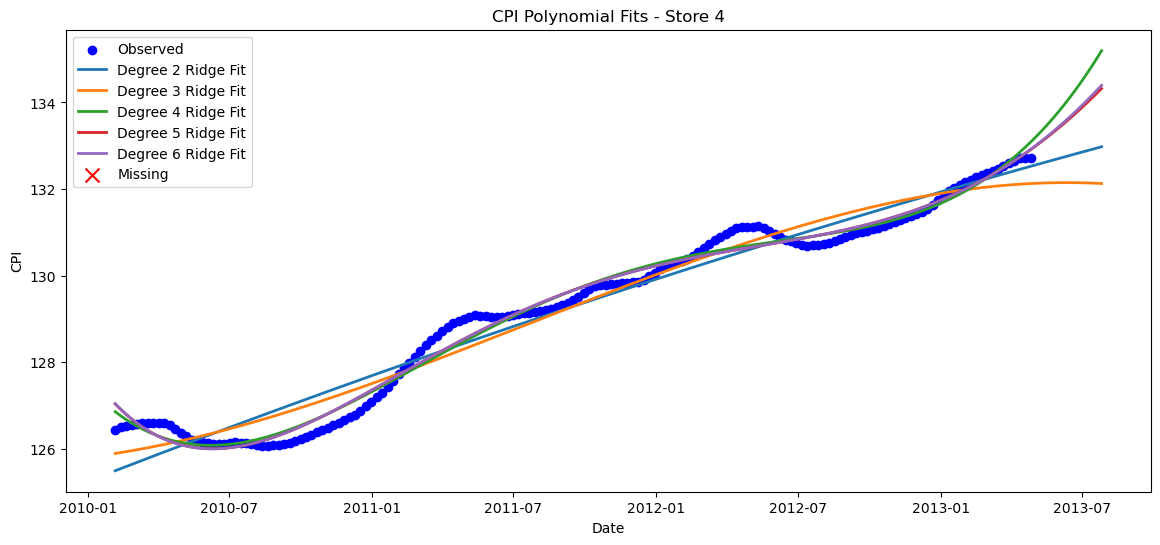

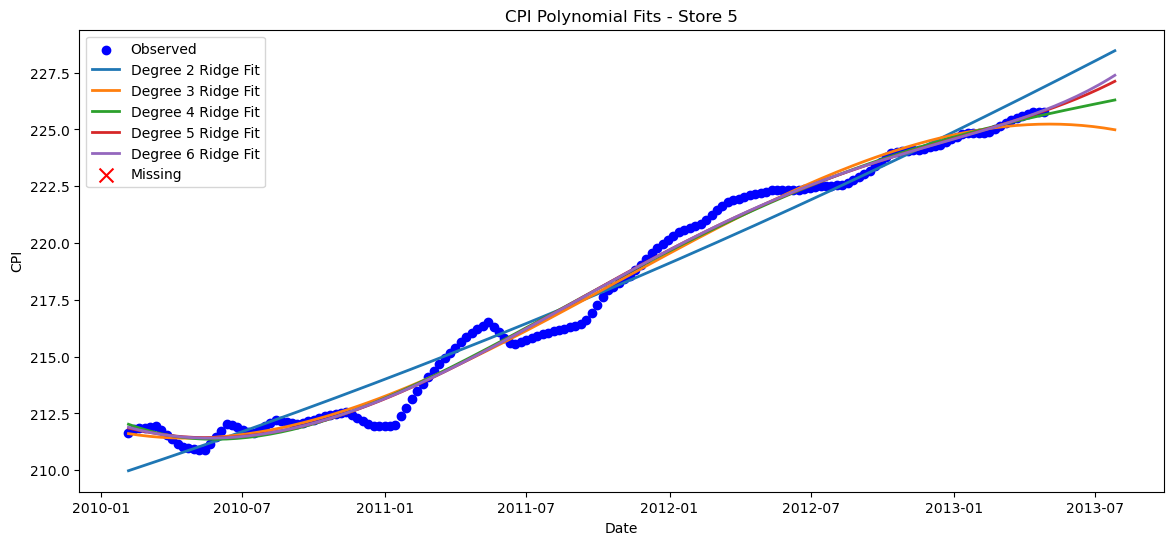

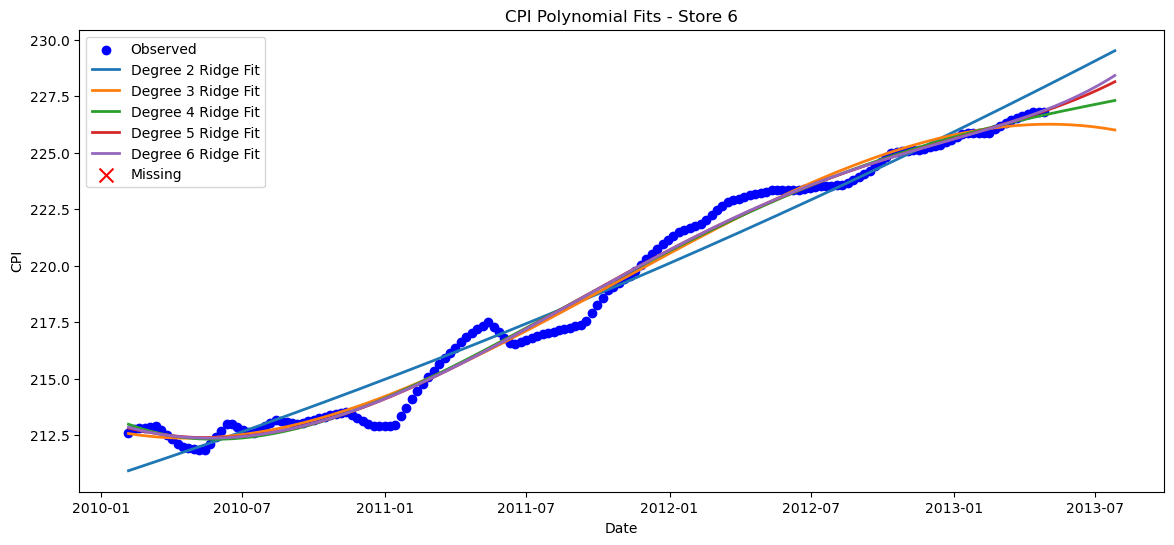

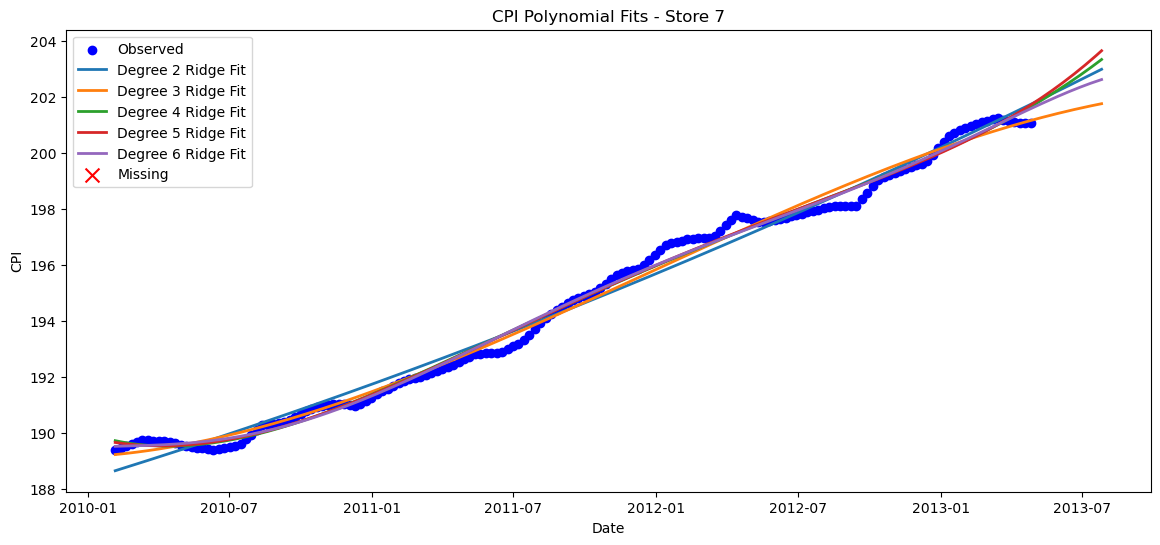

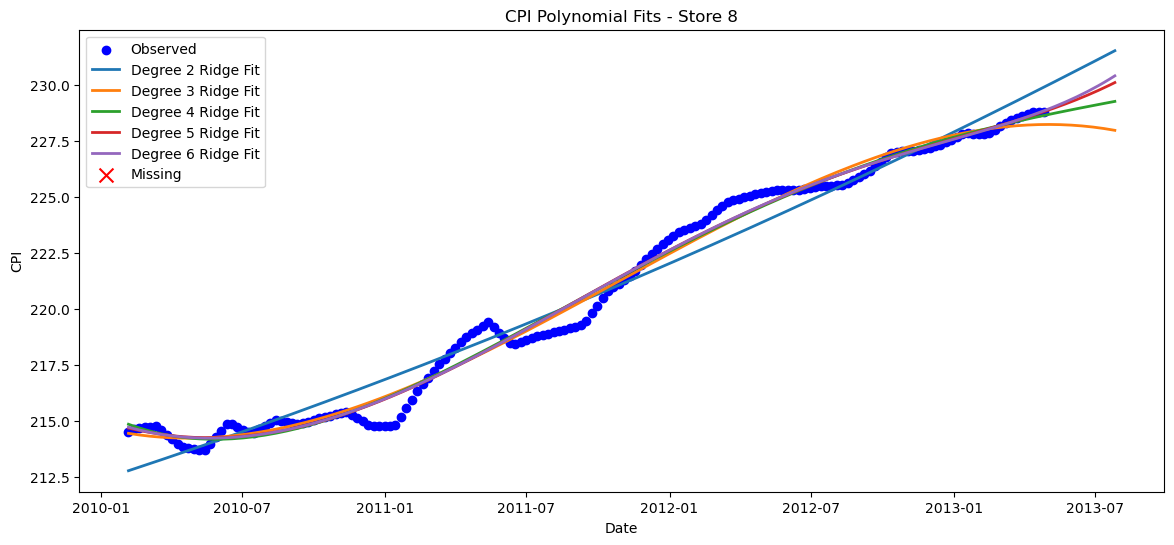

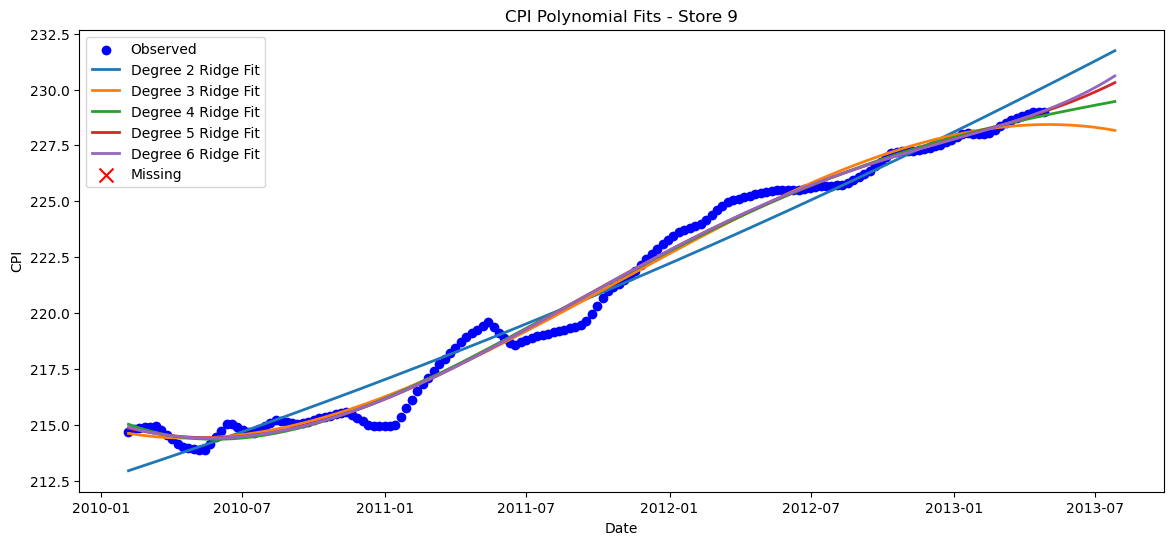

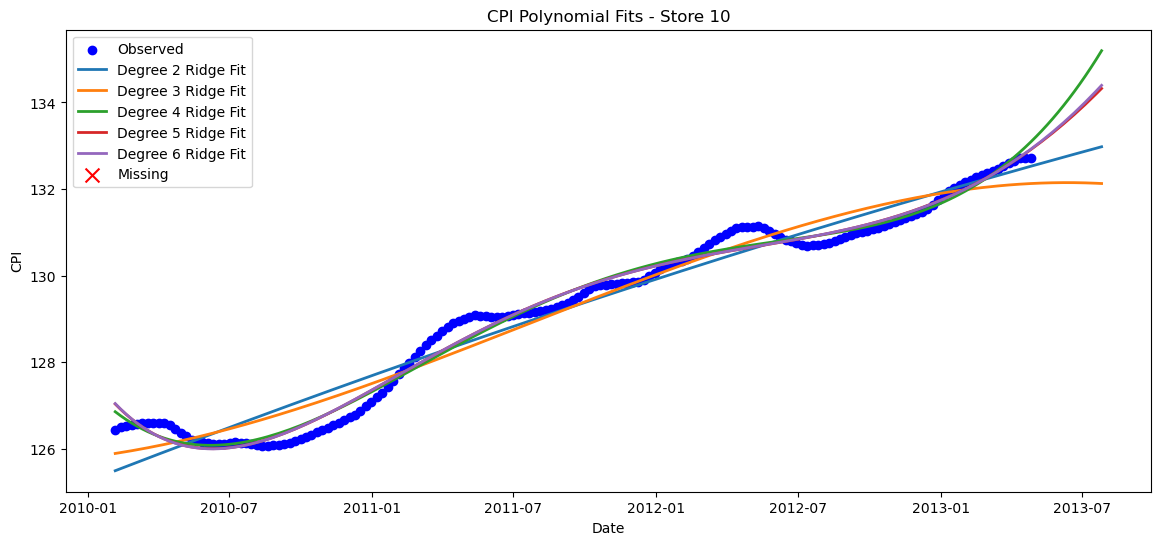

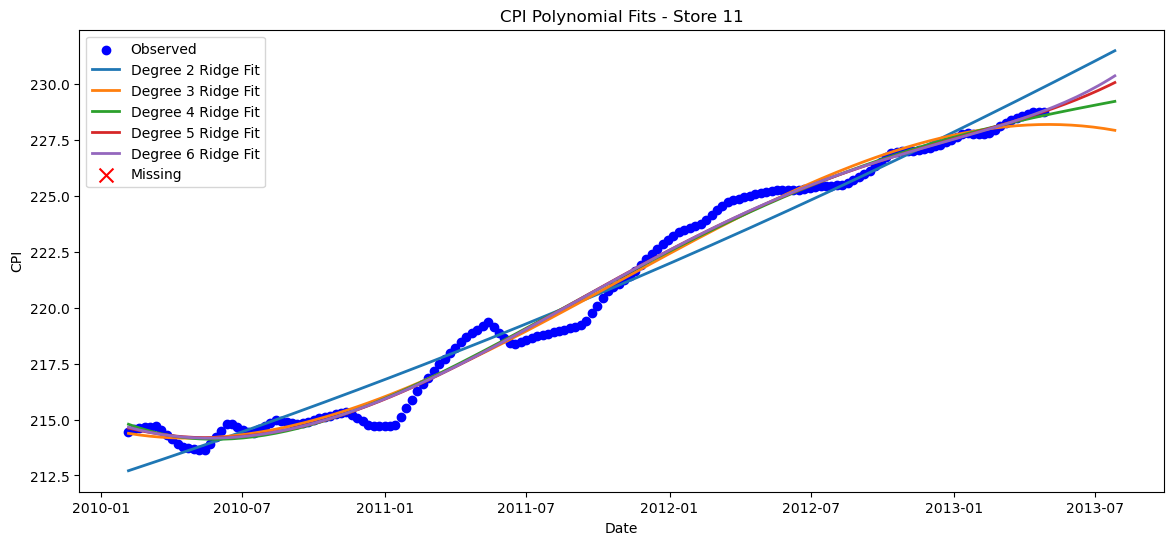

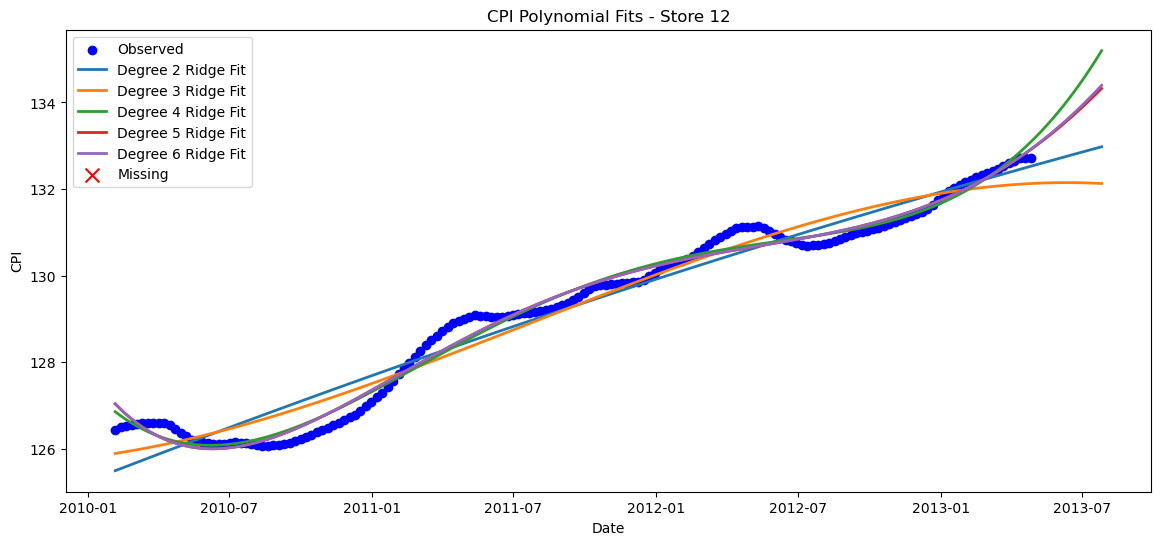

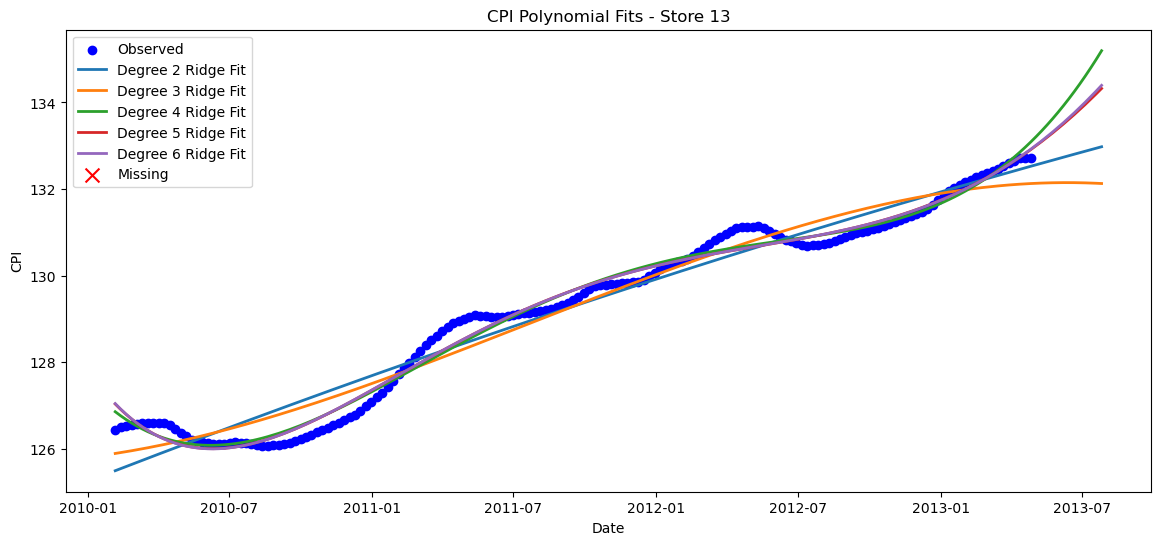

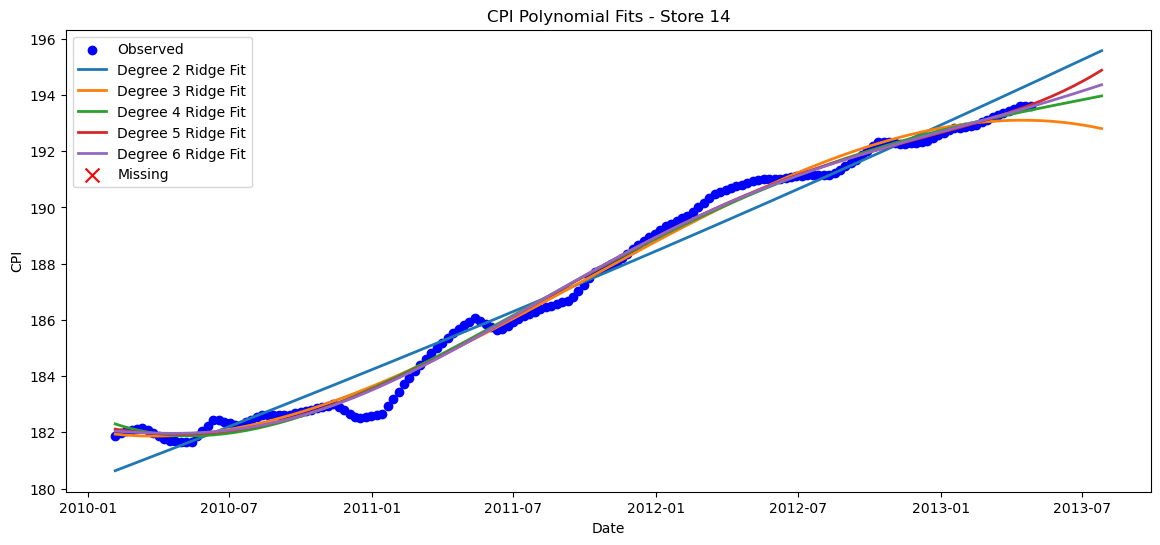

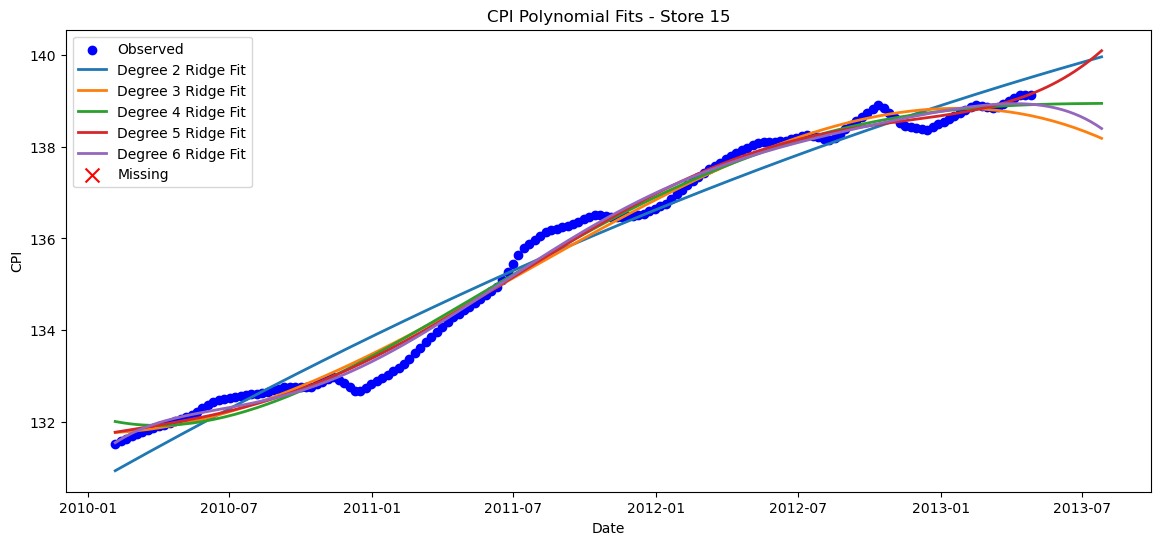

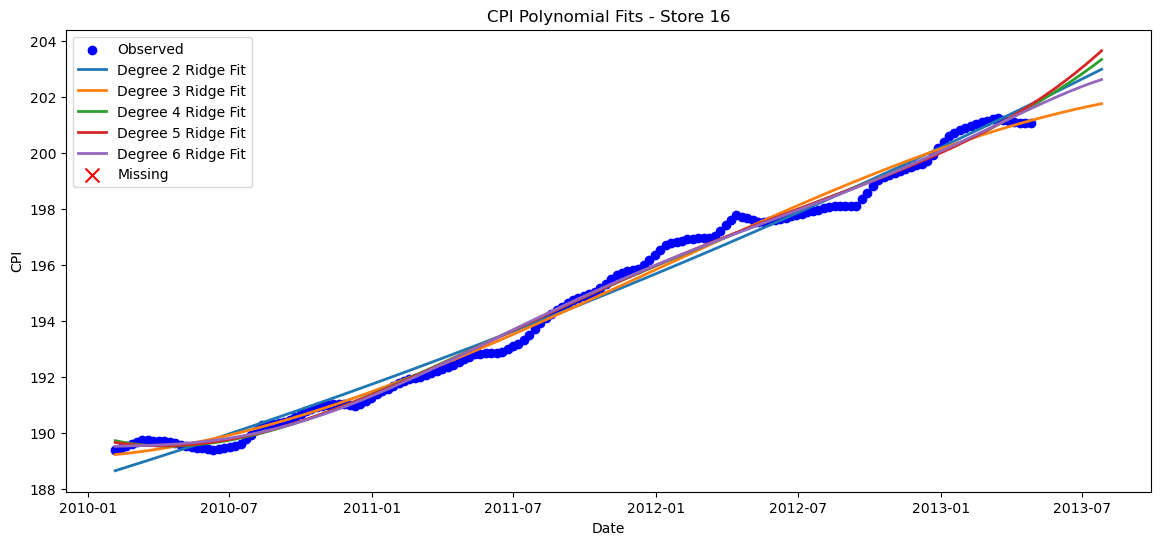

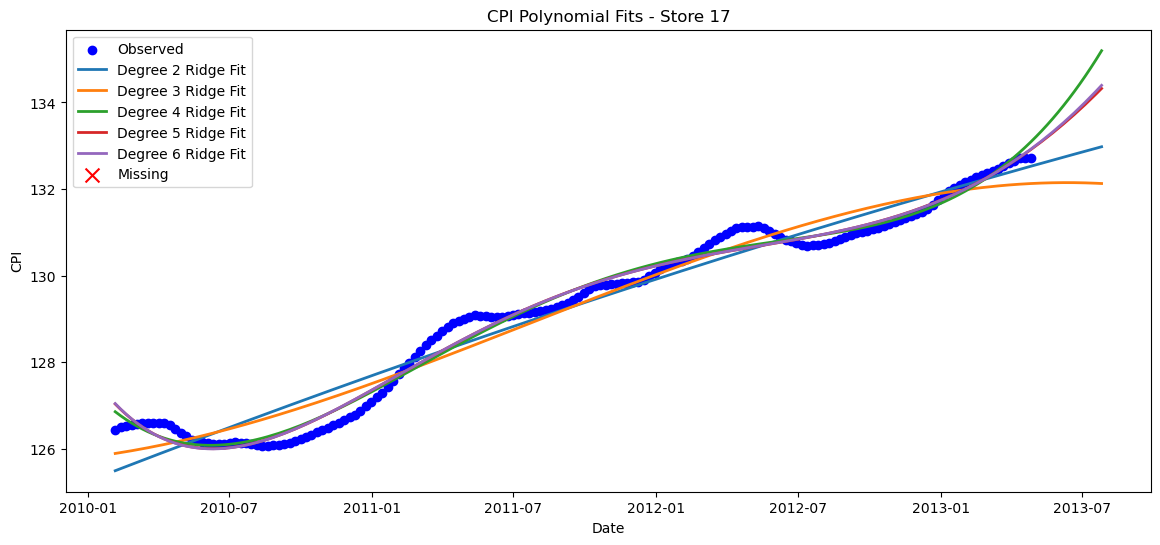

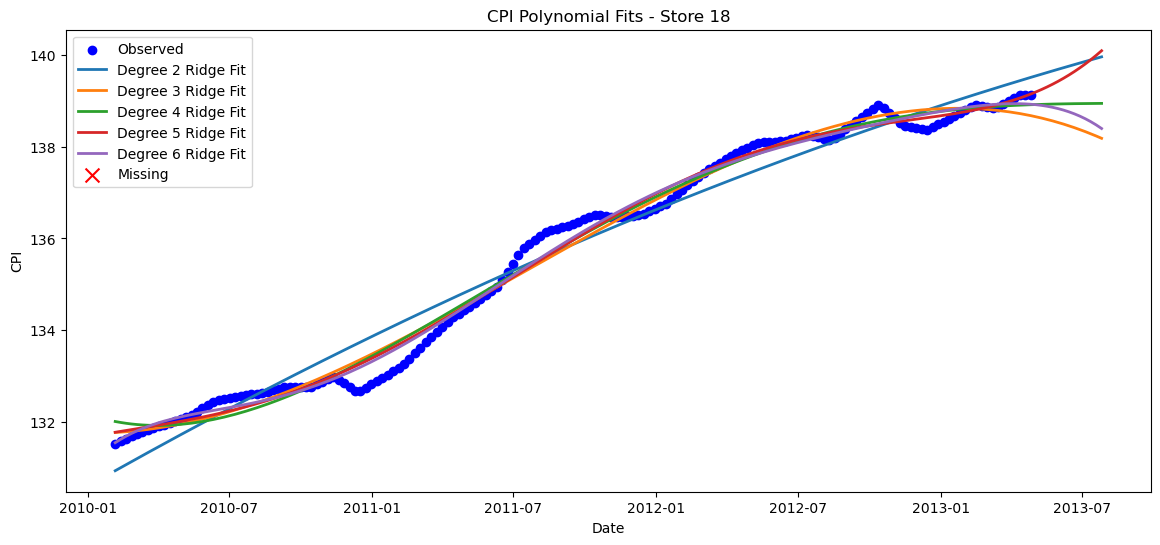

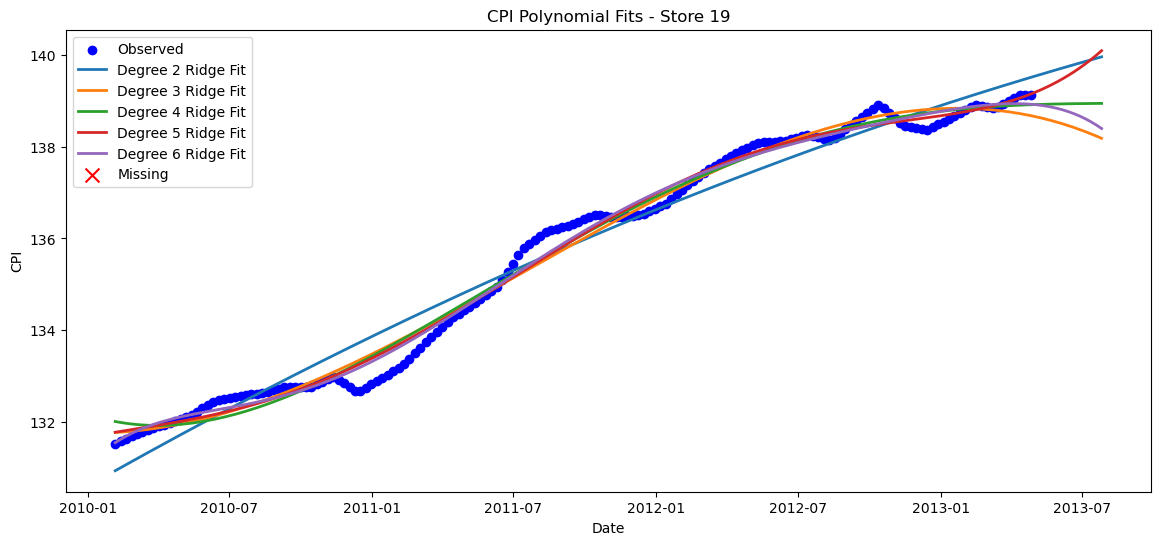

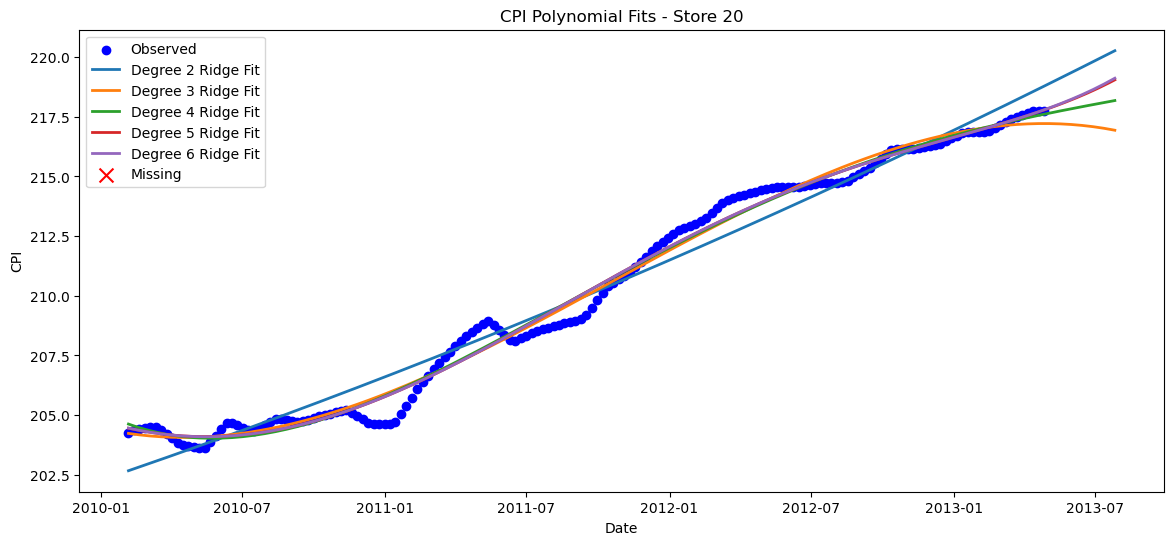

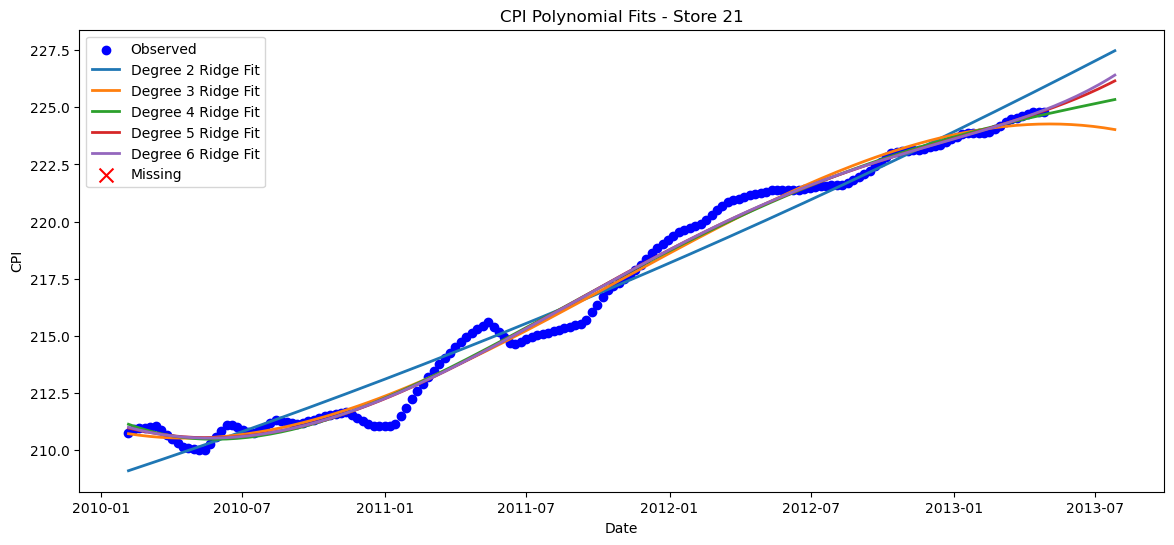

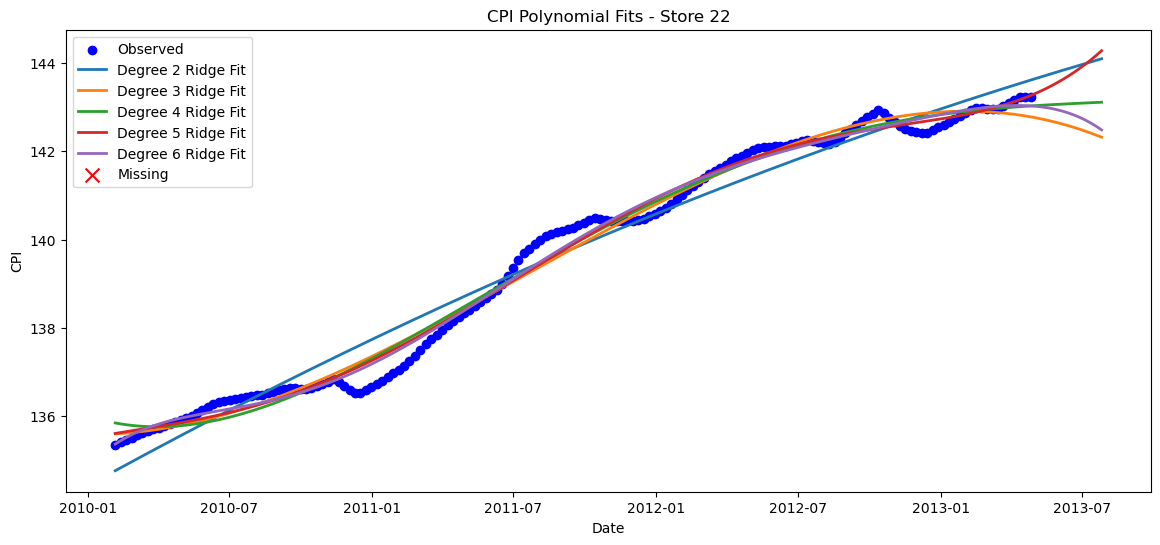

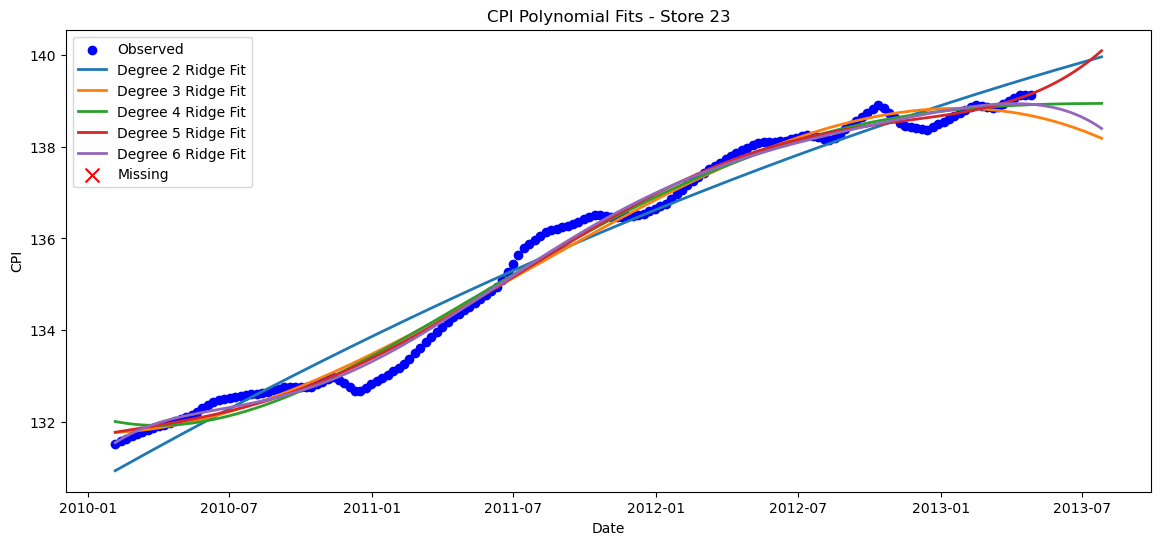

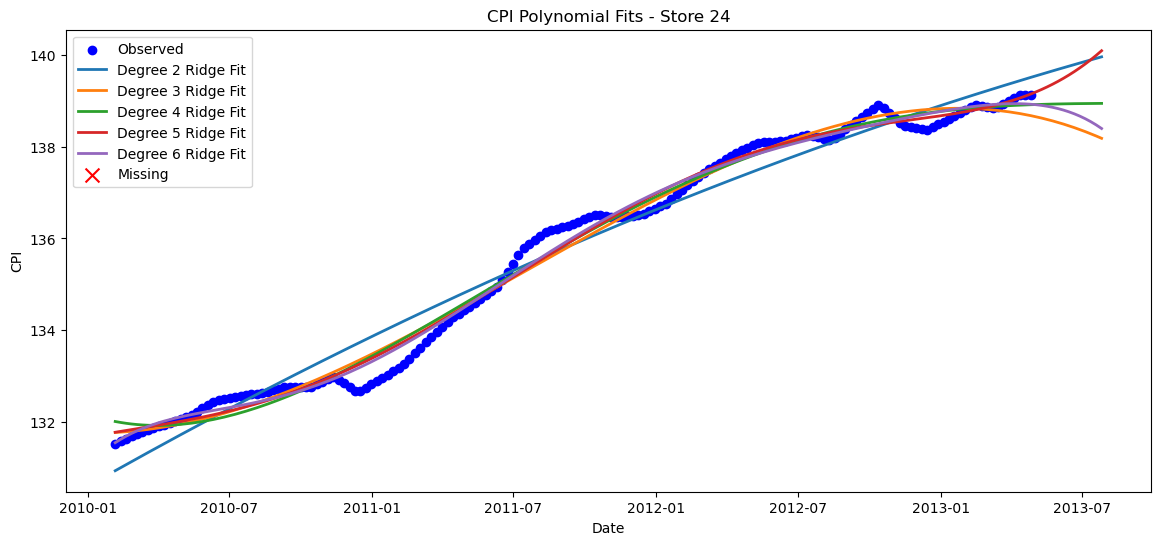

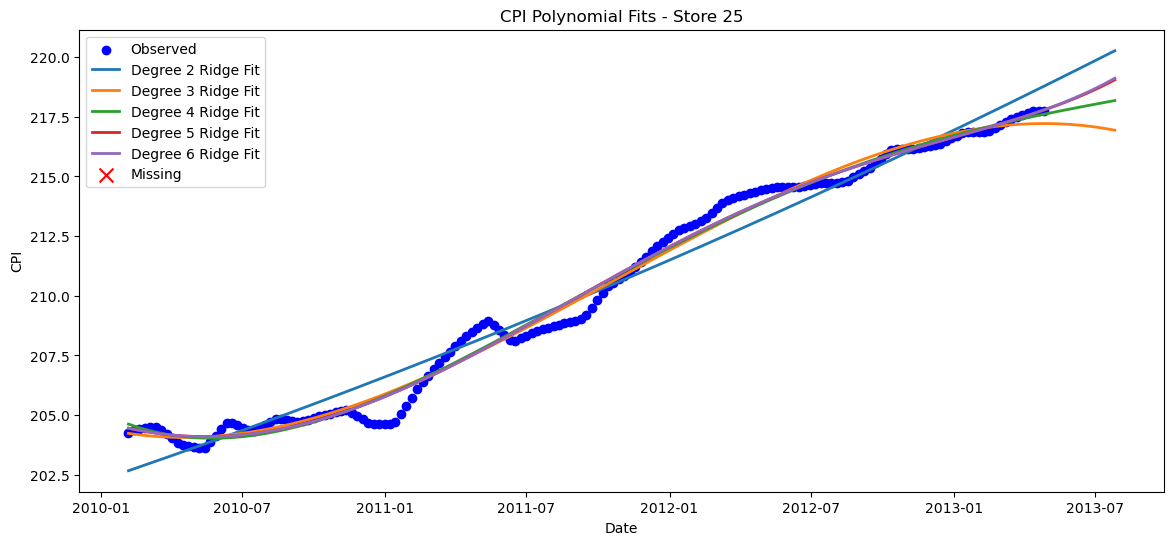

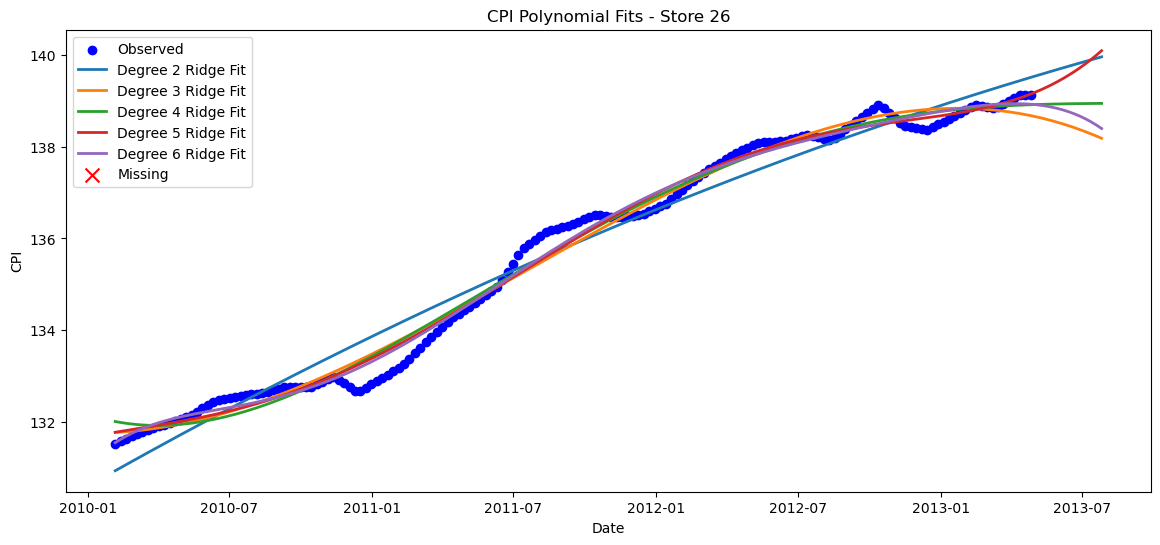

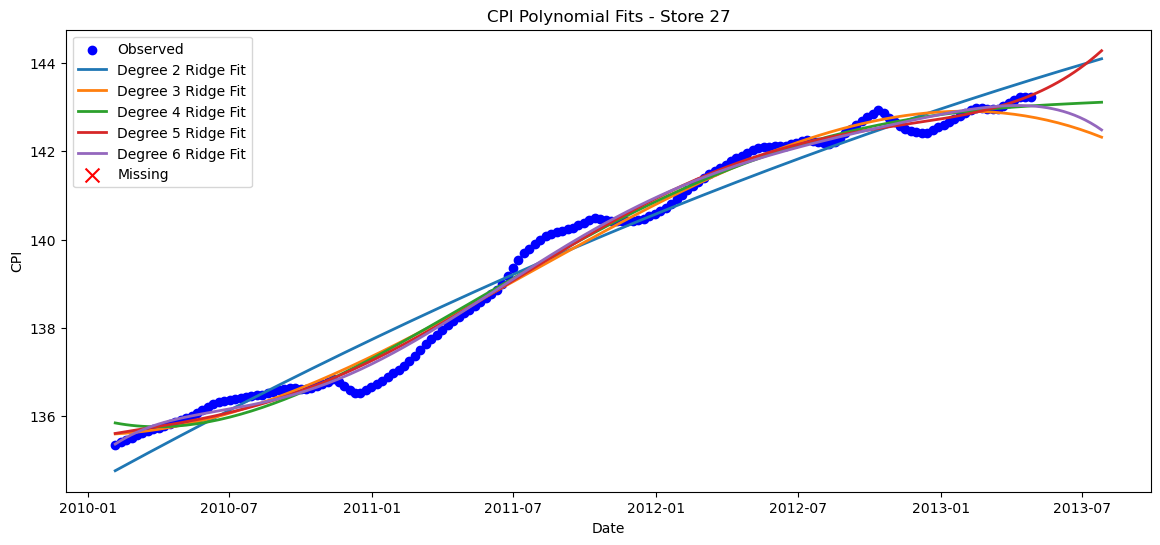

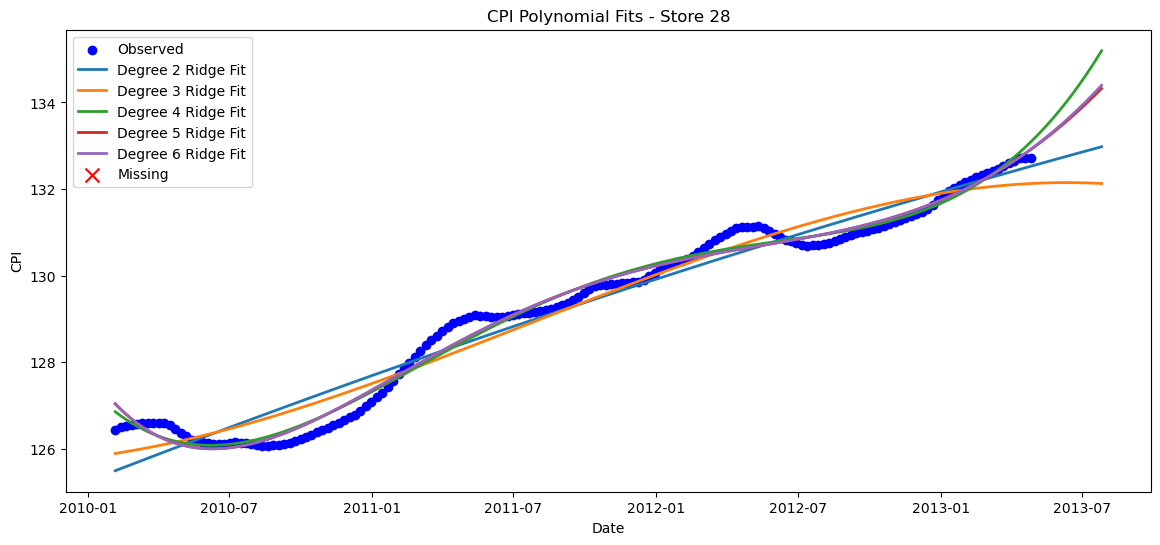

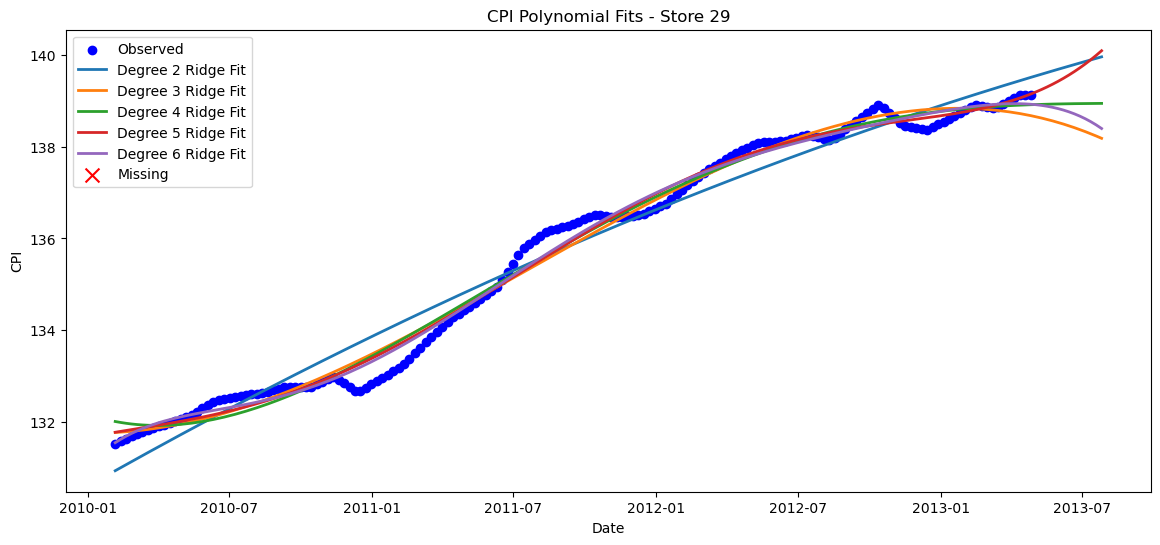

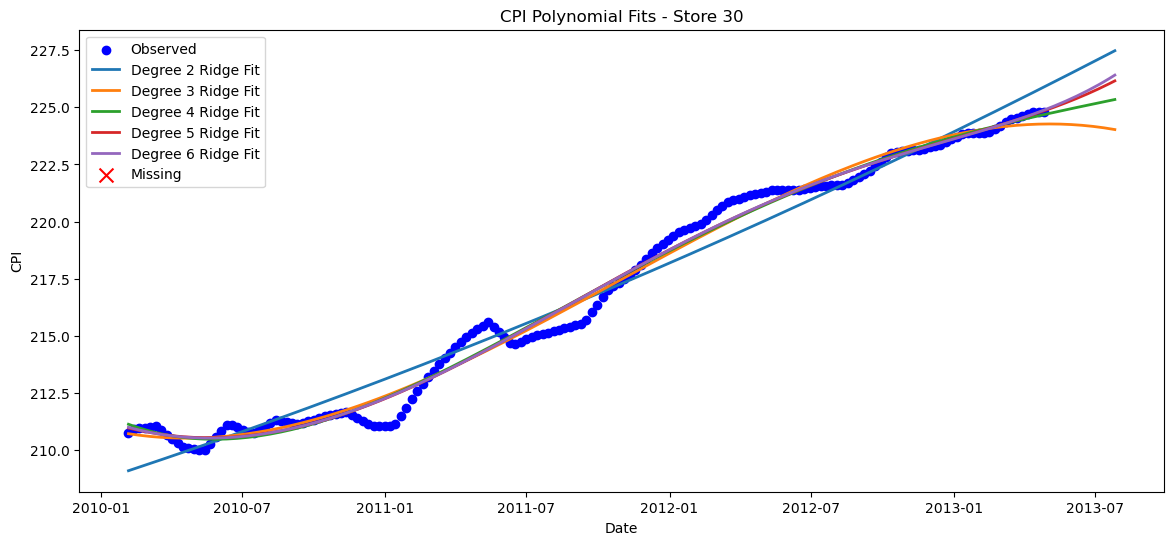

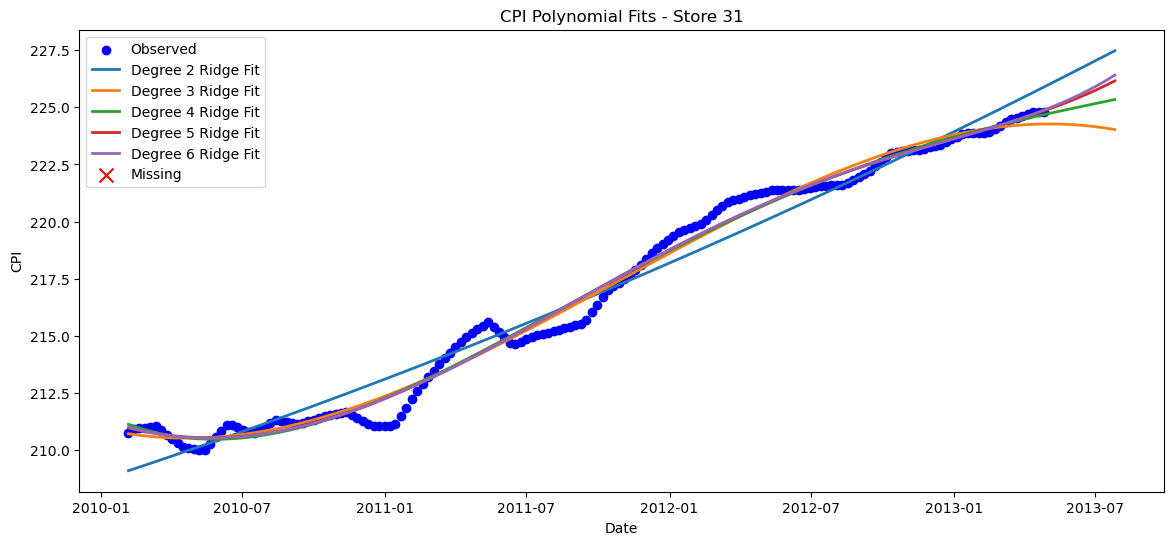

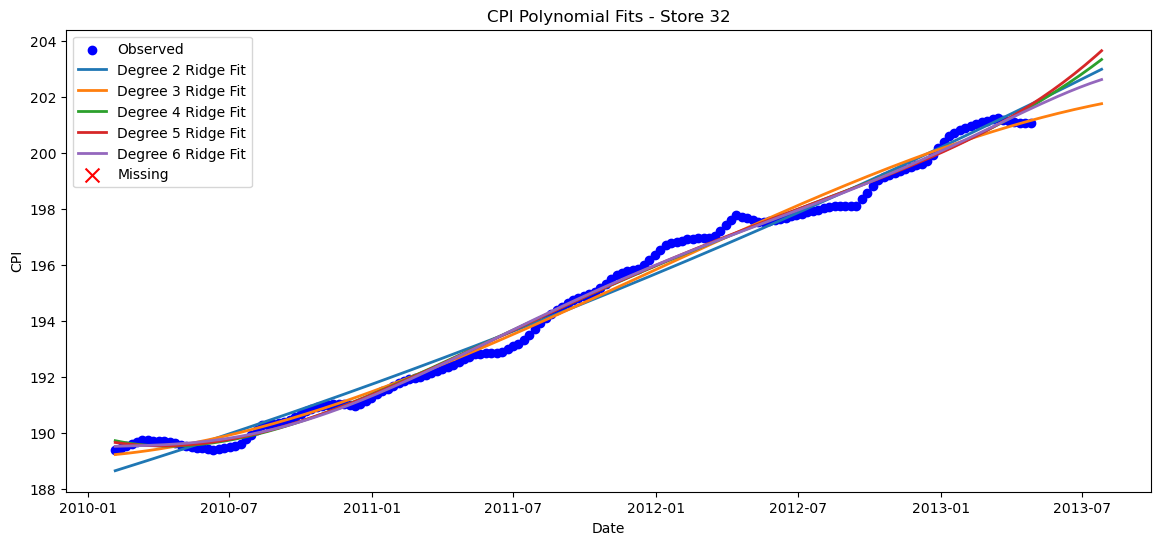

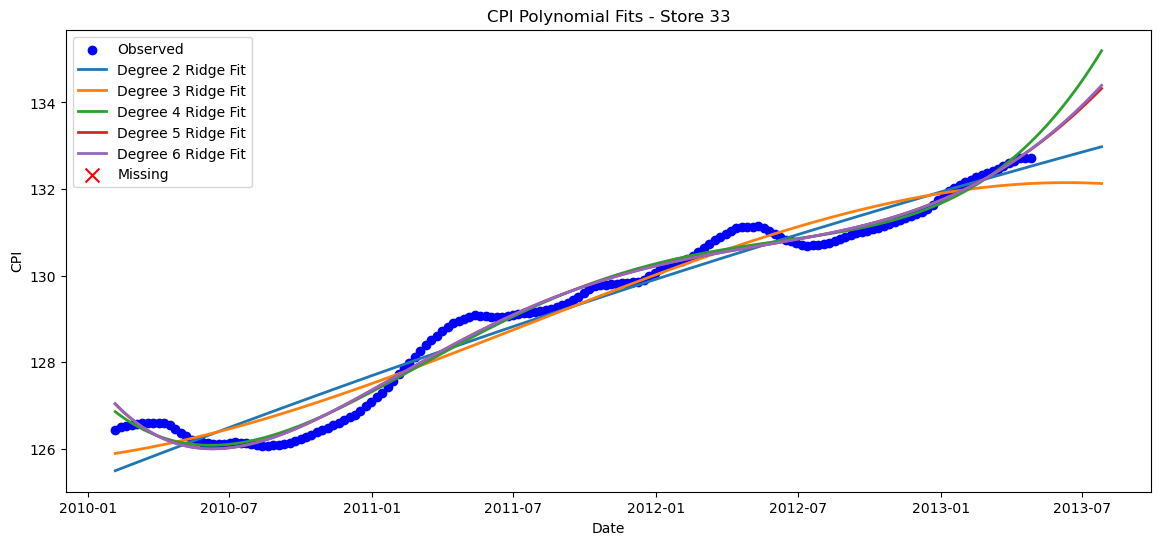

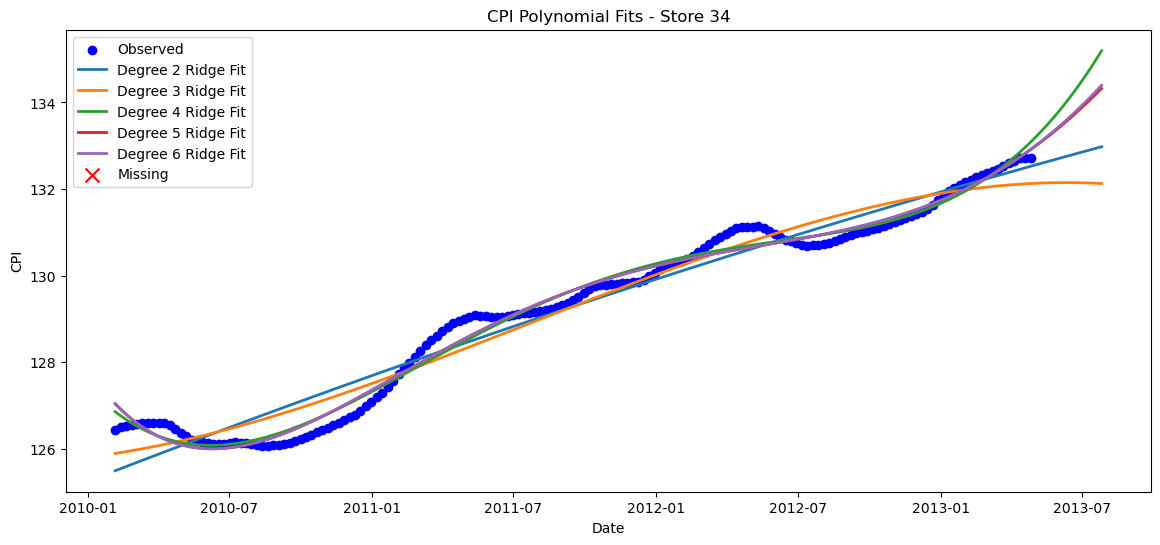

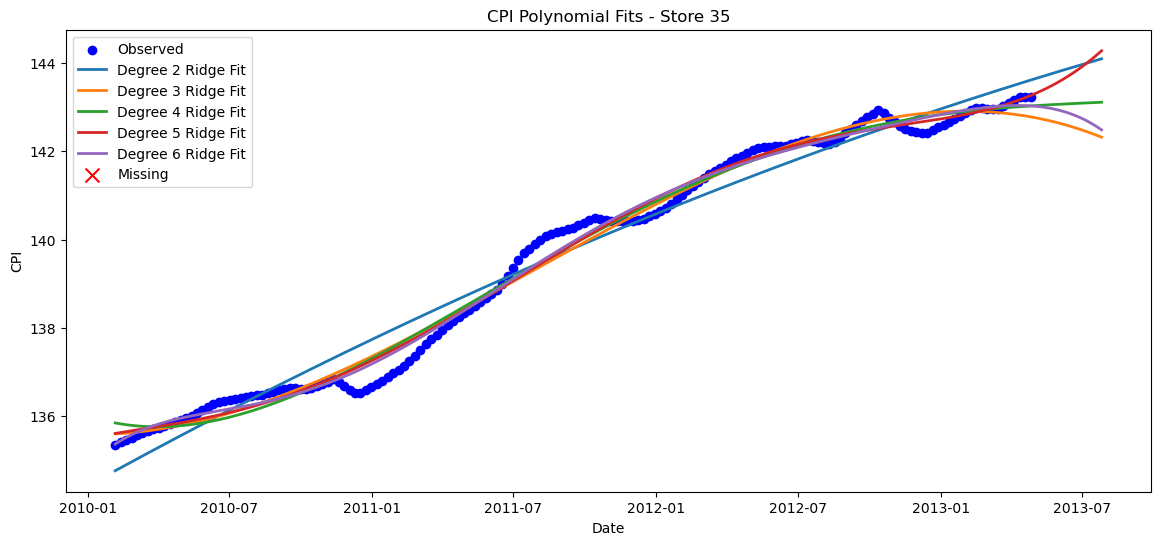

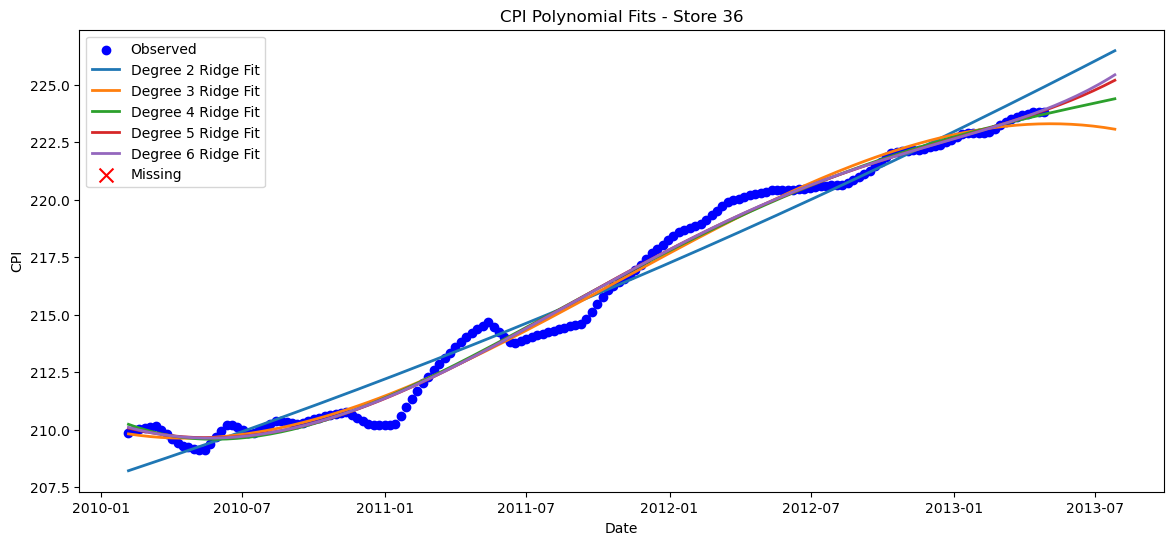

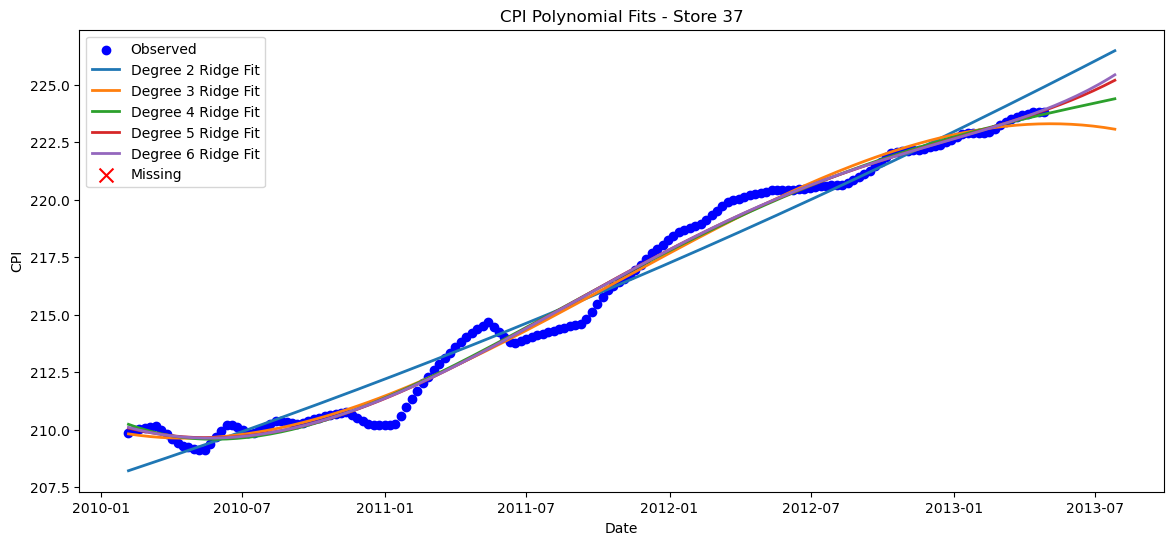

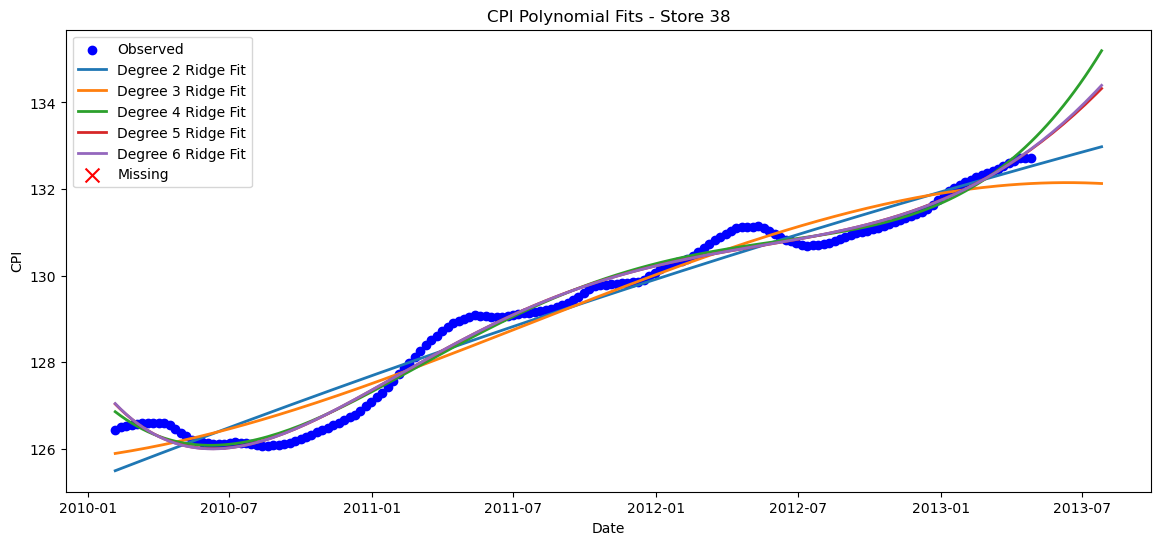

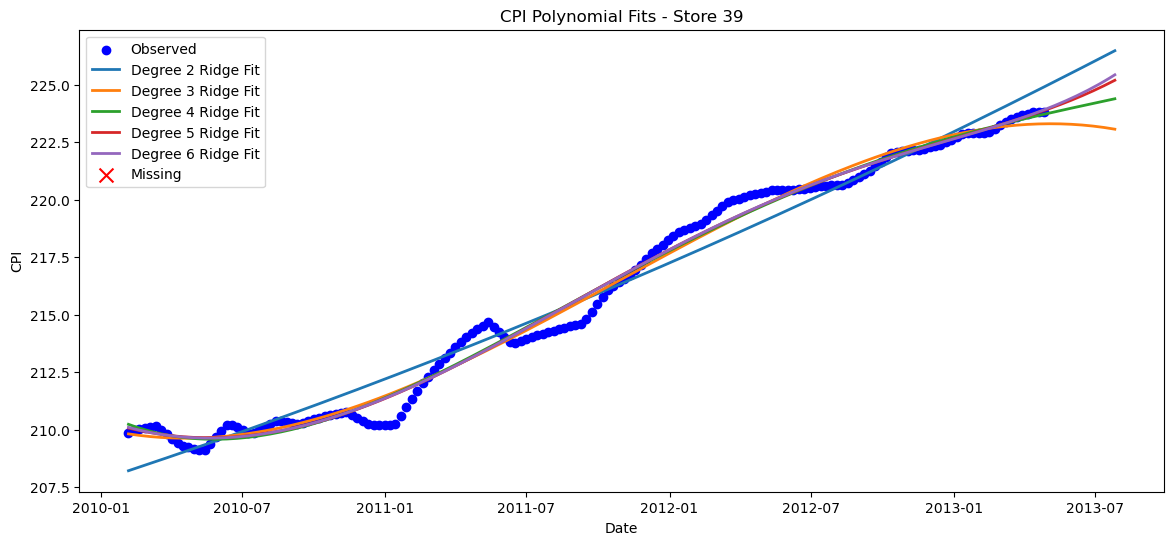

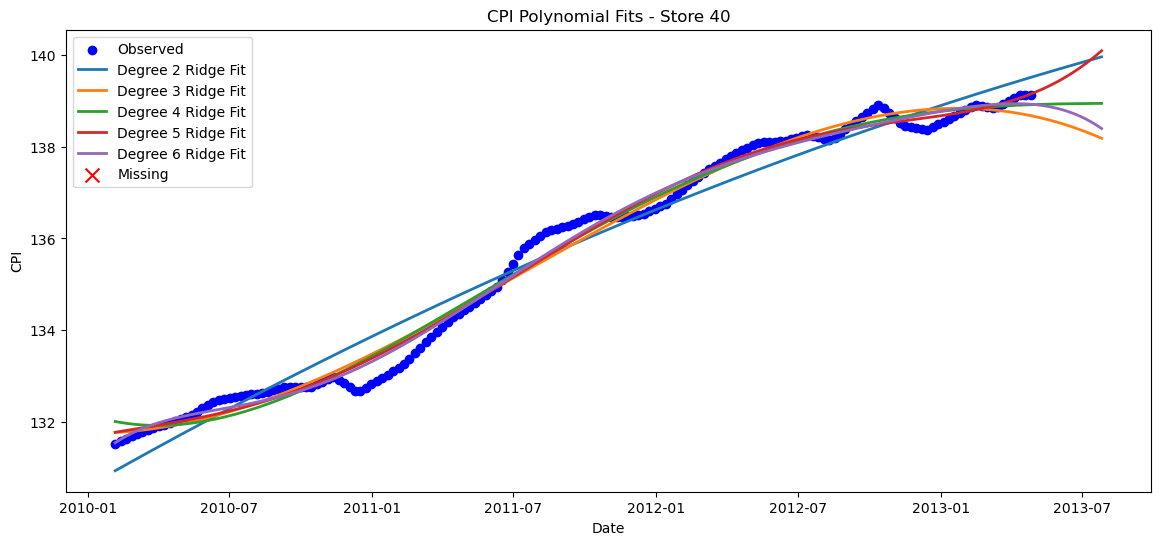

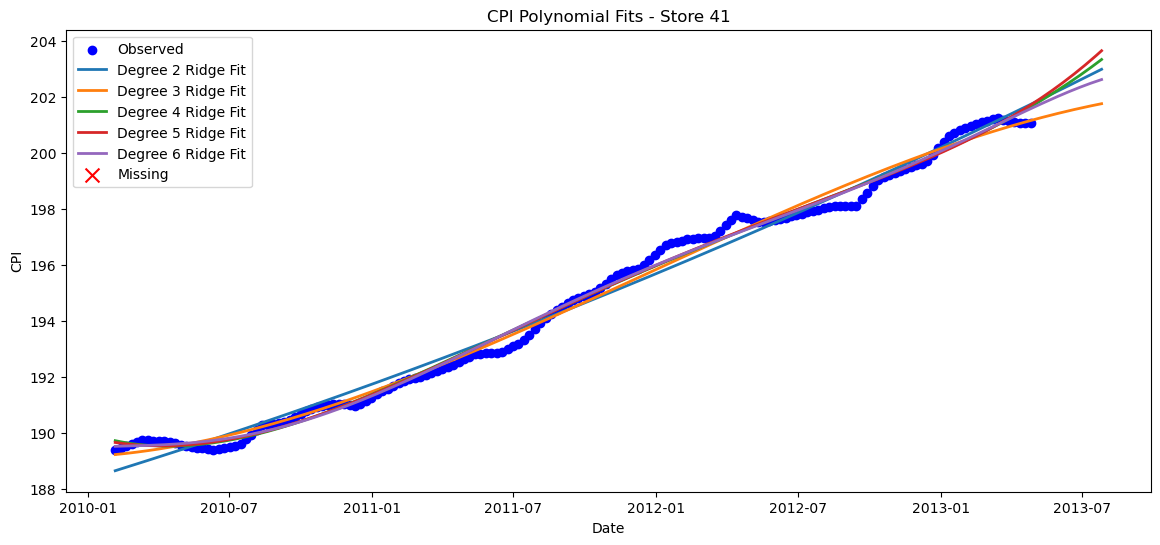

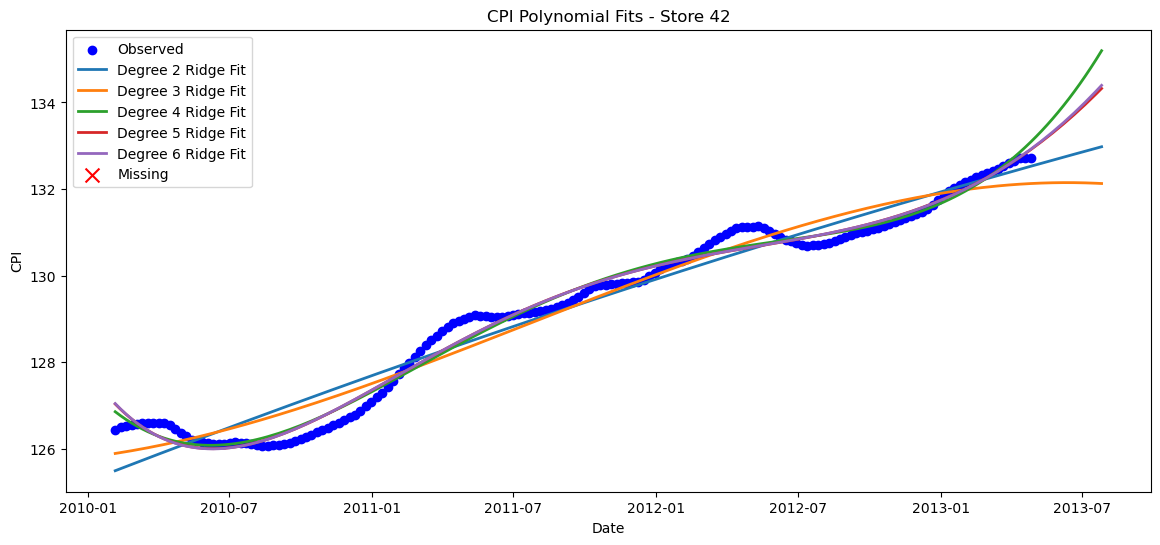

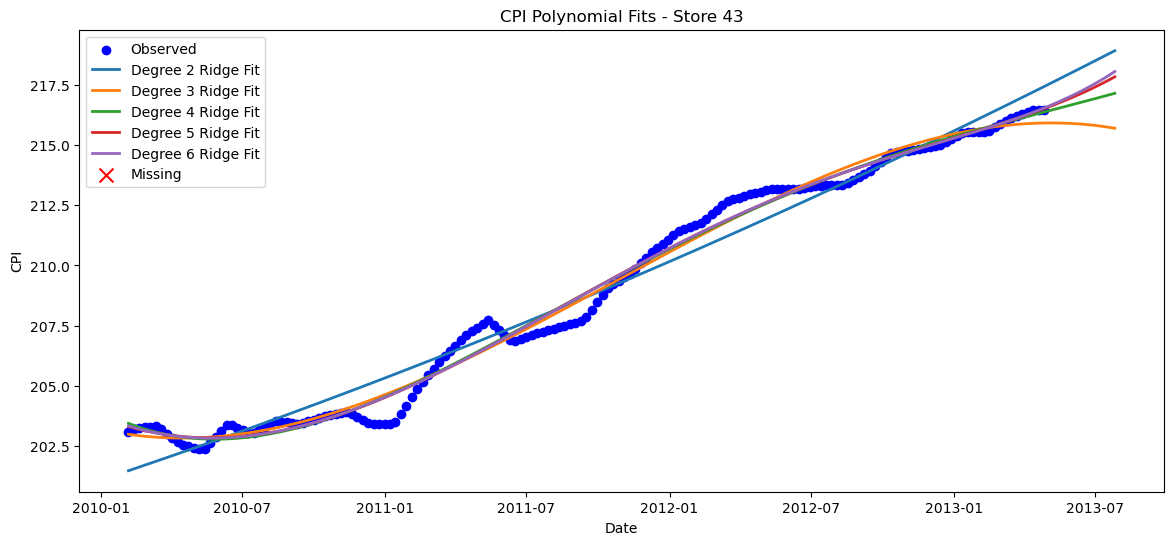

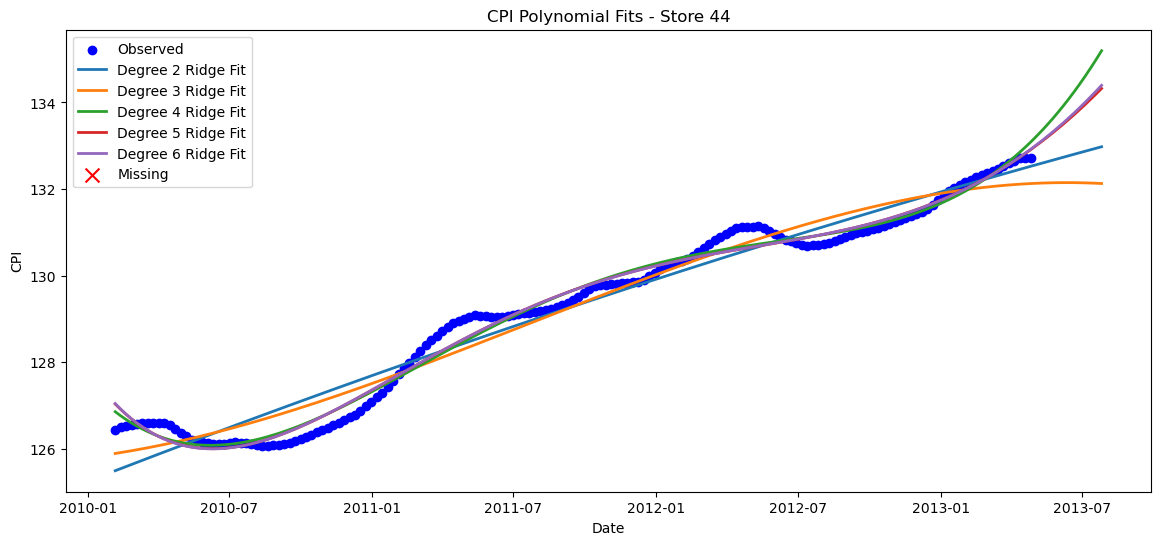

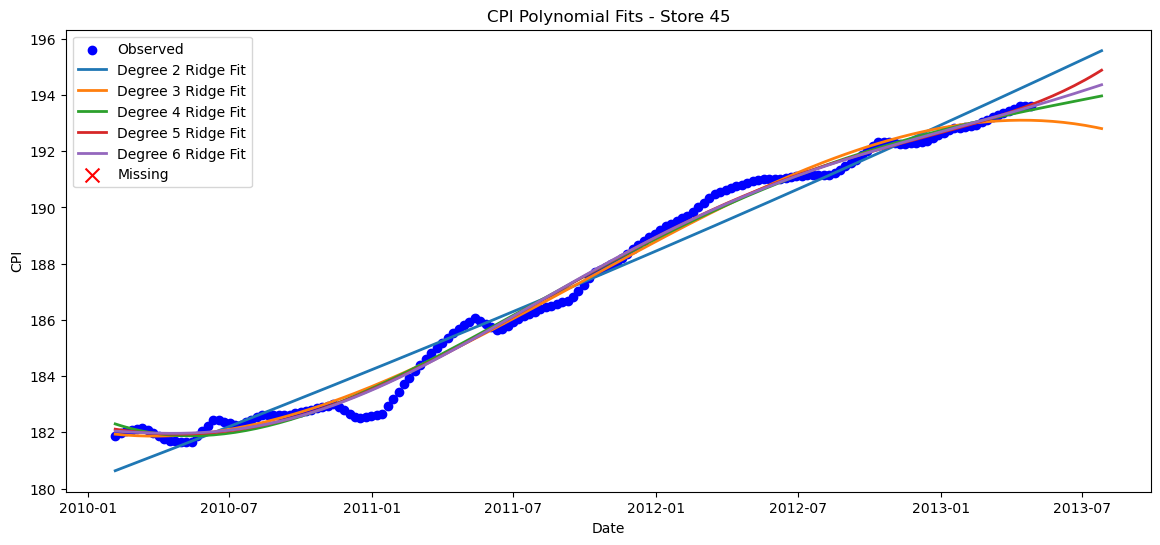

In [13]:
# Apply the plot function per store
for store in df_plot['store'].unique():
    store_data = df_plot[df_plot['store'] == store]
    plot_polynomial_degrees(store_data, 'cpi', degrees=[2,3,4,5,6], alpha=0.5)
